
<div style="display: flex; align-items: center; justify-content: center; padding: 20px 0; text-align: center; height: 100vh; max-width: 1500px; margin: auto;">
    <img src="https://media.licdn.com/dms/image/v2/D4D3DAQFGx0XnuUvugA/image-scale_191_1128/image-scale_191_1128/0/1662458005755/nova_ims_information_management_school_cover?e=2147483647&v=beta&t=J3Q4LlZi36_4UAFhj2019QdtfXLn0kQwaX25jgaBhOQ" 
         alt="Logo" 
         style="width: 100%; max-width: 1500px; height: auto; max-height: 200px; object-fit: cover; object-position: center; border: 5px solid #A0C020; border-radius: 5px;">
</div>

<div style="text-align: center; padding: 20px 0;">
    <h5>This analysis is conducted as part of the <b><i>Machine Learning</i></b> course, a component of the Master's program in Data Science and Advanced Analytics at the <b><u>Nova Information Management School</u></b>.</h5>
</div>
<!-- This notebook template was created by Catarina Gonçalves Nunes, 20230083 -->
<div style="text-align: center; color: #A0C020;">
    <h1><b>To Grant or Not to Grant: Deciding on Compensation Benefits</b></h1>
</div>


<h3 style="text-align: center;"><u></b>Group 22</u></b></h3>

|     Student Name     |     Student ID     | 
|         ---          |           ---          |
|     Beatriz Monteiro|   20240591        | 
|     Catarina Nunes           |       20230083       |
|     Jorge Cordeiro      |       20240594       |
|     Leonor Wanzeller   |      20240586       |

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">Project Metadata</h2>
</di>

### Project Title
**To Grant or Not to Grant: Deciding on Compensation Benefits**

### Project Description
The project focuses on building a predictive model that determines the likelihood of granting approvals for compensation benefits based on historical claim data provided by the Workers' Compensation Board (WCB). The objective is to automate the decision-making process for new claims, making it efficient and reducing manual workload.

### Dataset Information
- **Source**: Historical claims data provided by the WCB.
- **Format**: CSV files containing training and test datasets.
- **Size**: Training data from claims assembled between 2020 and 2022, and test data from claims assembled from January 2023 onward.

### Features
- **Accident Date**: Date of the claim's accident.
- **Age at Injury**: Age of the injured worker when the injury occurred.
-  **Agreement Reached**: Binary variable indicating if an agreement was made without WCB involvement.
- **Alternative Dispute Resolution**: Adjudication processes external to the Board.
- **Assembly Date**: Date the claim was first assembled.
- **Attorney/Representative**: Indicates if the claim is represented by an attorney.
- **Average Weekly Wage**: Wage used for calculating compensation and benefits.
- **Birth Year**: Reported year of birth of the injured worker.
- **C-2 Date**: Date of receipt of the Employer's Report of Work-Related Injury/Illness.
- **C-3 Date**: Date Form C-3 (Employee Claim Form) was received.
- **Carrier Name**: Primary insurance provider responsible for workers’ compensation.
- **Carrier Type**: Type of primary insurance provider.
- **Claim Identifier**: Unique identifier for each claim assigned by the WCB.
- **County of Injury**: Name of the New York County where the injury occurred.
- **COVID-19 Indicator**: Indicates if the claim is associated with COVID-19.
- **District Name**: Name of the WCB district office overseeing claims.
- **First Hearing Date**: Date of the first hearing on a claim.
- **Gender**: Reported gender of the injured worker.
- **IME-4 Count**: Number of IME-4 forms received per claim.
- **Industry Code**: NAICS code classifying the business according to economic activity.
- **Medical Fee Region**: Approximate region for medical service.
- **OIICS Nature of Injury Description**: Codes & descriptions of injury nature.
- **WCIO Cause of Injury Code**: Codes & descriptions of injury causes.
- **WCIO Nature of Injury Code**: Codes & descriptions of injury nature.
- **WCIO Part Of Body Code**: Codes & descriptions of body parts affected.
- **Zip Code**: ZIP code of the injured worker’s home address.

- **WCB Decision**: Multiclass variable indicating the decision of the WCB relative to the claim.
out WCB involvement.

### Target Variable
- **Claim Injury Type**: The main target variable for prediction, categorized based on the WCB's deliberation.

### Goals
1. **Data Exploration**: Analyze and visualize the dataset to extract meaningful insights and identify patterns.
2. **Data Preprocessing**: Clean the data by handling missing values, encoding categorical variables, and scaling features as necessary.
3. **Model Development**: Train various classification algorithms to predict the Claim Injury Type and evaluate their performance.
4. **Optimization and Insights**: Fine-tune the best-performing models and analyze additional insights as required.

### Evaluation Metrics
- **Accuracy**: Measure of correct predictions versus total predictions.
- **F1 Score**: Combines precision and recall into a single metric, especially important for imbalanced classes.
- **Confusion Matrix**: Detailed breakdown of true vs. predicted classifications for better interpretability.

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">Importing Libraries</h2>
</div>

In [6]:
# !pip install numpy==1.24.3
# !pip install pandas==1.5.3
# !pip install matplotlib==3.7.1
# !pip install seaborn==0.12.2 
# !pip install scipy==1.10.1   
# !pip install scikit-learn==1.3.0 
# !pip install missingno==0.5.2 
# !pip install plotly==5.18.0 

In [12]:
import zipfile, io
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt 
import missingno as msno
import seaborn as sns
from math import ceil
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from matplotlib.ticker import FuncFormatter
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json 
from urllib.request import urlopen
import warnings
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [14]:
# We compose a pallete to use in the vizualizations
pal_novaims = ['#A0C020','#003B5C', '#FF8C00', '#D3D3D3','#6A5ACD']
pastel_color = sns.utils.set_hls_values(pal_novaims[1], l=0.4, s=0.3)

In [16]:
# clenaing the look of the plots
sns.set(style='whitegrid', palette='muted') 
plt.rcParams.update({ 'font.size': 12, 'axes.titlesize': 14,'axes.labelsize': 12,'figure.autolayout': True})

In [18]:
pd.set_option("display.max_columns", 40)

<a id = "Index"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">Index</h1>
</div>

1. [Data Understanding](#Data-Understanding)
2. [Data Preparation](#Data-Preparation)

<a id = "Data-Understanding"></a>
    
<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">Data Understanding</h1>
</div>

[1.1 Data Loading and Description](#Data-Loading-and-Description)

[1.2 Exploratory Data Analysis](#EDA)

 - [1.2.1. Data Types](#Data-Types)

 - [1.2.2. Univariate EDA: Descriptive Summary & Missing Values](#Descriptive-Summary)

 - [1.2.3. Univariate EDA: Data Visualization](#Univariate-Vizualization)
 
 - [1.2.4. Bivariate EDA: Data Visualization](#Bivariate-Vizualization) 
 
 - [1.2.65. Multvariate EDA: Duplicates](#Multivariate) 

<a id = "Data-Loading-and-Description"></a>
## 1.1. Data Loading and Description

[Back to Index](#Index)

In [14]:
z = zipfile.ZipFile("project_data.zip") #we loaded the project data folder zip in the same
#environment and use this code to extract the components
z.extractall()

del z

In [20]:
# Load datasets
train_data = pd.read_csv("train_data.csv")  
test_data = pd.read_csv("test_data.csv")

print('Train df shape:', train_data.shape)
print('Test df shape:', test_data.shape)

Train df shape: (593471, 33)
Test df shape: (387975, 30)


Now, we want to set the column `Claim Identifier` as the index in the dataframes, as this column is supposed to identify an individual claim. However, first, to ensure we don't lose any important rows due to identifier mistakes, we will check if this column only contains unique values:

In [22]:
unique_claims = train_data['Claim Identifier'].nunique()
total_rows = len(train_data)

print(f"The Claim Identifier column has {unique_claims}"
      f" unique values,\nand the dataframe train_data has {total_rows} rows.")
if unique_claims == total_rows:
    print("All Claim Identifier values are unique.")
else:
    print("There are duplicate Claim Identifier values.")

The Claim Identifier column has 593470 unique values,
and the dataframe train_data has 593471 rows.
There are duplicate Claim Identifier values.


In [24]:
train_data[train_data.duplicated(subset=['Claim Identifier'], keep=False)]

Accident Date  Age at Injury Alternative Dispute Resolution  \
257901           NaN            NaN                            NaN   
526445           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
257901    2021-05-21                     NaN                  NaN         NaN   
526445    2022-09-05                     NaN                  NaN         NaN   

       C-2 Date C-3 Date Carrier Name Carrier Type  Claim Identifier  \
257901      NaN      NaN          NaN          NaN         292668076   
526445      NaN      NaN          NaN          NaN         292668076   

       Claim Injury Type County of Injury COVID-19 Indicator District Name  \
257901               NaN              NaN                NaN           NaN   
526445               NaN              NaN                NaN           NaN   

       First Hearing Date Gender  IME-4 Count  Industry Code  \
257901                NaN    NaN          NaN            NaN   
526445                NaN    NaN          NaN            NaN   

       Industry Code Description Medical Fee Region  \
257901                       NaN                NaN   
526445                       NaN                NaN   

        OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
257901                                 NaN                        NaN   
526445                                 NaN                        NaN   

       WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
257901                              NaN                         NaN   
526445                              NaN                         NaN   

       WCIO Nature of Injury Description  WCIO Part Of Body Code  \
257901                               NaN                     NaN   
526445                               NaN                     NaN   

       WCIO Part Of Body Description Zip Code  Agreement Reached WCB Decision  \
257901                           NaN      NaN                NaN          NaN   
526445                           NaN      NaN                NaN          NaN   

        Number of Dependents  
257901                   NaN  
526445                   NaN

we can see that this rows are actually all Nan values so we can set the idex without losing any import info.

In [26]:
unique_claims_test = test_data['Claim Identifier'].nunique()
total_rows_test = len(test_data)
print(f"The Claim Identifier column has {unique_claims_test}"
      f" unique values,\nand the dataframe train_data has {total_rows_test} rows.")
if unique_claims_test == total_rows_test:
    print("All Claim Identifier values are unique.")
else:
    print("There are duplicate Claim Identifier values.")

The Claim Identifier column has 387975 unique values,
and the dataframe train_data has 387975 rows.
All Claim Identifier values are unique.


In [27]:
# Set Claim Identifier as the index for both datasets
train_data.set_index('Claim Identifier', inplace=True)
test_data.set_index('Claim Identifier', inplace=True)

In [28]:
train_data.head(2)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393875             2019-12-30           31.0                              N   
5393091             2019-08-30           46.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393875             2020-01-01                       N                 0.00   
5393091             2020-01-01                       Y              1745.93   

                  Birth Year    C-2 Date    C-3 Date  \
Claim Identifier                                       
5393875               1988.0  2019-12-31         NaN   
5393091               1973.0  2020-01-01  2020-01-14   

                                  Carrier Name Carrier Type Claim Injury Type  \
Claim Identifier                                                                
5393875             NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE       2. NON-COMP   
5393091           ZURICH AMERICAN INSURANCE CO  1A. PRIVATE      4. TEMPORARY   

                 County of Injury COVID-19 Indicator District Name  \
Claim Identifier                                                     
5393875              ST. LAWRENCE                  N      SYRACUSE   
5393091                   WYOMING                  N     ROCHESTER   

                 First Hearing Date Gender  IME-4 Count  Industry Code  \
Claim Identifier                                                         
5393875                         NaN      M          NaN           44.0   
5393091                  2020-02-21      F          4.0           23.0   

                 Industry Code Description Medical Fee Region  \
Claim Identifier                                                
5393875                       RETAIL TRADE                  I   
5393091                       CONSTRUCTION                  I   

                  OIICS Nature of Injury Description  \
Claim Identifier                                       
5393875                                          NaN   
5393091                                          NaN   

                  WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                               
5393875                                27.0     FROM LIQUID OR GREASE SPILLS   
5393091                                97.0                REPETITIVE MOTION   

                  WCIO Nature of Injury Code  \
Claim Identifier                               
5393875                                 10.0   
5393091                                 49.0   

                 WCIO Nature of Injury Description  WCIO Part Of Body Code  \
Claim Identifier                                                             
5393875                                  CONTUSION                    62.0   
5393091                             SPRAIN OR TEAR                    38.0   

                 WCIO Part Of Body Description Zip Code  Agreement Reached  \
Claim Identifier                                                             
5393875                               BUTTOCKS    13662                0.0   
5393091                            SHOULDER(S)    14569                1.0   

                      WCB Decision  Number of Dependents  
Claim Identifier                                          
5393875           Not Work Related                   1.0  
5393091           Not Work Related                   4.0

In [29]:
test_data.head(2)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
6165911             2022-12-24             19                              N   
6166141             2022-11-20             19                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
6165911             2023-01-02                       N                  NaN   
6166141             2023-01-02                       N                  NaN   

                  Birth Year    C-2 Date C-3 Date               Carrier Name  \
Claim Identifier                                                               
6165911               2003.0  2023-01-02      NaN  INDEMNITY INSURANCE CO OF   
6166141               2003.0  2023-01-02      NaN    A I U INSURANCE COMPANY   

                 Carrier Type County of Injury COVID-19 Indicator  \
Claim Identifier                                                    
6165911           1A. PRIVATE            BRONX                  N   
6166141           1A. PRIVATE           QUEENS                  N   

                 District Name First Hearing Date Gender  IME-4 Count  \
Claim Identifier                                                        
6165911                    NYC                NaN      M          NaN   
6166141                    NYC                NaN      F          NaN   

                  Industry Code       Industry Code Description  \
Claim Identifier                                                  
6165911                    48.0  TRANSPORTATION AND WAREHOUSING   
6166141                    45.0                    RETAIL TRADE   

                 Medical Fee Region  OIICS Nature of Injury Description  \
Claim Identifier                                                          
6165911                          IV                                 NaN   
6166141                          IV                                 NaN   

                  WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                               
6165911                                31.0          FALL, SLIP OR TRIP, NOC   
6166141                                75.0         FALLING OR FLYING OBJECT   

                  WCIO Nature of Injury Code  \
Claim Identifier                               
6165911                                 10.0   
6166141                                 10.0   

                 WCIO Nature of Injury Description  WCIO Part Of Body Code  \
Claim Identifier                                                             
6165911                                  CONTUSION                    54.0   
6166141                                  CONTUSION                    10.0   

                 WCIO Part Of Body Description Zip Code  Number of Dependents  
Claim Identifier                                                               
6165911                              LOWER LEG    10466                     1  
6166141                   MULTIPLE HEAD INJURY    11691                     1

we do  not have access to information that would only exist after a decision about these claims has been made. You must use the models trained with the training set to predict Claim Injury Type:

In [31]:
train_data.columns.difference(test_data.columns)

Index(['Agreement Reached', 'Claim Injury Type', 'WCB Decision'], dtype='object')

#### We gonna create a copy of the original dfs to ensure we have a backup in case we make any unintended changes:

<a id = "EDA"></a>
## 1.2 Exploratory Data Analysis

[Back to Index](#Index)

In [34]:
train_EDA = train_data.copy()
test_EDA = test_data.copy()

<a id = "Data-Types"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">1.2.1. Data Types</h3>
</div>

[Back to Index](#Index)

In [36]:
train_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

`Note`: Its important to optimize the columns datatyes, specially in large models to optimize the model performance. Right now we have a memory usage of 165.5+ MB, but we can clearly see that some columns can be optimized. 

- Lets see the values of each column to see the optimal type for the Categorical Variables Columns and Numerical Variables: 

<a id = "Descriptive-Summary"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">1.2.2. Missing Values & Univariate EDA: Descriptive Summary</h3>
</div>

[Back to Index](#Index)

In [39]:
# Checking missing values - Code adapted from prev notebook
missing_values = train_EDA.isnull().sum().to_frame(name='Total')
missing_values['Percentage'] = (missing_values['Total'] / len(train_EDA) * 100).round(2).astype(str) + '%'
missing_values.sort_values(by='Total', ascending=False, inplace=True)
missing_values

Total Percentage
OIICS Nature of Injury Description  593471     100.0%
IME-4 Count                         460668     77.62%
First Hearing Date                  442673     74.59%
C-3 Date                            406226     68.45%
Birth Year                           48523      8.18%
Average Weekly Wage                  48096       8.1%
Zip Code                             48082       8.1%
WCIO Part Of Body Code               36527      6.15%
WCIO Part Of Body Description        36527      6.15%
WCIO Nature of Injury Description    35102      5.91%
WCIO Nature of Injury Code           35102      5.91%
WCIO Cause of Injury Description     35085      5.91%
WCIO Cause of Injury Code            35085      5.91%
C-2 Date                             34005      5.73%
Industry Code                        29403      4.95%
Industry Code Description            29403      4.95%
Accident Date                        23134       3.9%
Medical Fee Region                   19445      3.28%
Agreement Reached                    19445      3.28%
WCB Decision                         19445      3.28%
Gender                               19445      3.28%
Age at Injury                        19445      3.28%
District Name                        19445      3.28%
COVID-19 Indicator                   19445      3.28%
County of Injury                     19445      3.28%
Claim Injury Type                    19445      3.28%
Carrier Type                         19445      3.28%
Carrier Name                         19445      3.28%
Attorney/Representative              19445      3.28%
Alternative Dispute Resolution       19445      3.28%
Number of Dependents                 19445      3.28%
Assembly Date                            0       0.0%

Columns with High NA Counts:
 - `OIICS Nature of Injury Description`, `IME-4 Count`, `First Hearing Date`, and `C-3 Date` have the majority of the rows of missing values (more than 50%)
 - It will be worth to analyze the option of droping this columns during preparation, OIICS Nature of Injury Description only has missing values so its useless.

Columns with Moderate NA Counts:

 - Columns like Average Weekly Wage (48,096 missing) may require special attention, as they might represent important features for analysis.
 - Different methods can be used to correct these columns during preparation

`Also, a lot of columns have the exact same number of missing values, 19445, its possible that theres a reason for this`:

<Axes: >

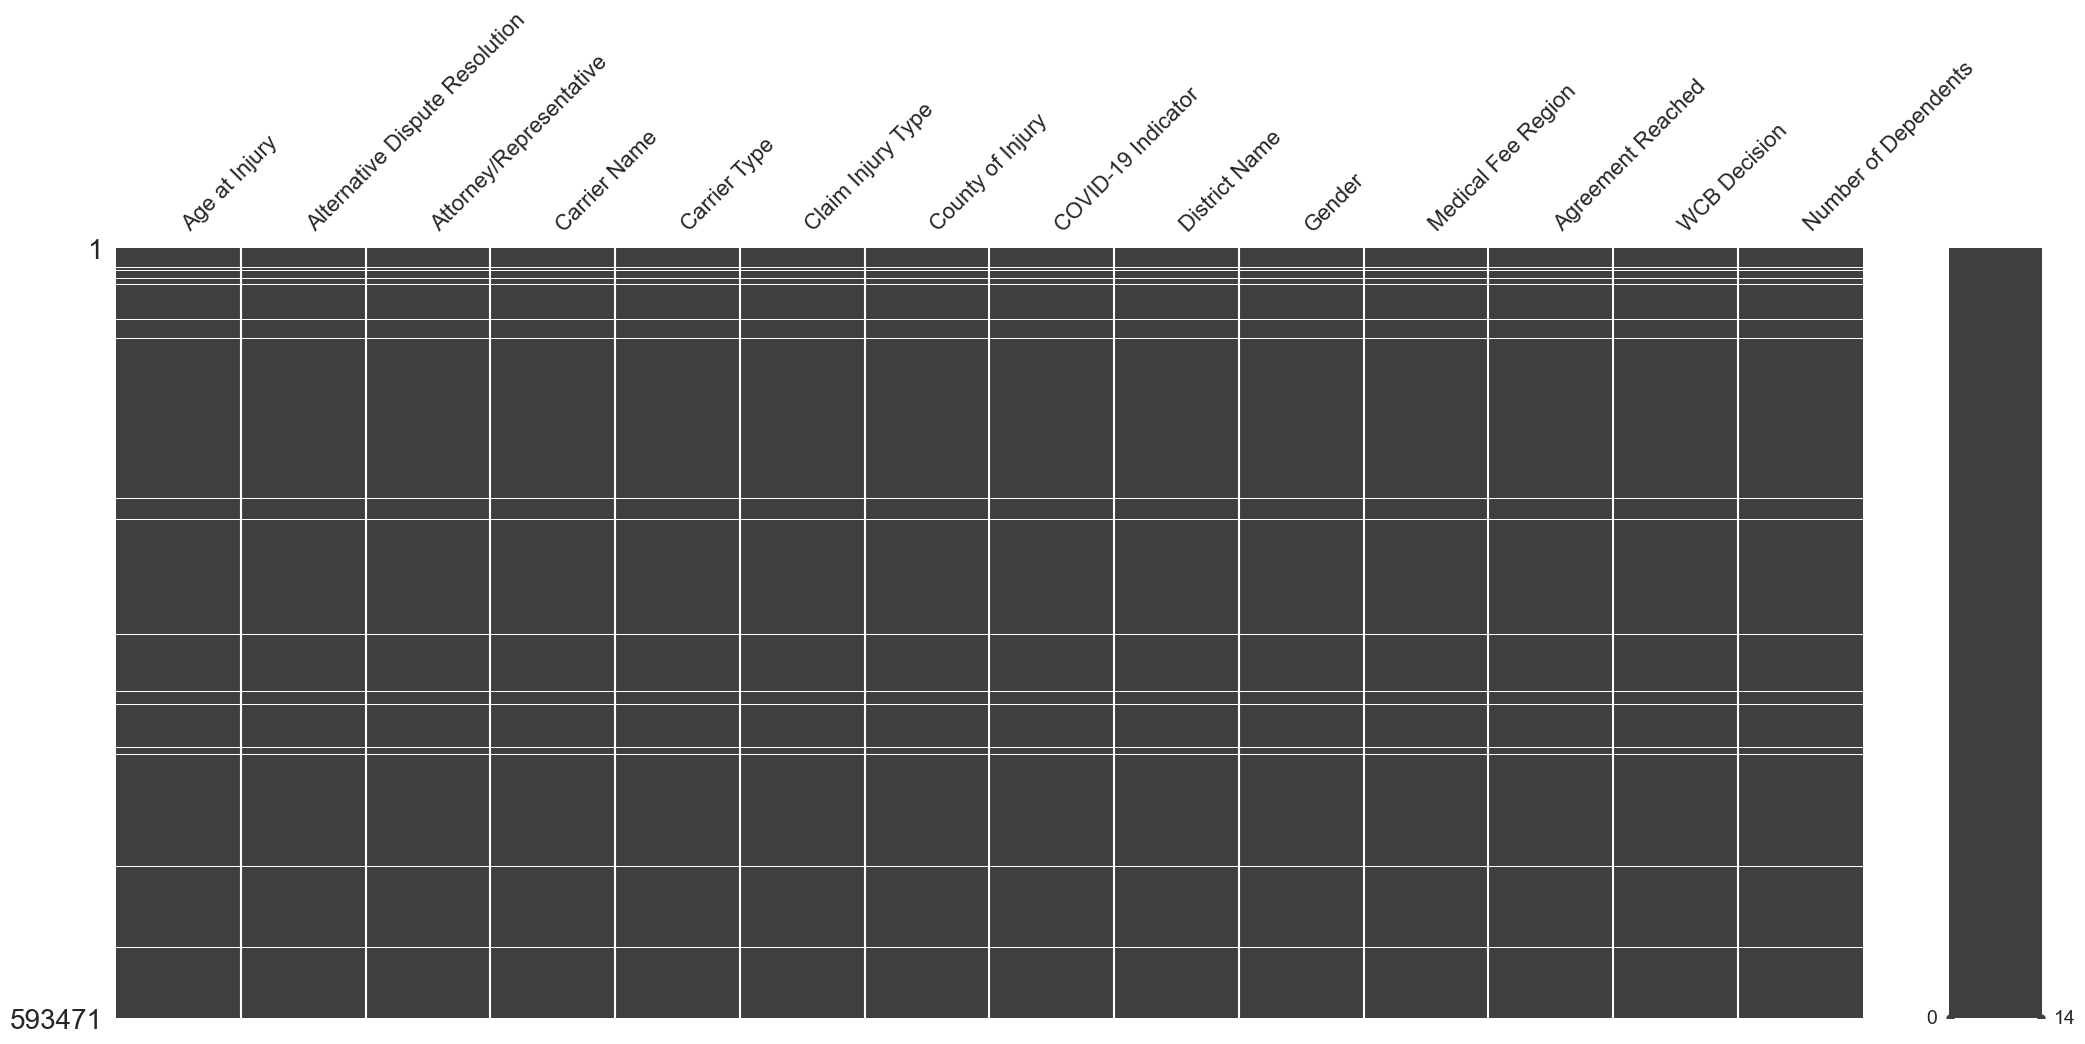

In [41]:
columns_of_interest = train_EDA.columns[train_EDA.isnull().sum() == 19445]
msno.matrix(train_EDA[columns_of_interest])

In [42]:
missing_df = train_EDA[train_EDA[train_EDA.columns[train_EDA.isnull().sum() == 19445]].isnull().any(axis=1)]
missing_rows = missing_df.isnull().sum().to_frame(name='Total')
missing_rows['Percentage'] = (missing_rows['Total'] / len(missing_df) * 100).round(2).astype(str) + '%'
missing_rows.sort_values(by='Total', ascending=False, inplace=True)
missing_rows

Total Percentage
Accident Date                       19445     100.0%
Age at Injury                       19445     100.0%
WCB Decision                        19445     100.0%
Agreement Reached                   19445     100.0%
Zip Code                            19445     100.0%
WCIO Part Of Body Description       19445     100.0%
WCIO Part Of Body Code              19445     100.0%
WCIO Nature of Injury Description   19445     100.0%
WCIO Nature of Injury Code          19445     100.0%
WCIO Cause of Injury Description    19445     100.0%
WCIO Cause of Injury Code           19445     100.0%
OIICS Nature of Injury Description  19445     100.0%
Medical Fee Region                  19445     100.0%
Industry Code Description           19445     100.0%
Industry Code                       19445     100.0%
IME-4 Count                         19445     100.0%
Gender                              19445     100.0%
First Hearing Date                  19445     100.0%
District Name                       19445     100.0%
COVID-19 Indicator                  19445     100.0%
County of Injury                    19445     100.0%
Claim Injury Type                   19445     100.0%
Carrier Type                        19445     100.0%
Carrier Name                        19445     100.0%
C-3 Date                            19445     100.0%
C-2 Date                            19445     100.0%
Birth Year                          19445     100.0%
Average Weekly Wage                 19445     100.0%
Attorney/Representative             19445     100.0%
Alternative Dispute Resolution      19445     100.0%
Number of Dependents                19445     100.0%
Assembly Date                           0       0.0%

`Seems like they are just empty Claims, the best strategy will be to remove all this 19445 rows.`

#### To facilitate the EDA:

In [45]:
train_EDA = train_EDA.drop('OIICS Nature of Injury Description', axis = 1) #for now we will drop this during the EDA
#bc its all null, the train_data still has this column

In [46]:
# Summary statistics for numeric columns
train_EDA.describe().T

count         mean          std   min     25%  \
Age at Injury               574026.0    42.114270    14.256432   0.0    31.0   
Average Weekly Wage         545375.0   491.088321  6092.918120   0.0     0.0   
Birth Year                  544948.0  1886.767604   414.644423   0.0  1965.0   
IME-4 Count                 132803.0     3.207337     2.832303   1.0     1.0   
Industry Code               564068.0    58.645305    19.644175  11.0    45.0   
WCIO Cause of Injury Code   558386.0    54.381143    25.874281   1.0    31.0   
WCIO Nature of Injury Code  558369.0    41.013839    22.207521   1.0    16.0   
WCIO Part Of Body Code      556944.0    39.738146    22.365940  -9.0    33.0   
Agreement Reached           574026.0     0.046665     0.210921   0.0     0.0   
Number of Dependents        574026.0     3.006559     2.000801   0.0     1.0   

                               50%     75%        max  
Age at Injury                 42.0    54.0      117.0  
Average Weekly Wage            0.0   841.0  2828079.0  
Birth Year                  1977.0  1989.0     2018.0  
IME-4 Count                    2.0     4.0       73.0  
Industry Code                 61.0    71.0       92.0  
WCIO Cause of Injury Code     56.0    75.0       99.0  
WCIO Nature of Injury Code    49.0    52.0       91.0  
WCIO Part Of Body Code        38.0    53.0       99.0  
Agreement Reached              0.0     0.0        1.0  
Number of Dependents           3.0     5.0        6.0

- As mentioned before, we can see that the datatypes are inefficient. All these numeric columns are in float format, but only one actually needs to be a float — `Average Weekly Wage` (not necessarily a float64, but we'll analyze this further down the line).
- `Age at Injury` has some *outliers* — the minimum is 0 and the maximum is 117. Since we're dealing with work-related injuries, the age should probably be between 16-18 and the pension age, depending on the country, but we'll need to analyze that.
- `Average Weekly Wage` also has outliers, which distort the mean. We have people with a wage of 0, which seems unlikely unless we're dealing with some form of slavery, and a maximum of 2,828,079 (if you're earning more than 2M per week, you're probably not waiting for approval... *cough*). This obviously messes up the mean.
- `Birth Year` also has inconsistent values, like 0 and 2018 (considering the data is from claims between the start of 2020 and the end of 2022, it's extremely unlikely we're dealing with a 2-4 year old here) - has an unrealistic average (1886) due to this.
- `IME-4 Count` has a lot of missing values, but we can see that the majority of the dataset is within a similar range. However, we have a maximum of 73 claims, which suggests some outliers in this column.
- `WCIO Part Of Body Code` has a negative value of -9. Normally, the codes are positive, but we’ll need to check that.
- `Agreement Reached` is a `boolean`.

| column                                   | corrected type      | Notes                                                                 |
|------------------------------------------|----------------------|-------------------------------------------------------------------------------|
| `Age at Injury`                          | `uint8`              | No one is older than 255 years; suitable for values between 0 and 255.      |
| `Average Weekly Wage`                    | `float32`            | Used for values with decimal places but optimized to save memory.            |
| `Birth Year`                             | `uint16`             | Years are between 0 and 2018, suitable for values between 0 and 65535.     |
| `IME-4 Count`                            | `uint8`              | IME-4 count is unlikely to exceed 255.                                      |
| `Industry Code`                          | `uint8`              | Industry codes vary in a limited range, suitable for low values.            |
| `WCIO Cause of Injury Code`              | `uint8`              | Codes will not exceed 255.                                                  |
| `WCIO Nature of Injury Code`             | `uint8`              | Codes will not exceed 255.                                                  |
| `WCIO Part Of Body Code`                 | `uint8`              | Codes will not exceed 255.                                                  |
| `Agreement Reached`                      | `uint8`              | Represents binary values (0 or 1).                                          |
| `Number of Dependents`                   | `uint8`              | Typically does not exceed 255.                                              |

In [49]:
# Summary statistics for non numeric columns
train_EDA.describe(include = ['O']).T

count unique  \
Accident Date                      570337   5539   
Alternative Dispute Resolution     574026      3   
Assembly Date                      593471   1096   
Attorney/Representative            574026      2   
C-2 Date                           559466   2475   
C-3 Date                           187245   1648   
Carrier Name                       574026   2046   
Carrier Type                       574026      8   
Claim Injury Type                  574026      8   
County of Injury                   574026     63   
COVID-19 Indicator                 574026      2   
District Name                      574026      8   
First Hearing Date                 150798   1094   
Gender                             574026      4   
Industry Code Description          564068     20   
Medical Fee Region                 574026      5   
WCIO Cause of Injury Description   558386     74   
WCIO Nature of Injury Description  558369     56   
WCIO Part Of Body Description      556944     54   
Zip Code                           545389  10060   
WCB Decision                       574026      1   

                                                                 top    freq  
Accident Date                                             2020-03-01    1245  
Alternative Dispute Resolution                                     N  571412  
Assembly Date                                             2020-03-06    1422  
Attorney/Representative                                            N  392291  
C-2 Date                                                  2021-05-11    1847  
C-3 Date                                                  2021-04-21     350  
Carrier Name                                    STATE INSURANCE FUND  111144  
Carrier Type                                             1A. PRIVATE  285368  
Claim Injury Type                                        2. NON-COMP  291078  
County of Injury                                             SUFFOLK   60430  
COVID-19 Indicator                                                 N  546505  
District Name                                                    NYC  270779  
First Hearing Date                                        2022-04-15     440  
Gender                                                             M  335218  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE  114339  
Medical Fee Region                                                IV  265981  
WCIO Cause of Injury Description                             LIFTING   46610  
WCIO Nature of Injury Description                     STRAIN OR TEAR  153373  
WCIO Part Of Body Description                        LOWER BACK AREA   51862  
Zip Code                                                       11236    3302  
WCB Decision                                        Not Work Related  574026

- `Accident Date`, `Assembly Date` (the only complete column), `C-2 Date`, `C-3 Date`, and `First Hearing Date` are all date fields. As previously mentioned, it would be interesting to analyze the relationships between them, such as the time frame between each date. - It may be beneficial to extract additional features, such as the year, month, or of the Injury.
- `Alternative Dispute Resolution` should presumably have values of Y or N, but it contains 3 different values. - analyse this 3rd value
- `Attorney/Representative` is binary (Y or N). - transform to 0 & 1
- `Carrier Name` contains a lot of different values -  potential grouping or categorization could be beneficial.
- `Carrier Type` is more contained.
- `COVID-19 Indicator` is binary, with values of Y or N. - transform to 0 & 1
- `Gender` has 4 different values, so we probably need to normalize these values to M and F.
- `Industry Code Description`, `WCIO Cause of Injury Description`, `WCIO Nature of Injury Description`, and `WCIO Part of Body Description` are text descriptions of the codes mentioned above. Therefore, we probably only need one of them (either the codes or the descriptions).
- `Zip Code` has a lot of different values and may be irrelevant.

| column                                    | corrected type       | notes                                                                 |
|-------------------------------------------|----------------------|-------------------------------------------------------------------------------|
| `Accident Date`                           | `datetime64[ns]`     |                                                                                 |
| `Alternative Dispute Resolution`          | `category`               | It has 3 different values                                 |
| `Assembly Date`                           | `datetime64[ns]`     |                                                                                 |
| `Attorney/Representative`                 | `int8`               | Needs to be transformed to 0 and 1 (Y=1, N=0)                                 |
| `C-2 Date`                                | `datetime64[ns]`     |                                                                                 |
| `C-3 Date`                                | `datetime64[ns]`     |                                                                                 |
| `Carrier Name`                            | `category`           |                                                                                 |
| `Carrier Type`                            | `category`           |                                                                                 |
| `Claim Injury Type`                       | `category`           |                                                                                 |
| `County of Injury`                        | `category`           |                                                                                 |
| `COVID-19 Indicator`                      | `int8`               | Needs to be transformed to 0 and 1 (Y=1, N=0)                                 |
| `District Name`                           | `category`           |                                                                                 |
| `First Hearing Date`                      | `datetime64[ns]`     |                                                                                 |
| `Gender`                                  | `int8`               | Needs to be transformed to 0 and 1 (M=1, F=0)                                 |
| `Industry Code Description`               | `category`           |                                                                                 |
| `Medical Fee Region`                      | `category`           |                                                                                 |
| `WCIO Cause of Injury Description`        | `category`           |                                                                                 |
| `WCIO Nature of Injury Description`       | `category`           |                                                                                 |
| `WCIO Part Of Body Description`           | `category`           |                                                                                 |
| `Zip Code`                                | `category`           |                                                                                 |
| `WCB Decision`                            | `category`           |                                                                                 |

<a id = "Univariate-Vizualization"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">1.2.3. Univariate EDA: Data Visualization </h3>
</div>

- [Numeric variables: Histograms](#Histograms)
- [Numeric variables: Box Plots](#BoxPlots)
- [Categorical variables: Bar Plots](#BarPlots)
- [Categorical variables: Geographic Map](#GeographicMap)
- [Boolean variables](#Boolean)
- [Date variables](#Dates)

[Back to Index](#Index)

In [53]:
target = train_EDA.loc[:, 'Claim Injury Type']
EDA_data = train_EDA.drop('Claim Injury Type', axis = 1)

In [54]:
categorical_columns = [
    #'Carrier Name', to many to represent
    'Alternative Dispute Resolution', 
    'Carrier Type', 
    'Claim Injury Type', 
    #'County of Injury',  geo data will be represented in a map
    #'District Name', geo data will be represented in a map
    'Gender', 
    #'Industry Code & 'Industry Code Description, 
    #since the names are longer, we gonna use a differnte method
    'Medical Fee Region', 
    #'OIICS Nature of Injury Description', we are not going to analyze this columns
    #bc its all null
    #'WCIO Cause of Injury Code & 'WCIO Cause of Injury Description'',
    #since the names are longer, we gonna use a differnte method
    #'WCIO Nature of Injury Code & 'WCIO Nature of Injury Description', 
    #since the names are longer, we gonna use a differnte method
    #'WCIO Part Of Body Combined' & 'WCIO Part Of Body Description', 
    #since the names are longer, we gonna use a differnte method 
    'WCB Decision'  
    #'Zip Code' to many to represent
]

codes_columns = {
    'Industry Code': 'Industry Code Description', 
    'WCIO Cause of Injury Code': 'WCIO Cause of Injury Description', 
    'WCIO Nature of Injury Code': 'WCIO Nature of Injury Description', 
    'WCIO Part Of Body Code': 'WCIO Part Of Body Description'
}

date_columns = [
    'Accident Date', 
    #'Assembly Date',
    #'C-2 Date', 
    #'C-3 Date',
    #'First Hearing Date'
]
discrete_columns = [
    'Age at Injury', 
    'Birth Year',
    'IME-4 Count', 
    'Number of Dependents'
]

continuous_columns = [
    'Average Weekly Wage'
]

boolean_columns = [
    'Agreement Reached',
    'Attorney/Representative', #this one is Y or N but we want to check it as a boolean
    'COVID-19 Indicator',
]

<a id = "Histograms"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Numeric variables: Histograms</h4>
</div>

[Back to Univariate EDA: Data Visualization](#Univariate-Vizualization)

##### Functions to be reused 

In [57]:
def format_func(value, tick_number):
    return f'{value:.0f}'

In [58]:
def plot_histograms(data, columns, num_rows, num_cols):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))  # Layout flexível com mais espaço
    
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs]  # Garantir uma lista de eixos

    for i, col in enumerate(columns):
        sns.histplot(data[col], bins=30, kde=False, ax=axs[i], color=pal_novaims[0], alpha=0.5)
        axs[i].set_title(f'Distribution of {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')
        axs[i].grid(color='lightgray', alpha=0.2)
        axs[i].xaxis.set_major_formatter(FuncFormatter(format_func))  # Formatar os números no eixo X

    # Remover subplots vazios
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[j])

    plt.tight_layout()  # Ajuste para evitar sobreposição
    plt.show()

In [59]:
#for col in continuous_columns:
    #fig = px.histogram(EDA_data, x=col, title=f'Distribution of {col}', labels={col: col}, nbins=30, marginal="box", hover_data=EDA_data.columns)
    #fig.show()

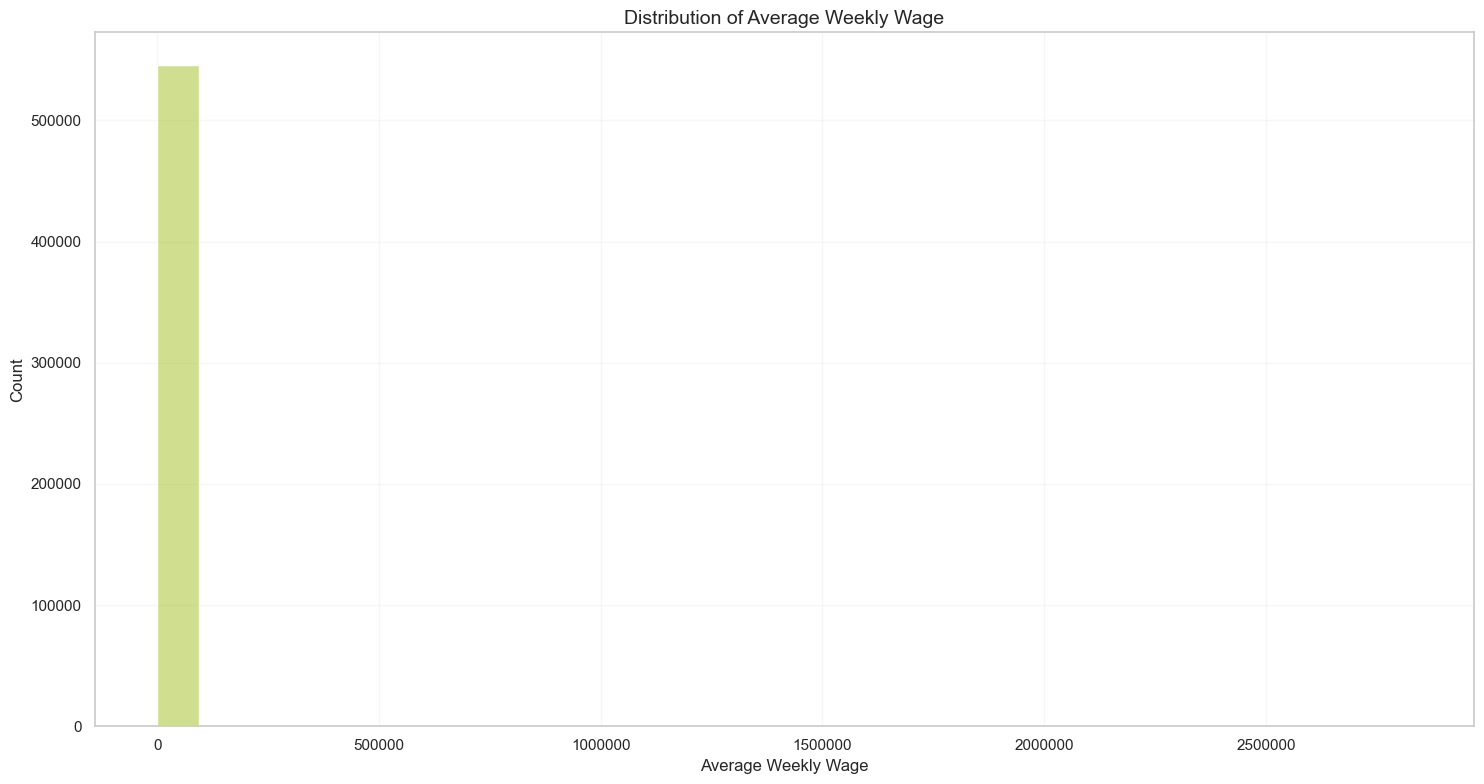

In [60]:
# Histogram for continuous_columns
plot_histograms(EDA_data, continuous_columns, num_rows=1, num_cols=len(continuous_columns))

The presence of outliers turns this distribution higly skewed to the right and really diffult to analyze, so we definally need to treat this column.

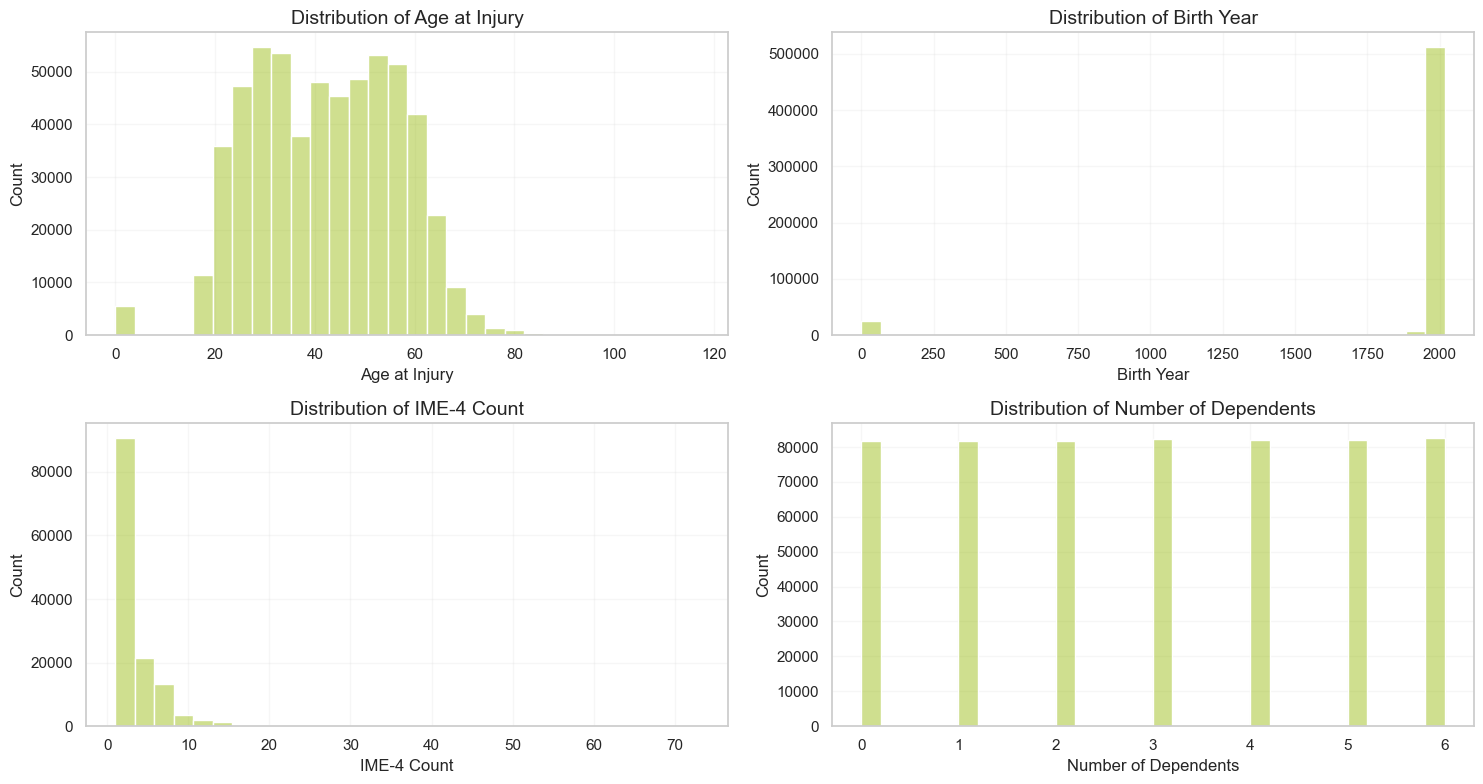

In [62]:
# Histogram for discrete_columns
num_rows = 2
num_cols = (len(discrete_columns) + 1) // 2  
plot_histograms(EDA_data, discrete_columns, num_rows, num_cols)

`Histogram of Age at Injury`

 - Distribution Shape: The histogram shows a roughly normal distribution, with a peak around the ages of 25 to 59, suggesting that most injuries occur within this age range (working age).

 - Skewness: There is a slight right skew, indicating a few instances of older age (e.g., above 80).

`Histogram of Birth Year`

 - Shows 0 values

`Histogram of IME-4 Count`

 - Skewness: The histogram for IME-4 Count is right-skewed, with most counts concentrated around the lower values (0 to 4).

 - Outliers: There are fewer cases with higher counts, indicating that while many claims may not involve multiple IME-4 assessments, a small number do, leading to outlier behavior.

`Histogram of Number of Dependents` 

 - Flat Distribution: The histogram shows a flat distribution across categories 0 to 6, indicating uniformity in the dataset concerning dependents.

<a id = "BoxPlots"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Numeric variables: Box Plots</h4>
</div>

[Back to Univariate EDA: Data Visualization](#Univariate-Vizualization)

In [65]:
def plot_boxplots(data, columns, num_rows, num_cols):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows)) 
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs] 
    stats = []  

    for i, col in enumerate(columns):
        sns.boxplot(data=data, x=col, ax=axs[i], color=pastel_color, fliersize=5)
        axs[i].set_title(f'Boxplot of {col}')
        axs[i].set_xlabel(col)
        axs[i].grid(color='lightgray', alpha=0.2)

        # Cálculo de estatísticas descritivas
        q1 = data[col].quantile(0.25)
        median = data[col].median()
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_fence = q1 - 1.5 * iqr
        upper_fence = q3 + 1.5 * iqr
        min_val = data[col].min()
        max_val = data[col].max()
        stats.append([col, min_val, lower_fence, q1, median, q3, upper_fence, max_val])
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[j])
    plt.tight_layout() 
    plt.show()

    return pd.DataFrame(stats, columns=['Variable', 'Min', 'Lower Fence', 'Q1', 'Median', 'Q3', 'Upper Fence', 'Max'])

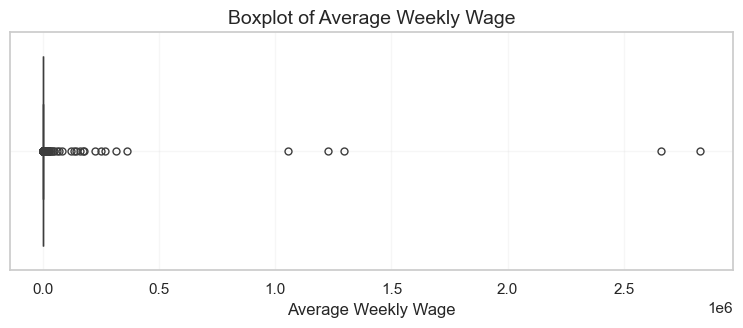

Variable  Min  Lower Fence   Q1  Median     Q3  Upper Fence  \
0  Average Weekly Wage  0.0      -1261.5  0.0     0.0  841.0       2102.5   

         Max  
0  2828079.0

In [66]:
#Blox plot & stats for the continuous_columns
stats_df_continuous = plot_boxplots(EDA_data, continuous_columns, num_rows=2, num_cols=2)
stats_df_continuous

- The problem here is that we definitely have outliers far beyond the upper fence. Nevertheless, the minimum, lower fence, Q1, and median are all 0, which is very strange when we are talking about something like weekly salary—people receive a wage. So, the outliers distort the distribution in a way that we cannot clearly perceive a reasonable lower fence. We need to clean the upper fence first.
- values after Upper Fence	(2102.5) should be removed and then we can see the lower fence value that makes sence with the data (errors and introducin 0 for example)

In [68]:
# Using plotly, as this package makes the notebook a lot slower we use this to retrive the images and then we put it as #
#figs = []

#for i, col in enumerate(discrete_columns):
    # Criando o boxplot com a cor da paleta
    #fig = px.box(EDA_data, x=col, title=f'Distribution of {col}', color_discrete_sequence=[pal_novaims[i % len(pal_novaims)]])
    #figs.append(fig)

# Exibição dos gráficos
#for fig in figs:
    #fig.show()

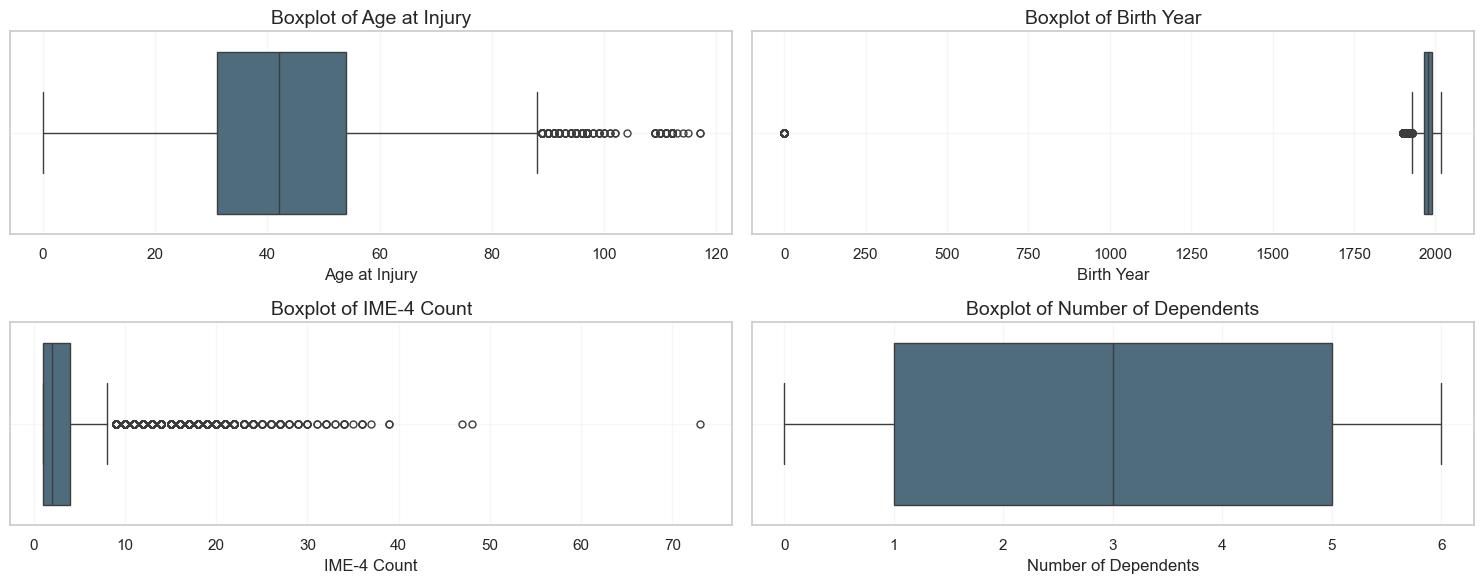

Variable  Min  Lower Fence      Q1  Median      Q3  \
0         Age at Injury  0.0         -3.5    31.0    42.0    54.0   
1            Birth Year  0.0       1929.0  1965.0  1977.0  1989.0   
2           IME-4 Count  1.0         -3.5     1.0     2.0     4.0   
3  Number of Dependents  0.0         -5.0     1.0     3.0     5.0   

   Upper Fence     Max  
0         88.5   117.0  
1       2025.0  2018.0  
2          8.5    73.0  
3         11.0     6.0

In [69]:
#Blox plot & stats for the discrete_columns
stats_df_discrete = plot_boxplots(EDA_data, discrete_columns, num_rows=2, num_cols=2)
stats_df_discrete

`Box Plot of Age at Injury`:
- Although the outliers only appear beyond the upper fence of 88, when handling outliers, it’s good practice to keep individuals within the working-age range (14-70). We'll extend the range slightly to account for retirement age. For more details on age limits in the workforce, refer to these links: [Age Requirements for Work](https://www.dol.gov/general/topic/youthlabor/agerequirements) and [Retirement Age](https://www.nasi.org/learn/social-security/retirement-age/).

`Box Plot of Age at Injury`:
- We have birth years recorded as 0, but we also need to address the maximum values, as they reflect individuals born as recently as 2018. First, we should remove the 0s, then assess the data’s behavior.

`Box Plot of IME-4 Count`:
- Outliers are present above 8.5.

`Box Plot of Number of Dependents`:
- No outliers observed. 

<a id = "BarPlots"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Categorical variables: Bar Plots</h4>
</div>

[Back to Univariate EDA: Data Visualization](#Univariate-Vizualization)

Firts we are going to check the categorical columns withou the Code columns (codes are a category), because we wanto to also check if the same description has different codes or vice versa.
Also the variables related to geografic information, 'District name' & 'County of Injury' will be analyze in the next section

In [73]:
def plot_barplots(data, categorical_columns, num_rows, num_cols):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))  
    
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs]  

    for i, col in enumerate(categorical_columns):
        sns.countplot(x=col, data=data, ax=axs[i], color=pal_novaims[0], alpha=0.5)
        axs[i].set_title(f'Count of {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')
        axs[i].grid(color='lightgray', alpha=0.2)

        for label in axs[i].get_xticklabels():
            if len(label.get_text()) > 6:  # this verify if the text has more than x characters to rotate 45º
                label.set_rotation(45)  
                label.set_ha('right') 
                
        # Formatar os números no eixo Y
        axs[i].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

    for j in range(len(categorical_columns), num_rows * num_cols):
        fig.delaxes(axs[j])

    plt.tight_layout() 
    plt.show()

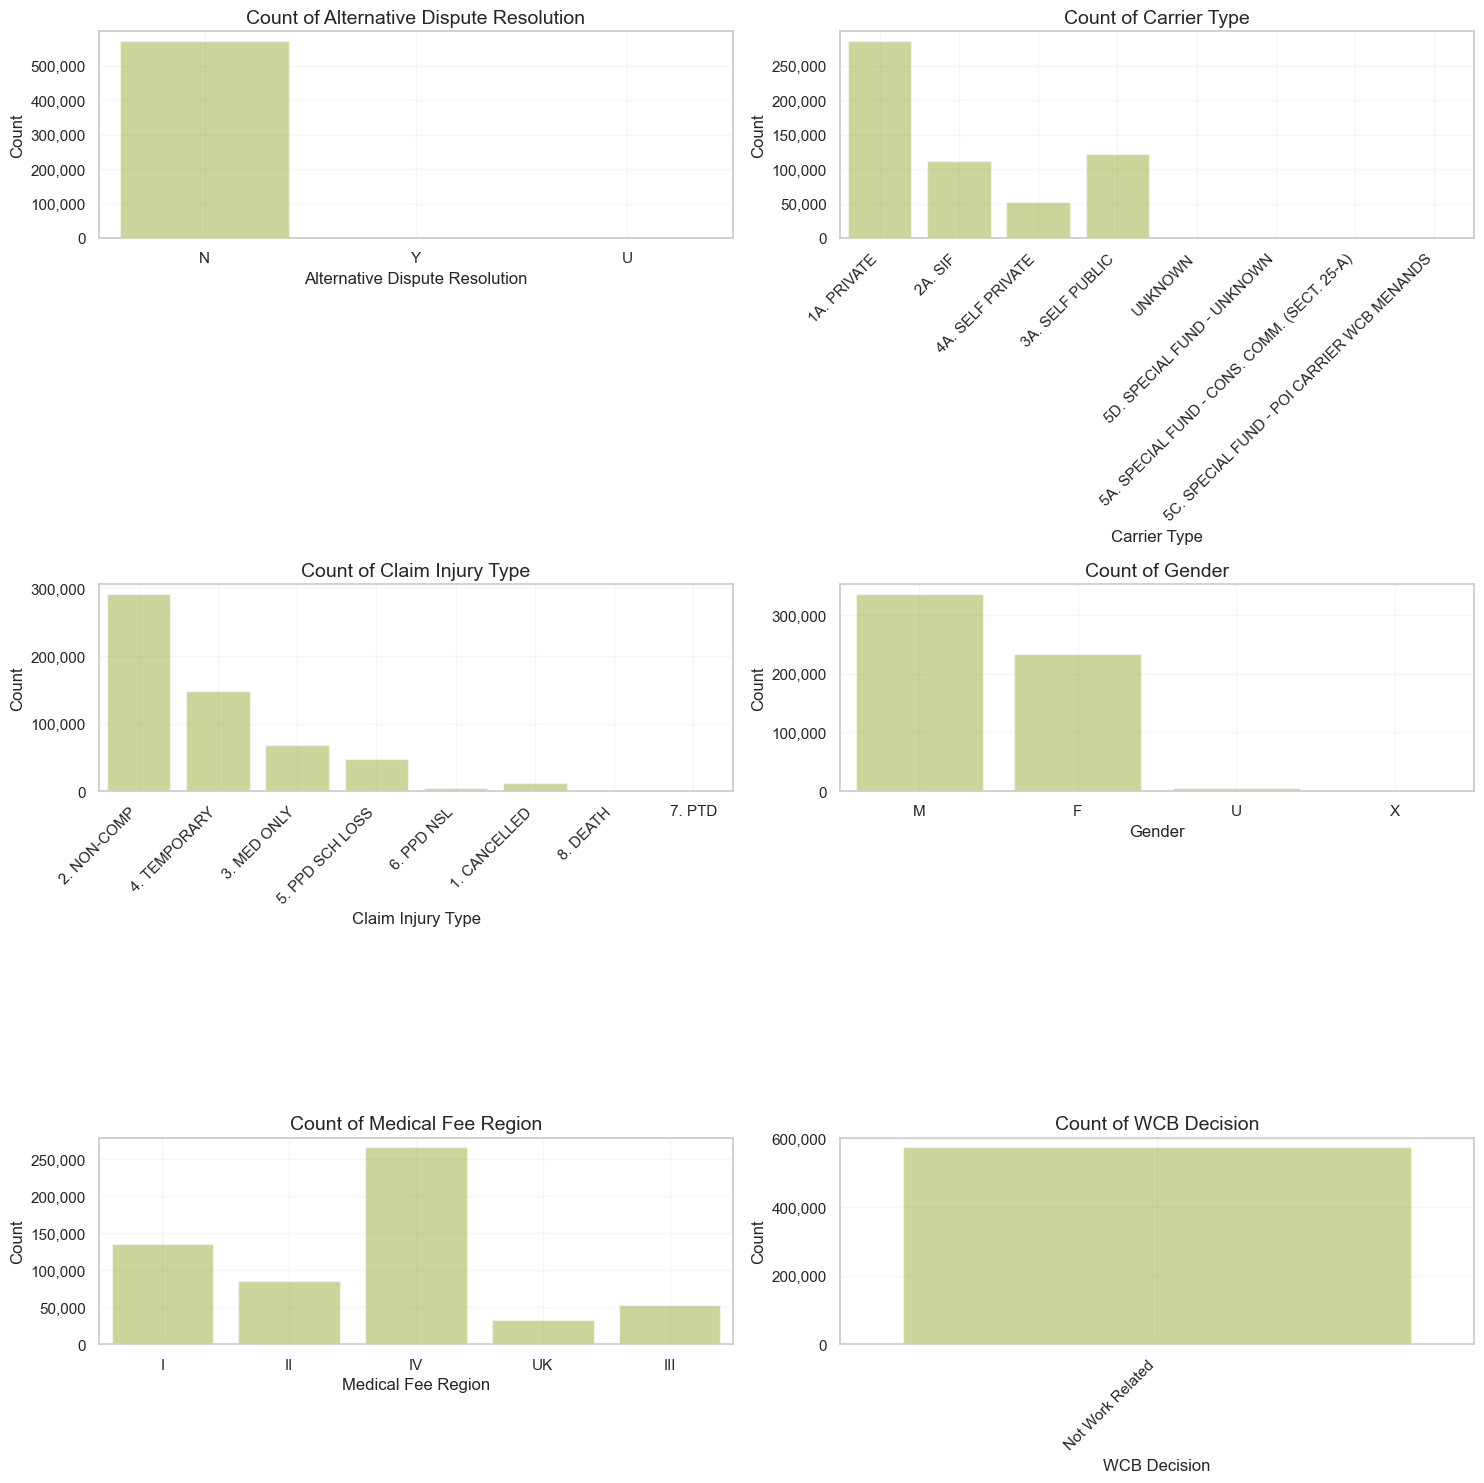

In [74]:
plot_barplots(train_EDA, categorical_columns, num_rows=3, num_cols=2)

For example, Industry Code 31, 32, 33 correspond to MANUFACTURING, 44 & 45 correspond to RETAIL TRADE... so we need to check if the code is really diferent, if not we need to normalize the codes according rto the descriptions.

<a id = "GeographicMap"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Categorical variables: Geographic Map</h4>
</div>

[Back to Univariate EDA: Data Visualization](#Univariate-Vizualization)

In [77]:
print(EDA_data['District Name'].unique().tolist())

['SYRACUSE', 'ROCHESTER', 'ALBANY', nan, 'HAUPPAUGE', 'NYC', 'BUFFALO', 'BINGHAMTON', 'STATEWIDE']


In [78]:
print(EDA_data['County of Injury'].unique().tolist())

['ST. LAWRENCE', 'WYOMING', 'ORANGE', nan, 'DUTCHESS', 'SUFFOLK', 'ONONDAGA', 'RICHMOND', 'MONROE', 'KINGS', 'NEW YORK', 'QUEENS', 'WESTCHESTER', 'GREENE', 'NASSAU', 'ALBANY', 'ERIE', 'BRONX', 'CAYUGA', 'NIAGARA', 'LIVINGSTON', 'WASHINGTON', 'MADISON', 'WARREN', 'SENECA', 'GENESEE', 'SARATOGA', 'CHAUTAUQUA', 'COLUMBIA', 'RENSSELAER', 'CATTARAUGUS', 'ROCKLAND', 'SCHUYLER', 'BROOME', 'ULSTER', 'CLINTON', 'ONEIDA', 'UNKNOWN', 'MONTGOMERY', 'ONTARIO', 'SCHENECTADY', 'CHEMUNG', 'YATES', 'HERKIMER', 'ALLEGANY', 'TIOGA', 'FULTON', 'DELAWARE', 'TOMPKINS', 'PUTNAM', 'OSWEGO', 'LEWIS', 'ESSEX', 'OTSEGO', 'CORTLAND', 'ORLEANS', 'SULLIVAN', 'CHENANGO', 'FRANKLIN', 'WAYNE', 'JEFFERSON', 'STEUBEN', 'SCHOHARIE', 'HAMILTON']


`Its seems that all values - both Districts and Counties - are for the state of NY (USA)`

In [80]:
district_counts = EDA_data.groupby('District Name').size().reset_index(name='Injury Claims')
district_claims = district_counts['Injury Claims'].sum()
district_counts['Percentage'] = (district_counts['Injury Claims'] / district_claims) * 100
district_counts['Percentage'] = district_counts['Percentage'].map('{:.0f}%'.format)
district_counts = district_counts.sort_values(by='Injury Claims', ascending=False)
district_counts

District Name  Injury Claims Percentage
4           NYC         270779        47%
0        ALBANY          86171        15%
3     HAUPPAUGE          60536        11%
2       BUFFALO          45605         8%
7      SYRACUSE          44646         8%
5     ROCHESTER          40449         7%
1    BINGHAMTON          21864         4%
6     STATEWIDE           3976         1%

In [81]:
# Same thing but for the counties
county_counts = EDA_data.groupby('County of Injury').size().reset_index(name='Injury Claims')
total_claims = county_counts['Injury Claims'].sum()
county_counts['Percentage'] = (county_counts['Injury Claims'] / total_claims) * 100
county_counts['Percentage'] = county_counts['Percentage'].map('{:.0f}%'.format)
county_counts = county_counts.sort_values(by='Injury Claims', ascending=False)
#county_counts since this are a lot to see in one table, we are going to check in a map

In [82]:
# This is a dict with source = https://www.weather.gov/source/pimar/FIPS/ny_cnty.jpg and
#https://www.health.ny.gov/health_care/medicaid/redesign/behavioral_health/children/2023/docs/cftss-hcbs_kids_fips.xlsxthat 
#this will serve to map the counties with their fips codes so we can vixualize it
county_fips_mapping = {
    'ST. LAWRENCE': '36089', 'WYOMING': '36121', 'ORANGE': '36071', 'DUTCHESS': '36027', 'SUFFOLK': '36103', 'ONONDAGA': '36067',
    'RICHMOND': '36085',  'MONROE': '36055', 'KINGS': '36047','NEW YORK': '36061', 'QUEENS': '36081','WESTCHESTER': '36119',
    'GREENE': '36039', 'NASSAU': '36059', 'ALBANY': '36001', 'ERIE': '36029', 'BRONX': '36005', 'CAYUGA': '36011', 'NIAGARA': '36063',
    'LIVINGSTON': '36051', 'WASHINGTON': '36115', 'MADISON': '36053', 'WARREN': '36113', 'SENECA': '36099', 'GENESEE': '36037',
    'SARATOGA': '36091', 'CHAUTAUQUA': '36013', 'COLUMBIA': '36021', 'RENSSELAER': '36083', 'CATTARAUGUS': '36009', 'ROCKLAND': '36087',
    'SCHUYLER': '36097', 'BROOME': '36007', 'ULSTER': '36111', 'CLINTON': '36019', 'ONEIDA': '36065', 'MONTGOMERY': '36057',
    'ONTARIO': '36069', 'SCHENECTADY': '36093', 'CHEMUNG': '36015', 'YATES': '36123', 'HERKIMER': '36043', 'ALLEGANY': '36003', 'TIOGA': '36107',
    'FULTON': '360335','DELAWARE': '36025', 'TOMPKINS': '36109', 'PUTNAM': '36079', 'OSWEGO': '36075', 'LEWIS': '36049', 'ESSEX': '36031', 
    'OTSEGO': '36077', 'CORTLAND': '36023', 'ORLEANS': '36073', 'SULLIVAN': '36105', 'CHENANGO': '36017', 'FRANKLIN': '36033', 
    'WAYNE': '36117', 'JEFFERSON': '36045', 'STEUBEN': '36101','SCHOHARIE': '36095', 'HAMILTON': '36041'
}

county_counts['FIPS'] = county_counts['County of Injury'].replace(county_fips_mapping)
county_counts

County of Injury  Injury Claims Percentage   FIPS
51          SUFFOLK          60430        11%  36103
40           QUEENS          58333        10%  36081
23            KINGS          53207         9%  36047
29           NASSAU          43580         8%  36059
2             BRONX          39618         7%  36005
..              ...            ...        ...    ...
61          WYOMING            760         0%  36121
28       MONTGOMERY            613         0%  36057
46        SCHOHARIE            558         0%  36095
62            YATES            396         0%  36123
20         HAMILTON            134         0%  36041

[63 rows x 4 columns]

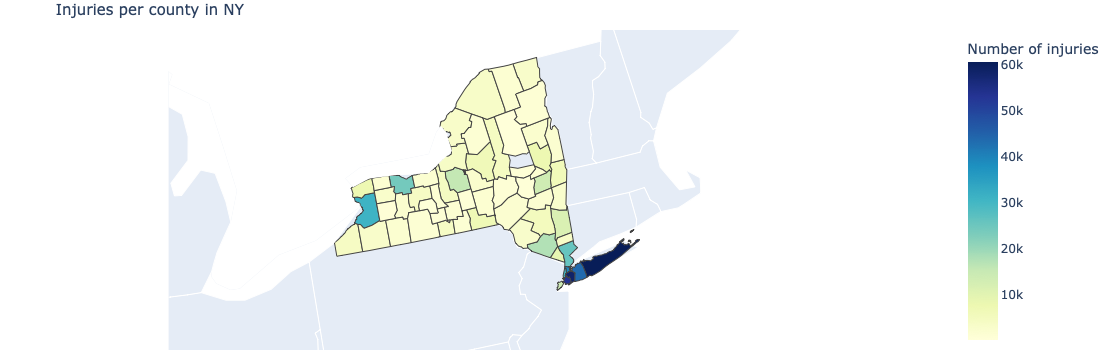

In [83]:
fig = px.choropleth(county_counts,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='FIPS', 
                    color='Injury Claims',  
                    hover_name='County of Injury', 
                    hover_data={'FIPS': False},  
                    color_continuous_scale='YlGnBu',  
                    scope='usa',  
                    title='Injuries per county in NY')

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(title_font_size=15, coloraxis_colorbar_title='Number of injuries', margin=dict(l=10, r=10, t=30, b=10))
fig.show()

Its intersting to see that with the map we can see that  the concentration of injury claims in Suffolk, Queens, Kings, Nassau, and Bronx can be attributed to a combination of geographical location, the presence of heavy industries, economic factors, and demographic characteristics. The proximity to ports and industrial zones often correlates with higher injury rates due to the nature of the work involved

<a id = "Boolean"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Boolean variables</h4>
</div>

[Back to Univariate EDA: Data Visualization](#Univariate-Vizualization)

In [86]:
def plot_boolean_bar_plots(data, boolean_columns, num_rows, num_cols):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))  
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs] 

    for i, col in enumerate(boolean_columns):
        count_data = data[col].value_counts()

        sns.barplot(x=count_data.index, y=count_data.values, ax=axs[i], palette=pal_novaims, alpha=0.5)
        axs[i].set_title(f'Count and Percentage of {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')
        axs[i].grid(color='lightgray', alpha=0.2)

        total = count_data.sum()  
        for p in axs[i].patches:
            height = p.get_height()
            percentage = (height / total) * 100 
            axs[i].annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),  ha='center', va='bottom',  fontsize=12)
        for label in axs[i].get_xticklabels():
            label.set_rotation(0)  
                
    for j in range(len(boolean_columns), num_rows * num_cols):
        fig.delaxes(axs[j])

    plt.subplots_adjust(hspace=0.1, wspace=0.3) 
    plt.tight_layout(pad=0.1)  
    plt.show()

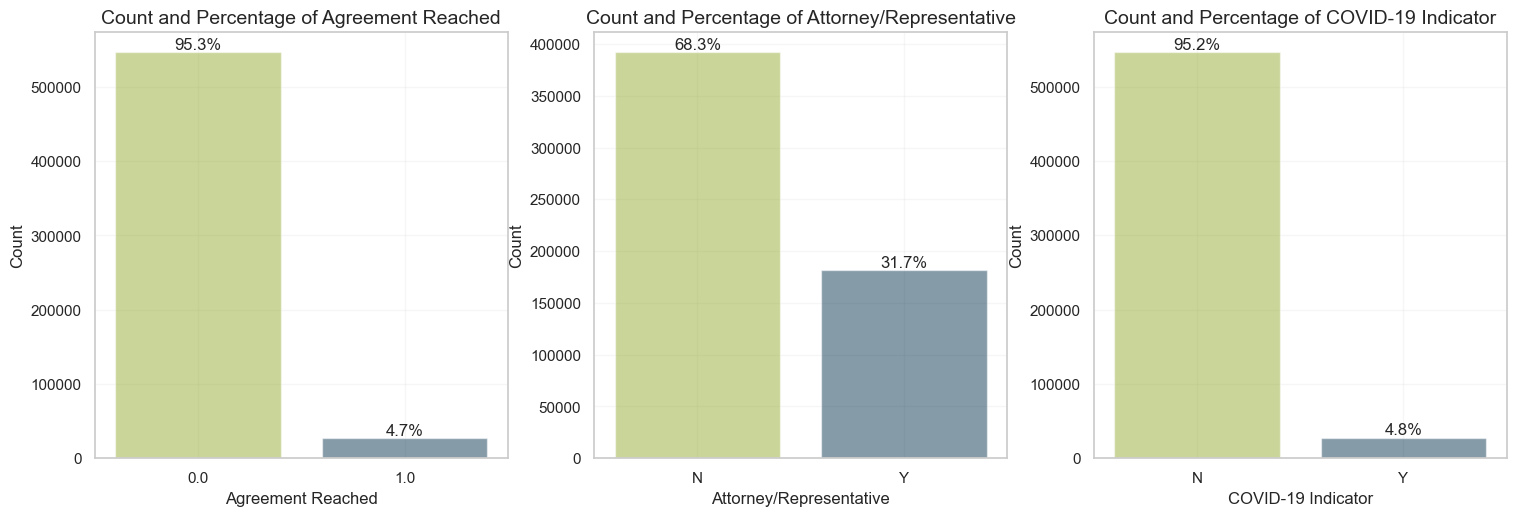

In [87]:
plot_boolean_bar_plots(train_EDA, boolean_columns, num_rows=1, num_cols=3)

`Note:` The % are not counting the Nan values, only the existent 574026	values of the columns

`Agreement Reached`:
 - This suggests that the majority of claims do not result in an agreement, indicating that many cases might either remain unresolved or proceed to further dispute resolution processes.
 
`Attorney/Representative`
- The majority of claims do not involve an attorney. This could potentially impact the speed of the procedures and may also influence the outcome, as having legal representation often affects case dynamics.

`Covid 19 Indicator`:
 - The high percentage of claims marked as "No" suggests that a significant portion of the claims are not related to COVID-19.

`Note`: transform the last 2 to booleans (1 or 0)

<a id = "Dates"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Date variables</h4>
</div>

[Back to Univariate EDA: Data Visualization](#Univariate-Vizualization)

In [90]:
#Line Plot(Date Columns)

def plot_claims_by_date(data, date_columns):
    combined_counts = pd.DataFrame()

    for col in date_columns:
        count_data = data[col].value_counts().reset_index()
        count_data.columns = ['Date', 'Claims']  
        count_data['Date Column'] = col  
        count_data['Date'] = pd.to_datetime(count_data['Date'])
        combined_counts = pd.concat([combined_counts, count_data], ignore_index=True)
        
    plt.figure(figsize=(15, 6))  
    sns.lineplot(data=combined_counts, x='Date', y='Claims', hue='Date Column', marker=None, palette=[pastel_color])
    
    plt.title('Claims Count by Date with Trend Line')
    plt.xlabel('Date')
    plt.ylabel('Number of Claims')
    plt.xticks(rotation=0)
    plt.legend(title='Date Columns')
    plt.grid()
    plt.tight_layout()
    plt.show()

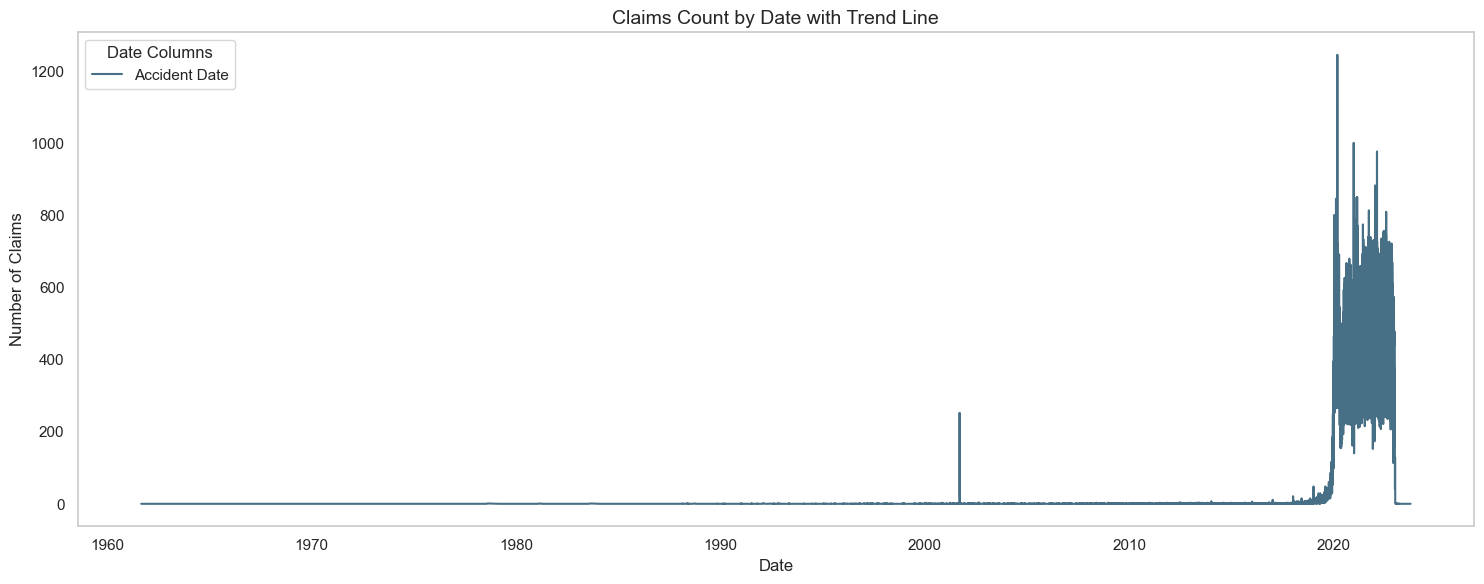

In [91]:
plot_claims_by_date(train_EDA, date_columns)

We can see a spike before 2020, that suggests an anomaly or major external event. The rest of the data is concentrated between 2019 and 2022.


In [93]:
train_EDA['Accident Date'] = pd.to_datetime(train_EDA['Accident Date'], errors='coerce')
train_EDA[train_EDA['Accident Date'] < '2010-01-01'].head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5394016             1996-10-01           28.0                              N   
5393964             2001-09-12           49.0                              N   
5394353             1984-03-22           60.0                              N   
5394386             1999-12-06           31.0                              N   
5394713             2002-05-21           33.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5394016             2020-01-02                       Y                  0.0   
5393964             2020-01-02                       Y                  0.0   
5394353             2020-01-02                       N                  0.0   
5394386             2020-01-03                       Y                  0.0   
5394713             2020-01-03                       Y                  0.0   

                  Birth Year    C-2 Date C-3 Date  \
Claim Identifier                                    
5394016               1968.0  2020-01-02      NaN   
5393964               1952.0         NaN      NaN   
5394353               1923.0  2020-01-02      NaN   
5394386                  NaN  2020-01-03      NaN   
5394713               1968.0  2020-01-03      NaN   

                                  Carrier Name      Carrier Type  \
Claim Identifier                                                   
5394016             LIBERTY MUTUAL FIRE INS CO       1A. PRIVATE   
5393964           *** CARRIER UNDETERMINED ***           UNKNOWN   
5394353               ROCHESTER, UNIVERSITY OF  4A. SELF PRIVATE   
5394386             LIBERTY MUTUAL FIRE INS CO       1A. PRIVATE   
5394713             LIBERTY MUTUAL FIRE INS CO       1A. PRIVATE   

                 Claim Injury Type County of Injury COVID-19 Indicator  \
Claim Identifier                                                         
5394016               4. TEMPORARY           NASSAU                  N   
5393964                2. NON-COMP         NEW YORK                  N   
5394353                2. NON-COMP           MONROE                  N   
5394386               4. TEMPORARY           NASSAU                  N   
5394713               4. TEMPORARY           NASSAU                  N   

                 District Name First Hearing Date Gender  IME-4 Count  \
Claim Identifier                                                        
5394016                    NYC                NaN      M          NaN   
5393964              STATEWIDE                NaN      M          NaN   
5394353              ROCHESTER                NaN      M          NaN   
5394386                    NYC                NaN      M          NaN   
5394713                    NYC                NaN      M          NaN   

                  Industry Code       Industry Code Description  \
Claim Identifier                                                  
5394016                    49.0  TRANSPORTATION AND WAREHOUSING   
5393964                     NaN                             NaN   
5394353                    61.0            EDUCATIONAL SERVICES   
5394386                    49.0  TRANSPORTATION AND WAREHOUSING   
5394713                    49.0  TRANSPORTATION AND WAREHOUSING   

                 Medical Fee Region  WCIO Cause of Injury Code  \
Claim Identifier                                                 
5394016                          IV                       56.0   
5393964                          IV                        NaN   
5394353                          II                       99.0   
5394386                          IV                       75.0   
5394713                          IV                       68.0   

                 WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
Claim Id

This could be interesting for creating a new feature: `Accident_to_Assembly_Delay`. Essentially, it measures the time elapsed between the `Accident Date` and the `Assembly Date`. It's possible that the longer the time that has passed, the more difficult it becomes to prove something?

<a id = "Bivariate-Vizualization"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">1.2.4. Bivariate EDA: Data Visualization</h3>
</div>

- [Numeric-Numeric: Correlations](#NNCorrelations)
- [Numeric-Categorical: Correlations](#NCCorrelations)
- [Categorical-Categorical: Cross-tabulations](#CCCross-tabulations)

[Back to Index](#Index)

<a id = "NNCorrelations"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Numeric-Numeric: Correlations</h4>
</div>

[Back to Bivariate EDA: Data Visualization](#Bivariate-Vizualization)

In order to try to see some type of correlation, we will remve rougtly the most severe outliers from the EDA dataframe.

In [98]:
train_EDA = train_EDA[train_EDA['Average Weekly Wage'] < 800]
train_EDA = train_EDA[train_EDA['Birth Year'] > 0] 

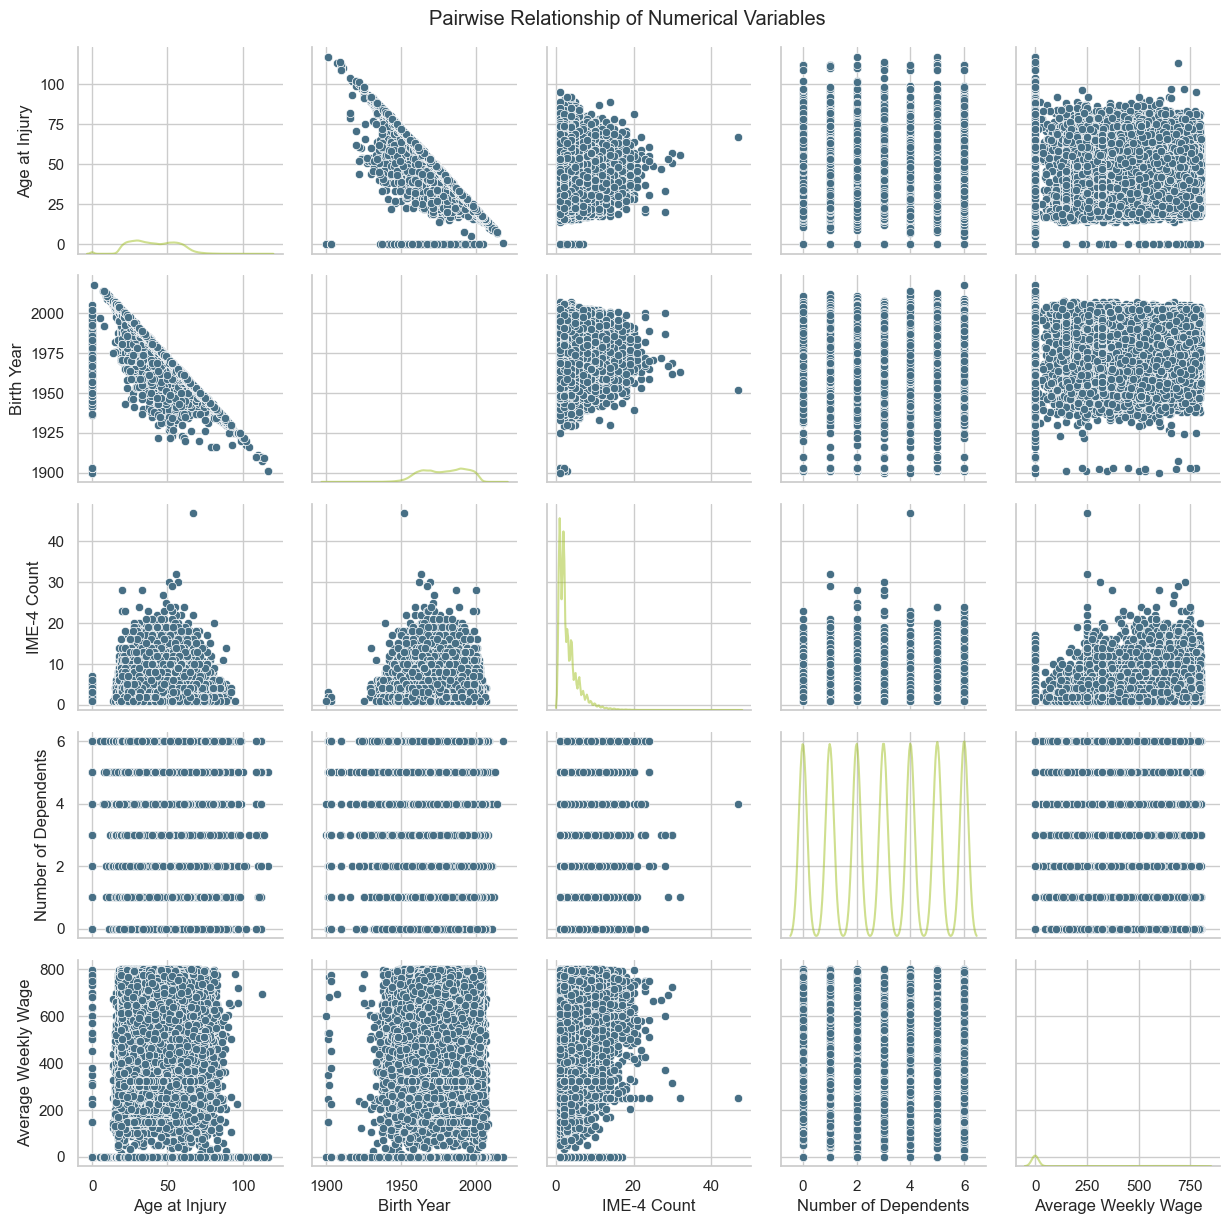

In [99]:
metric_features = discrete_columns + continuous_columns

# PairGrid
chart = sns.PairGrid(train_EDA[metric_features])
chart.map_upper(sns.scatterplot, color=pastel_color)  
chart.map_lower(sns.scatterplot, color=pastel_color)  
chart.map_diag(sns.kdeplot, color=pal_novaims[0], alpha=0.5)  
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Relationship of Numerical Variables')
plt.show()

As expected we can see a negatice correlation between Age and Birth Year.

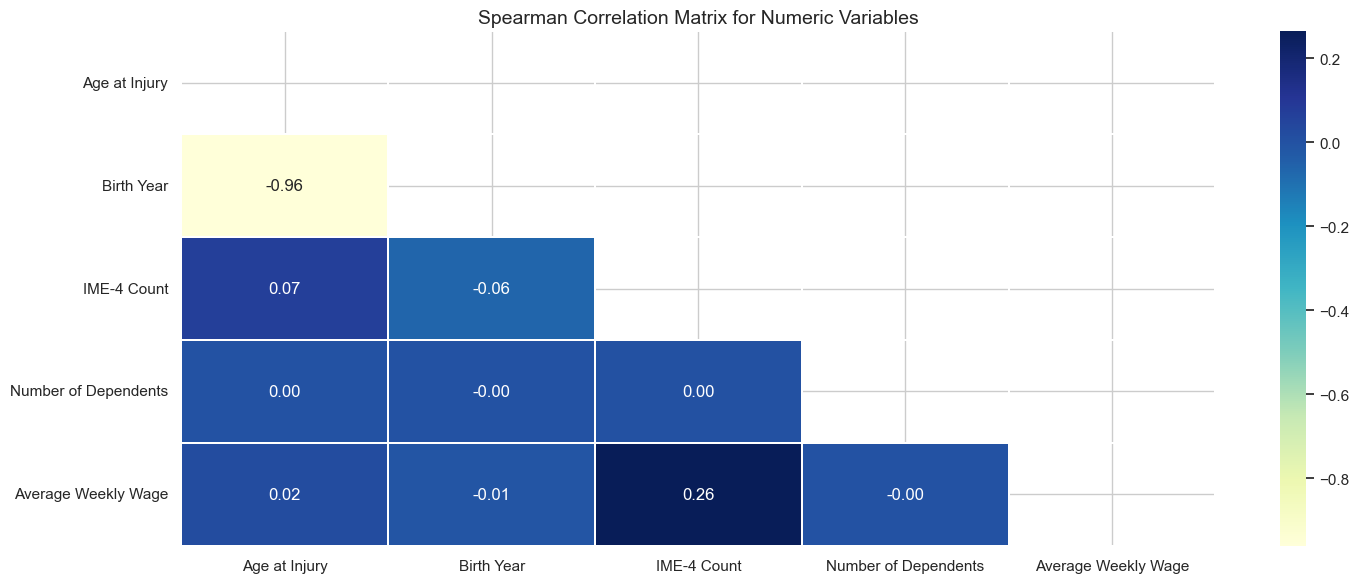

In [101]:
# correlation matrix using Spearman correlation
corr_matrix_spearman = train_EDA[metric_features].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix_spearman, dtype=bool))
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix_spearman, mask=mask, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.2)
plt.title('Spearman Correlation Matrix for Numeric Variables')
plt.show()

#Adapted from Previous Notebook

<a id = "NCCorrelations"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Numeric-Categorical: Correlations</h4>
</div>

[Back to Bivariate EDA: Data Visualization](#Bivariate-Vizualization)

In [103]:
#print(EDA_data['Carrier Type'].unique().tolist())
carrier_type_mapping = {
    '1A. PRIVATE': 'Private',
    '2A. SIF': 'State Insurance Fund',
    '4A. SELF PRIVATE': 'Self Private',
    '3A. SELF PUBLIC': 'Self Public',
    'UNKNOWN': 'Unknown',
    '5D. SPECIAL FUND - UNKNOWN': 'Special Fund Unknown',
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'Special Fund Cons Comm',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 'Special Fund POI Carrier'
}
train_EDA['Carrier Type'] = train_EDA['Carrier Type'].replace(carrier_type_mapping)

In [104]:
combinations = [
    {'numeric': 'Age at Injury', 'categorical': 'Carrier Type'},  # Average of age in injury by Carrier Type
    {'numeric': 'Average Weekly Wage', 'categorical': 'Carrier Type'},  # Average Weekly Wage by ""
    {'numeric': 'IME-4 Count', 'categorical': 'Carrier Type'},  # Average IME-4 by ""
    {'numeric': 'Number of Dependents', 'categorical': 'Carrier Type'},  # Nuber of Dependents by ""
    {'numeric': 'Average Weekly Wage', 'categorical': 'Medical Fee Region'},  # Average Weekly Wage in injury by Medical Fee Region
    {'numeric': 'Age at Injury', 'categorical': 'Medical Fee Region'}, # Average of age in injury by ""
    {'numeric': 'Average Weekly Wage', 'categorical': 'Gender'},  # Average Weekly Wage in injury by Gender
    {'numeric': 'Age at Injury', 'categorical': 'Gender'}, # Average of age in injury by ""
    {'numeric': 'Number of Dependents', 'categorical': 'Gender'},  # Nuber of Dependents by ""
    {'numeric': 'Average Weekly Wage', 'boolean': 'Agreement Reached'},  # Average Weekly Wage in injury by Agreement Reached
    {'numeric': 'Average Weekly Wage', 'boolean': 'Attorney/Representative'}, # Average Weekly Wage in injury by Attorney
    {'numeric': 'Average Weekly Wage', 'boolean': 'COVID-19 Indicator'}  # Average Weekly Wage in injury by COVID-19 Indicator
]

In [105]:
# Function to generate a graph for each numeric-categorical or boolean-categorical combination
def generate_graph(data, numeric_col, categorical_col=None, boolean_col=None, ax=None):    
    if categorical_col:
        if data[categorical_col].dtype == 'object' or pd.api.types.is_categorical_dtype(data[categorical_col]):
            sns.barplot(x=categorical_col,y=numeric_col,data=data, ax=ax, color=pastel_color)
            ax.set_title(f"{numeric_col} by {categorical_col}")
            ax.set_xlabel(categorical_col)
            ax.set_ylabel(numeric_col)
            ax.tick_params(axis='x', rotation=45)
        else:
            ax.scatter(data[categorical_col], data[numeric_col], alpha=0.7, color=pastel_color)
            ax.set_title(f"{numeric_col} by {categorical_col}")
            ax.set_xlabel(categorical_col)
            ax.set_ylabel(numeric_col)
    elif boolean_col:
        sns.barplot(x=boolean_col, y=numeric_col, data=data, ax=ax, color=pastel_color)
        ax.set_title(f"{numeric_col} by {boolean_col}")
        ax.set_xlabel(boolean_col)
        ax.set_ylabel(numeric_col)
        ax.tick_params(axis='x', rotation=0)

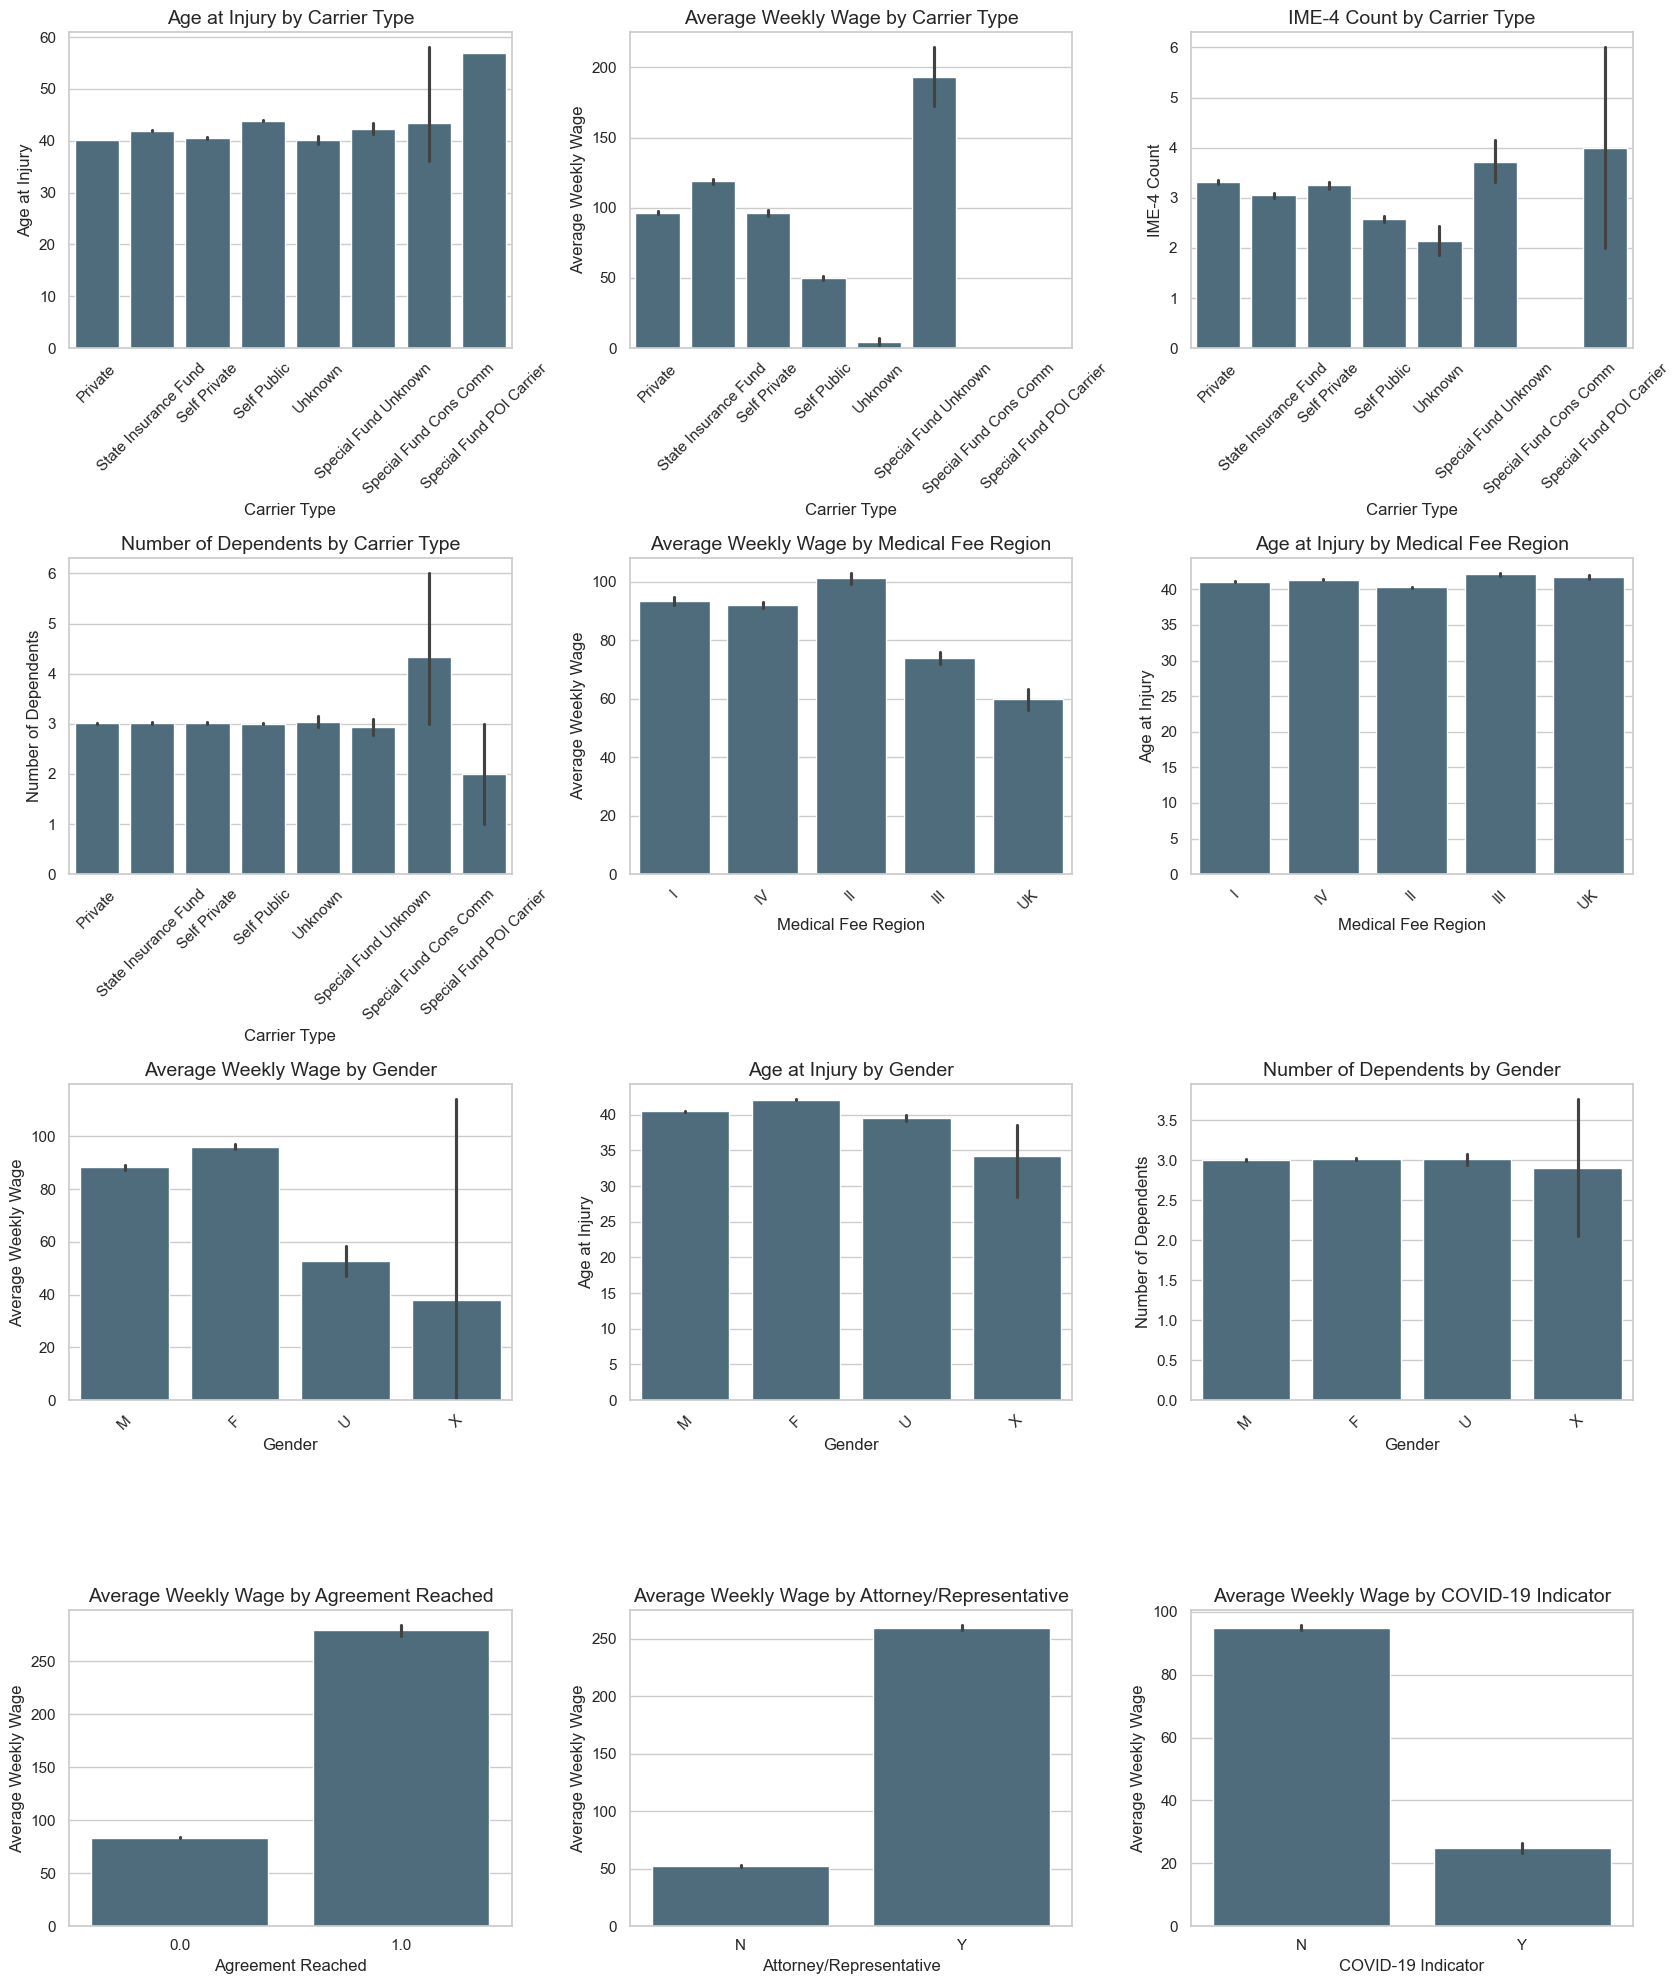

In [106]:
num_plots = len(combinations)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 5 * num_rows))
for i, combo in enumerate(combinations):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    if 'categorical' in combo:
        generate_graph(train_EDA, combo['numeric'], categorical_col=combo['categorical'], ax=ax)
    elif 'boolean' in combo:
        generate_graph(train_EDA, combo['numeric'], boolean_col=combo['boolean'], ax=ax)

plt.tight_layout()
plt.show()

In [107]:
# Cross Table to compare the percentages(%)
for combo in combinations:
    if 'categorical' in combo:
        categorical_col = combo['categorical']
        numeric_col = combo['numeric']
        cross_table = train_EDA.groupby(categorical_col, as_index=False)[numeric_col].mean()
        total = cross_table[numeric_col].sum()
        
        # Lidar com NaNs: preencher com 0 antes de converter para int
        cross_table['Percentage'] = ((cross_table[numeric_col] / total) * 100).fillna(0).round(0).astype(int).astype(str) + '%'
        cross_table = cross_table.sort_values(by=numeric_col, ascending=False)
        display(cross_table)

    elif 'boolean' in combo:
        boolean_col = combo['boolean']
        numeric_col = combo['numeric']
        cross_table = train_EDA.groupby(boolean_col, as_index=False)[numeric_col].mean()
        total = cross_table[numeric_col].sum()
        cross_table['Percentage'] = ((cross_table[numeric_col] / total) * 100).fillna(0).round(0).astype(int).astype(str) + '%'
        cross_table = cross_table.sort_values(by=numeric_col, ascending=False)
        display(cross_table)

Carrier Type  Age at Injury Percentage
4  Special Fund POI Carrier      57.000000        16%
2               Self Public      43.854937        13%
3    Special Fund Cons Comm      43.333333        12%
5      Special Fund Unknown      42.334869        12%
6      State Insurance Fund      41.920139        12%
1              Self Private      40.509083        12%
7                   Unknown      40.222141        12%
0                   Private      40.152839        11%

Carrier Type  Average Weekly Wage Percentage
5      Special Fund Unknown           193.341935        35%
6      State Insurance Fund           118.857143        21%
0                   Private            96.453276        17%
1              Self Private            96.435712        17%
2               Self Public            49.974873         9%
7                   Unknown             4.581981         1%
3    Special Fund Cons Comm             0.000000         0%
4  Special Fund POI Carrier             0.000000         0%

Carrier Type  IME-4 Count Percentage
4  Special Fund POI Carrier     4.000000        18%
5      Special Fund Unknown     3.712575        17%
0                   Private     3.315687        15%
1              Self Private     3.248488        15%
6      State Insurance Fund     3.048191        14%
2               Self Public     2.572685        12%
7                   Unknown     2.134831        10%
3    Special Fund Cons Comm          NaN         0%

Carrier Type  Number of Dependents Percentage
3    Special Fund Cons Comm              4.333333        18%
7                   Unknown              3.044428        13%
1              Self Private              3.020699        12%
6      State Insurance Fund              3.010564        12%
0                   Private              3.007665        12%
2               Self Public              3.005186        12%
5      Special Fund Unknown              2.929339        12%
4  Special Fund POI Carrier              2.000000         8%

Medical Fee Region  Average Weekly Wage Percentage
1                 II           101.206394        24%
0                  I            93.533195        22%
3                 IV            92.091190        22%
2                III            74.007963        18%
4                 UK            59.778317        14%

Medical Fee Region  Age at Injury Percentage
2                III      42.082388        20%
4                 UK      41.779849        20%
3                 IV      41.358112        20%
0                  I      41.074337        20%
1                 II      40.264790        19%

Gender  Average Weekly Wage Percentage
0      F            96.082145        35%
1      M            88.234775        32%
2      U            52.799370        19%
3      X            38.000000        14%

Gender  Age at Injury Percentage
0      F      42.067996        27%
1      M      40.508059        26%
2      U      39.525246        25%
3      X      34.190476        22%

Gender  Number of Dependents Percentage
2      U              3.016731        25%
0      F              3.014190        25%
1      M              3.004864        25%
3      X              2.904762        24%

Agreement Reached  Average Weekly Wage Percentage
1                1.0           278.851470        77%
0                0.0            83.567165        23%

Attorney/Representative  Average Weekly Wage Percentage
1                       Y           259.537985        83%
0                       N            52.376735        17%

COVID-19 Indicator  Average Weekly Wage Percentage
0                  N            94.915821        79%
1                  Y            24.945797        21%

<a id = "NCCorrelations"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Categorical-Categorical: Cross-tabulations</h4>
</div>

[Back to Bivariate EDA: Data Visualization](#Bivariate-Vizualization)

In [109]:
all_categorical_columns = categorical_columns + boolean_columns

In [216]:
# Análise Categórica-Categórica com o Teste de Qui-Quadrado (Chi-square)
for i in range(len(all_categorical_columns)):
    for j in range(i+1, len(all_categorical_columns)):
        cat_var = all_categorical_columns[i]
        cat_var2 = all_categorical_columns[j]
        
        # Criar uma tabela de contingência para as duas variáveis (categóricas ou booleanas)
        contingency_table = pd.crosstab(train_EDA[cat_var], train_EDA[cat_var2])
        
        # Executar o teste de Qui-Quadrado
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Exibir a tabela de contingência e os resultados do teste
        display(contingency_table)
        print(f"Chi-squared test for {cat_var} and {cat_var2}: p-value = {p:.4f}")
        print(f"Chi2 = {chi2:.4f}, Degrees of Freedom = {dof}\n")

        # Quick interpretation of the p-value
        if p < 0.05:
            print(f"Result: There is a significant relationship between {cat_var} and {cat_var2} (p < 0.05)")
        else:
            print(f"Result: There is insufficient evidence of a significant relationship between {cat_var} and {cat_var2} (p ≥ 0.05)")
        print('-'*80)


Carrier Type                    Private  Self Private  Self Public  \
Alternative Dispute Resolution                                       
N                                193336         36541        68066   
U                                     0             4            0   
Y                                    18          2152            1   

Carrier Type                    Special Fund Cons Comm  \
Alternative Dispute Resolution                           
N                                                    3   
U                                                    0   
Y                                                    0   

Carrier Type                    Special Fund POI Carrier  \
Alternative Dispute Resolution                             
N                                                      2   
U                                                      0   
Y                                                      0   

Carrier Type                    Special Fund Unknown  State Insurance Fund  \
Alternative Dispute Resolution                                               
N                                                651                 61530   
U                                                  0                     0   
Y                                                  0                     2   

Carrier Type                    Unknown  
Alternative Dispute Resolution           
N                                  1373  
U                                     0  
Y                                     0

Chi-squared test for Alternative Dispute Resolution and Carrier Type: p-value = 0.0000
Chi2 = 17997.9209, Degrees of Freedom = 14

Result: There is a significant relationship between Alternative Dispute Resolution and Carrier Type (p < 0.05)
--------------------------------------------------------------------------------


Claim Injury Type               1. CANCELLED  2. NON-COMP  3. MED ONLY  \
Alternative Dispute Resolution                                           
N                                      10043       247100        45465   
U                                          0            4            0   
Y                                         14         2159            0   

Claim Injury Type               4. TEMPORARY  5. PPD SCH LOSS  6. PPD NSL  \
Alternative Dispute Resolution                                              
N                                      50946             6805         983   
U                                          0                0           0   
Y                                          0                0           0   

Claim Injury Type               7. PTD  8. DEATH  
Alternative Dispute Resolution                    
N                                   19       141  
U                                    0         0  
Y                                    0         0

Chi-squared test for Alternative Dispute Resolution and Claim Injury Type: p-value = 0.0000
Chi2 = 967.6134, Degrees of Freedom = 14

Result: There is a significant relationship between Alternative Dispute Resolution and Claim Injury Type (p < 0.05)
--------------------------------------------------------------------------------


Gender                               F       M     U   X
Alternative Dispute Resolution                          
N                               160374  197762  3345  21
U                                    0       4     0   0
Y                                   92    2079     2   0

Chi-squared test for Alternative Dispute Resolution and Gender: p-value = 0.0000
Chi2 = 1467.8066, Degrees of Freedom = 6

Result: There is a significant relationship between Alternative Dispute Resolution and Gender (p < 0.05)
--------------------------------------------------------------------------------


Medical Fee Region                  I     II    III      IV    UK
Alternative Dispute Resolution                                   
N                               91643  59354  33581  167132  9792
U                                   0      0      1       3     0
Y                                   7     63    197    1614   292

Chi-squared test for Alternative Dispute Resolution and Medical Fee Region: p-value = 0.0000
Chi2 = 2045.0219, Degrees of Freedom = 8

Result: There is a significant relationship between Alternative Dispute Resolution and Medical Fee Region (p < 0.05)
--------------------------------------------------------------------------------


WCB Decision                    Not Work Related
Alternative Dispute Resolution                  
N                                         361502
U                                              4
Y                                           2173

Chi-squared test for Alternative Dispute Resolution and WCB Decision: p-value = 1.0000
Chi2 = 0.0000, Degrees of Freedom = 0

Result: There is insufficient evidence of a significant relationship between Alternative Dispute Resolution and WCB Decision (p ≥ 0.05)
--------------------------------------------------------------------------------


Agreement Reached                  0.0    1.0
Alternative Dispute Resolution               
N                               346974  14528
U                                    4      0
Y                                 2173      0

Chi-squared test for Alternative Dispute Resolution and Agreement Reached: p-value = 0.0000
Chi2 = 91.1294, Degrees of Freedom = 2

Result: There is a significant relationship between Alternative Dispute Resolution and Agreement Reached (p < 0.05)
--------------------------------------------------------------------------------


Attorney/Representative              N      Y
Alternative Dispute Resolution               
N                               293339  68163
U                                    3      1
Y                                 1886    287

Chi-squared test for Alternative Dispute Resolution and Attorney/Representative: p-value = 0.0000
Chi2 = 45.1959, Degrees of Freedom = 2

Result: There is a significant relationship between Alternative Dispute Resolution and Attorney/Representative (p < 0.05)
--------------------------------------------------------------------------------


COVID-19 Indicator                   N      Y
Alternative Dispute Resolution               
N                               343068  18434
U                                    4      0
Y                                 2168      5

Chi-squared test for Alternative Dispute Resolution and COVID-19 Indicator: p-value = 0.0000
Chi2 = 106.6150, Degrees of Freedom = 2

Result: There is a significant relationship between Alternative Dispute Resolution and COVID-19 Indicator (p < 0.05)
--------------------------------------------------------------------------------


Claim Injury Type         1. CANCELLED  2. NON-COMP  3. MED ONLY  \
Carrier Type                                                       
Private                           5155       132965        21549   
Self Private                       637        25888         4476   
Self Public                       2025        51531         9289   
Special Fund Cons Comm               2            0            1   
Special Fund POI Carrier             0            0            0   
Special Fund Unknown                33          323           61   
State Insurance Fund              2072        37358        10080   
Unknown                            133         1198            9   

Claim Injury Type         4. TEMPORARY  5. PPD SCH LOSS  6. PPD NSL  7. PTD  \
Carrier Type                                                                  
Private                          29442             3718         461       9   
Self Private                      6579              951         154       1   
Self Public                       4151              902         146       0   
Special Fund Cons Comm               0                0           0       0   
Special Fund POI Carrier             2                0           0       0   
Special Fund Unknown               204               22           3       1   
State Insurance Fund             10535             1212         219       8   
Unknown                             33                0           0       0   

Claim Injury Type         8. DEATH  
Carrier Type                        
Private                         55  
Self Private                    11  
Self Public                     23  
Special Fund Cons Comm           0  
Special Fund POI Carrier         0  
Special Fund Unknown             4  
State Insurance Fund            48  
Unknown                          0

Chi-squared test for Carrier Type and Claim Injury Type: p-value = 0.0000
Chi2 = 7643.1963, Degrees of Freedom = 49

Result: There is a significant relationship between Carrier Type and Claim Injury Type (p < 0.05)
--------------------------------------------------------------------------------


Gender                        F       M     U   X
Carrier Type                                     
Private                   84656  106041  2656   1
Self Private              17139   21370   188   0
Self Public               32121   35630   301  15
Special Fund Cons Comm        1       2     0   0
Special Fund POI Carrier      0       2     0   0
Special Fund Unknown        170     479     2   0
State Insurance Fund      26083   35248   197   4
Unknown                     296    1073     3   1

Chi-squared test for Carrier Type and Gender: p-value = 0.0000
Chi2 = 1706.5143, Degrees of Freedom = 21

Result: There is a significant relationship between Carrier Type and Gender (p < 0.05)
--------------------------------------------------------------------------------


Medical Fee Region            I     II    III     IV    UK
Carrier Type                                              
Private                   47543  32270  16911  90555  6075
Self Private              11555   8519   1720  15810  1093
Self Public               15103   9043   8386  34387  1148
Special Fund Cons Comm        0      1      1      1     0
Special Fund POI Carrier      2      0      0      0     0
Special Fund Unknown         58     46     48    480    19
State Insurance Fund      17288   9445   6567  26539  1693
Unknown                     101     93    146    977    56

Chi-squared test for Carrier Type and Medical Fee Region: p-value = 0.0000
Chi2 = 5556.3268, Degrees of Freedom = 28

Result: There is a significant relationship between Carrier Type and Medical Fee Region (p < 0.05)
--------------------------------------------------------------------------------


WCB Decision              Not Work Related
Carrier Type                              
Private                             193354
Self Private                         38697
Self Public                          68067
Special Fund Cons Comm                   3
Special Fund POI Carrier                 2
Special Fund Unknown                   651
State Insurance Fund                 61532
Unknown                               1373

Chi-squared test for Carrier Type and WCB Decision: p-value = 1.0000
Chi2 = 0.0000, Degrees of Freedom = 0

Result: There is insufficient evidence of a significant relationship between Carrier Type and WCB Decision (p ≥ 0.05)
--------------------------------------------------------------------------------


Agreement Reached            0.0   1.0
Carrier Type                          
Private                   183645  9709
Self Private               36720  1977
Self Public                67621   446
Special Fund Cons Comm         3     0
Special Fund POI Carrier       0     2
Special Fund Unknown         589    62
State Insurance Fund       59230  2302
Unknown                     1343    30

Chi-squared test for Carrier Type and Agreement Reached: p-value = 0.0000
Chi2 = 2758.0739, Degrees of Freedom = 7

Result: There is a significant relationship between Carrier Type and Agreement Reached (p < 0.05)
--------------------------------------------------------------------------------


Attorney/Representative        N      Y
Carrier Type                           
Private                   160204  33150
Self Private               29660   9037
Self Public                56352  11715
Special Fund Cons Comm         2      1
Special Fund POI Carrier       0      2
Special Fund Unknown         203    448
State Insurance Fund       48316  13216
Unknown                      491    882

Chi-squared test for Carrier Type and Attorney/Representative: p-value = 0.0000
Chi2 = 4203.3424, Degrees of Freedom = 7

Result: There is a significant relationship between Carrier Type and Attorney/Representative (p < 0.05)
--------------------------------------------------------------------------------


COVID-19 Indicator             N      Y
Carrier Type                           
Private                   182701  10653
Self Private               37459   1238
Self Public                64092   3975
Special Fund Cons Comm         3      0
Special Fund POI Carrier       2      0
Special Fund Unknown         651      0
State Insurance Fund       58995   2537
Unknown                     1337     36

Chi-squared test for Carrier Type and COVID-19 Indicator: p-value = 0.0000
Chi2 = 609.5933, Degrees of Freedom = 7

Result: There is a significant relationship between Carrier Type and COVID-19 Indicator (p < 0.05)
--------------------------------------------------------------------------------


Gender                  F       M     U   X
Claim Injury Type                          
1. CANCELLED         3403    6525   126   3
2. NON-COMP        111339  135334  2579  11
3. MED ONLY         19347   25805   306   7
4. TEMPORARY        22690   27965   291   0
5. PPD SCH LOSS      3164    3598    43   0
6. PPD NSL            485     496     2   0
7. PTD                  7      12     0   0
8. DEATH               31     110     0   0

Chi-squared test for Claim Injury Type and Gender: p-value = 0.0000
Chi2 = 745.6477, Degrees of Freedom = 21

Result: There is a significant relationship between Claim Injury Type and Gender (p < 0.05)
--------------------------------------------------------------------------------


Medical Fee Region      I     II    III      IV    UK
Claim Injury Type                                    
1. CANCELLED         1666   1109   1005    5829   448
2. NON-COMP         62329  40275  24056  115172  7431
3. MED ONLY         12618   7490   4324   20125   908
4. TEMPORARY        12851   9141   3903   23884  1167
5. PPD SCH LOSS      1926   1185    410    3173   111
6. PPD NSL            218    197     60     493    15
7. PTD                  4      7      1       7     0
8. DEATH               38     13     20      66     4

Chi-squared test for Claim Injury Type and Medical Fee Region: p-value = 0.0000
Chi2 = 1674.8397, Degrees of Freedom = 28

Result: There is a significant relationship between Claim Injury Type and Medical Fee Region (p < 0.05)
--------------------------------------------------------------------------------


WCB Decision       Not Work Related
Claim Injury Type                  
1. CANCELLED                  10057
2. NON-COMP                  249263
3. MED ONLY                   45465
4. TEMPORARY                  50946
5. PPD SCH LOSS                6805
6. PPD NSL                      983
7. PTD                           19
8. DEATH                        141

Chi-squared test for Claim Injury Type and WCB Decision: p-value = 1.0000
Chi2 = 0.0000, Degrees of Freedom = 0

Result: There is insufficient evidence of a significant relationship between Claim Injury Type and WCB Decision (p ≥ 0.05)
--------------------------------------------------------------------------------


Agreement Reached     0.0    1.0
Claim Injury Type               
1. CANCELLED        10055      2
2. NON-COMP        249263      0
3. MED ONLY         45465      0
4. TEMPORARY        36648  14298
5. PPD SCH LOSS      6723     82
6. PPD NSL            853    130
7. PTD                 14      5
8. DEATH              130     11

Chi-squared test for Claim Injury Type and Agreement Reached: p-value = 0.0000
Chi2 = 90028.6221, Degrees of Freedom = 7

Result: There is a significant relationship between Claim Injury Type and Agreement Reached (p < 0.05)
--------------------------------------------------------------------------------


Attorney/Representative       N      Y
Claim Injury Type                     
1. CANCELLED               5806   4251
2. NON-COMP              231335  17928
3. MED ONLY               34052  11413
4. TEMPORARY              22963  27983
5. PPD SCH LOSS            1018   5787
6. PPD NSL                   34    949
7. PTD                        1     18
8. DEATH                     19    122

Chi-squared test for Claim Injury Type and Attorney/Representative: p-value = 0.0000
Chi2 = 94231.4095, Degrees of Freedom = 7

Result: There is a significant relationship between Claim Injury Type and Attorney/Representative (p < 0.05)
--------------------------------------------------------------------------------


COVID-19 Indicator       N      Y
Claim Injury Type                
1. CANCELLED          9724    333
2. NON-COMP         233248  16015
3. MED ONLY          44334   1131
4. TEMPORARY         50036    910
5. PPD SCH LOSS       6803      2
6. PPD NSL             981      2
7. PTD                  18      1
8. DEATH                96     45

Chi-squared test for Claim Injury Type and COVID-19 Indicator: p-value = 0.0000
Chi2 = 3405.4673, Degrees of Freedom = 7

Result: There is a significant relationship between Claim Injury Type and COVID-19 Indicator (p < 0.05)
--------------------------------------------------------------------------------


Medical Fee Region      I     II    III     IV    UK
Gender                                              
F                   39845  27174  15088  74986  3373
M                   50991  31677  18319  92280  6578
U                     814    566    371   1465   131
X                       0      0      1     18     2

Chi-squared test for Gender and Medical Fee Region: p-value = 0.0000
Chi2 = 599.9403, Degrees of Freedom = 12

Result: There is a significant relationship between Gender and Medical Fee Region (p < 0.05)
--------------------------------------------------------------------------------


WCB Decision  Not Work Related
Gender                        
F                       160466
M                       199845
U                         3347
X                           21

Chi-squared test for Gender and WCB Decision: p-value = 1.0000
Chi2 = 0.0000, Degrees of Freedom = 0

Result: There is insufficient evidence of a significant relationship between Gender and WCB Decision (p ≥ 0.05)
--------------------------------------------------------------------------------


Agreement Reached     0.0   1.0
Gender                         
F                  155019  5447
M                  190852  8993
U                    3259    88
X                      21     0

Chi-squared test for Gender and Agreement Reached: p-value = 0.0000
Chi2 = 300.9208, Degrees of Freedom = 3

Result: There is a significant relationship between Gender and Agreement Reached (p < 0.05)
--------------------------------------------------------------------------------


Attorney/Representative       N      Y
Gender                                
F                        134098  26368
M                        158113  41732
U                          3014    333
X                             3     18

Chi-squared test for Gender and Attorney/Representative: p-value = 0.0000
Chi2 = 1388.9242, Degrees of Freedom = 3

Result: There is a significant relationship between Gender and Attorney/Representative (p < 0.05)
--------------------------------------------------------------------------------


COVID-19 Indicator       N     Y
Gender                          
F                   151540  8926
M                   190821  9024
U                     2858   489
X                       21     0

Chi-squared test for Gender and COVID-19 Indicator: p-value = 0.0000
Chi2 = 842.5773, Degrees of Freedom = 3

Result: There is a significant relationship between Gender and COVID-19 Indicator (p < 0.05)
--------------------------------------------------------------------------------


WCB Decision        Not Work Related
Medical Fee Region                  
I                              91650
II                             59417
III                            33779
IV                            168749
UK                             10084

Chi-squared test for Medical Fee Region and WCB Decision: p-value = 1.0000
Chi2 = 0.0000, Degrees of Freedom = 0

Result: There is insufficient evidence of a significant relationship between Medical Fee Region and WCB Decision (p ≥ 0.05)
--------------------------------------------------------------------------------


Agreement Reached      0.0   1.0
Medical Fee Region              
I                    88996  2654
II                   57285  2132
III                  32604  1175
IV                  160731  8018
UK                    9535   549

Chi-squared test for Medical Fee Region and Agreement Reached: p-value = 0.0000
Chi2 = 644.8692, Degrees of Freedom = 4

Result: There is a significant relationship between Medical Fee Region and Agreement Reached (p < 0.05)
--------------------------------------------------------------------------------


Attorney/Representative       N      Y
Medical Fee Region                    
I                         80808  10842
II                        50941   8476
III                       27951   5828
IV                       127639  41110
UK                         7889   2195

Chi-squared test for Medical Fee Region and Attorney/Representative: p-value = 0.0000
Chi2 = 7240.9822, Degrees of Freedom = 4

Result: There is a significant relationship between Medical Fee Region and Attorney/Representative (p < 0.05)
--------------------------------------------------------------------------------


COVID-19 Indicator       N      Y
Medical Fee Region               
I                    88841   2809
II                   57018   2399
III                  31859   1920
IV                  157980  10769
UK                    9542    542

Chi-squared test for Medical Fee Region and COVID-19 Indicator: p-value = 0.0000
Chi2 = 1528.7504, Degrees of Freedom = 4

Result: There is a significant relationship between Medical Fee Region and COVID-19 Indicator (p < 0.05)
--------------------------------------------------------------------------------


Agreement Reached     0.0    1.0
WCB Decision                    
Not Work Related   349151  14528

Chi-squared test for WCB Decision and Agreement Reached: p-value = 1.0000
Chi2 = 0.0000, Degrees of Freedom = 0

Result: There is insufficient evidence of a significant relationship between WCB Decision and Agreement Reached (p ≥ 0.05)
--------------------------------------------------------------------------------


Attorney/Representative       N      Y
WCB Decision                          
Not Work Related         295228  68451

Chi-squared test for WCB Decision and Attorney/Representative: p-value = 1.0000
Chi2 = 0.0000, Degrees of Freedom = 0

Result: There is insufficient evidence of a significant relationship between WCB Decision and Attorney/Representative (p ≥ 0.05)
--------------------------------------------------------------------------------


COVID-19 Indicator       N      Y
WCB Decision                     
Not Work Related    345240  18439

Chi-squared test for WCB Decision and COVID-19 Indicator: p-value = 1.0000
Chi2 = 0.0000, Degrees of Freedom = 0

Result: There is insufficient evidence of a significant relationship between WCB Decision and COVID-19 Indicator (p ≥ 0.05)
--------------------------------------------------------------------------------


Attorney/Representative       N      Y
Agreement Reached                     
0.0                      293666  55485
1.0                        1562  12966

Chi-squared test for Agreement Reached and Attorney/Representative: p-value = 0.0000
Chi2 = 49117.9242, Degrees of Freedom = 1

Result: There is a significant relationship between Agreement Reached and Attorney/Representative (p < 0.05)
--------------------------------------------------------------------------------


COVID-19 Indicator       N      Y
Agreement Reached                
0.0                 331050  18101
1.0                  14190    338

Chi-squared test for Agreement Reached and COVID-19 Indicator: p-value = 0.0000
Chi2 = 236.0677, Degrees of Freedom = 1

Result: There is a significant relationship between Agreement Reached and COVID-19 Indicator (p < 0.05)
--------------------------------------------------------------------------------


COVID-19 Indicator            N      Y
Attorney/Representative               
N                        279462  15766
Y                         65778   2673

Chi-squared test for Attorney/Representative and COVID-19 Indicator: p-value = 0.0000
Chi2 = 237.5393, Degrees of Freedom = 1

Result: There is a significant relationship between Attorney/Representative and COVID-19 Indicator (p < 0.05)
--------------------------------------------------------------------------------


<a id = "Multivariate"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">1.2.5. Multivariate EDA: Duplicates</h3>
</div>

[Back to Index](#Index)

In [218]:
n_duplicates = EDA_data.duplicated().sum()
n_duplicates

18351

<a id = "Multivariate"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">1.2.6. Target vs. Data</h3>
</div>

[Back to Index](#Index)

#### Numerical Variables

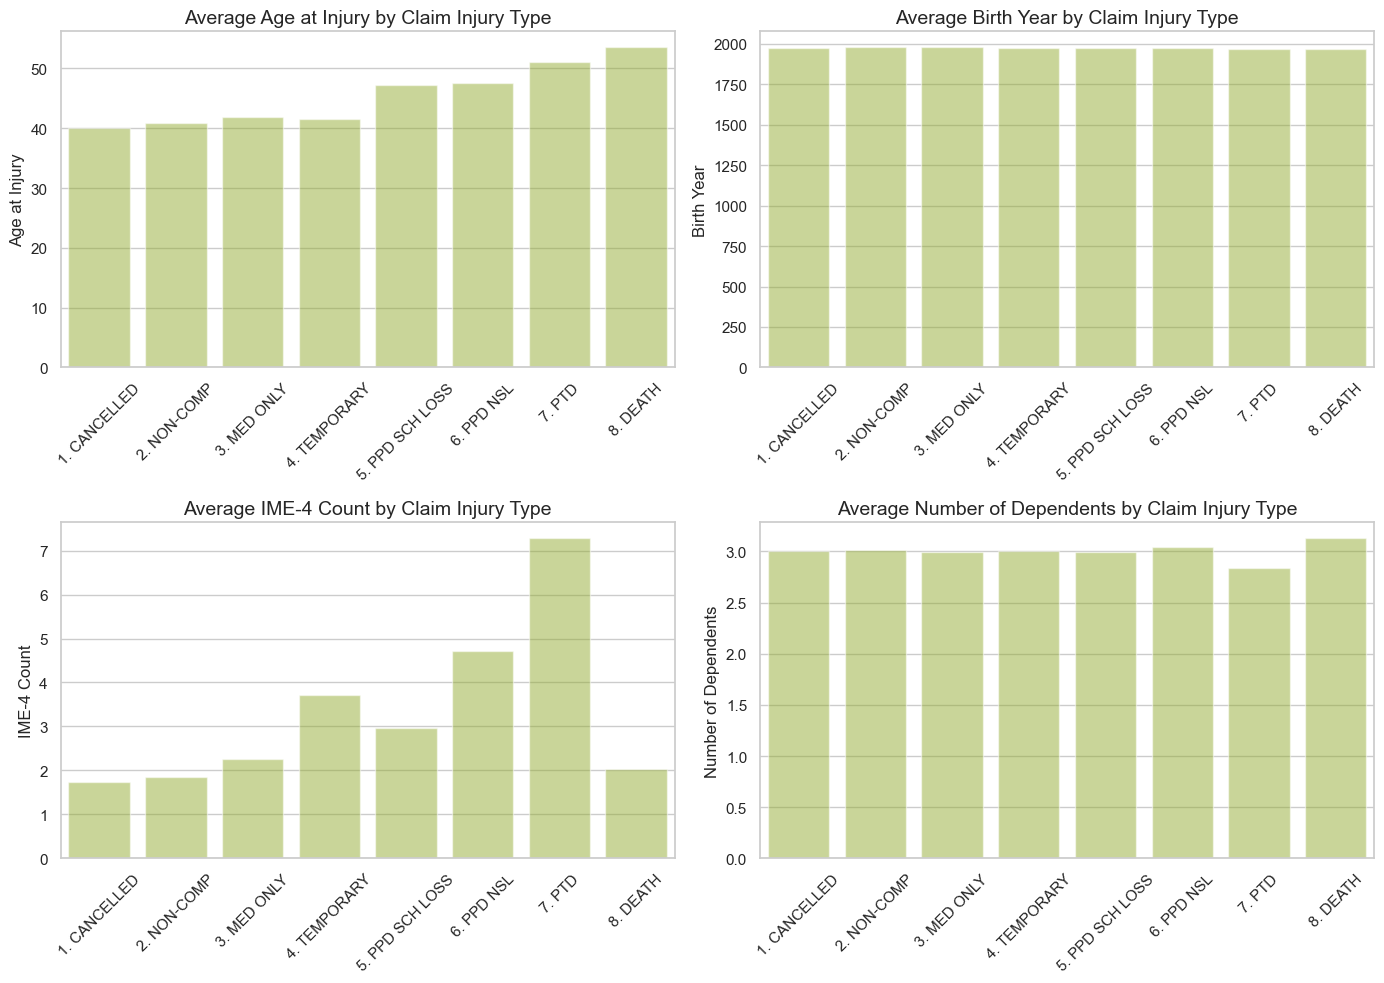

In [221]:
#Average of numerical variable in the each target variable possible outcome
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten for easier indexing

# Plot each feature
for i, col in enumerate(discrete_columns):
    avg_values = train_EDA.groupby('Claim Injury Type')[col].mean().reset_index()

    sns.barplot(data=avg_values, x='Claim Injury Type', y=col, color=pal_novaims[0], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Average {col} by Claim Injury Type')
    axes[i].set_xlabel('')  # Remove x-axis label for clarity
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

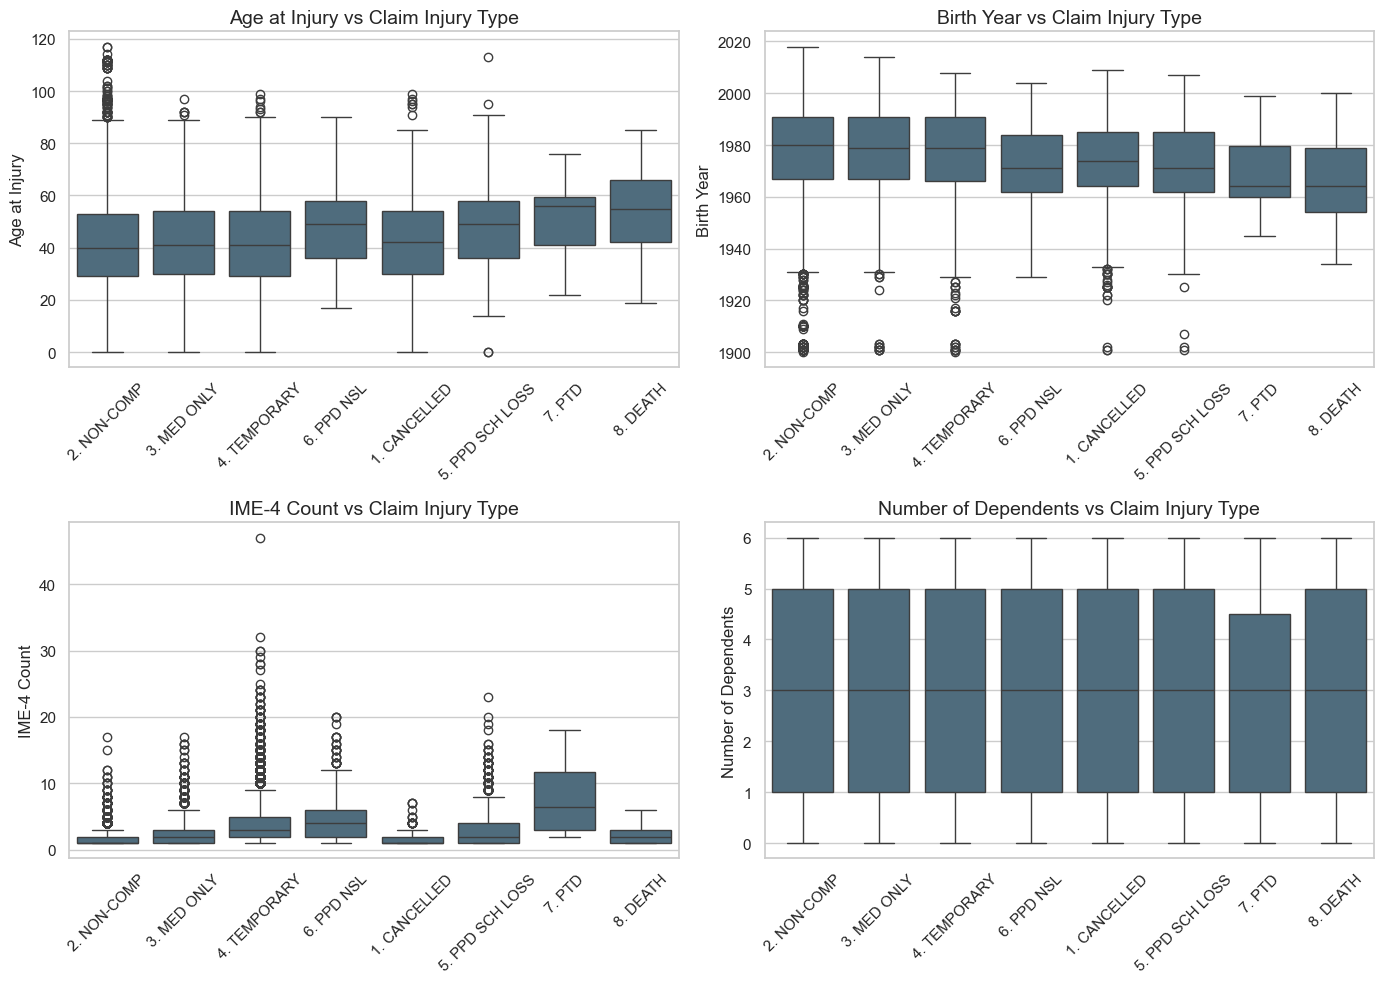

In [222]:
## Boxplots of the numerical variables in each possible target outcome
# Define rows and columns for the grid
num_plots = len(discrete_columns)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10))
axes = axes.flatten()  # Flatten the axes for easier indexing

# Generate boxplots
for i, col in enumerate(discrete_columns):
    sns.boxplot(data=train_EDA, x='Claim Injury Type', y=col, ax=axes[i], color=pastel_color)
    axes[i].set_title(f'{col} vs Claim Injury Type')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')  # Remove x-axis label for clarity

# Hide extra subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [223]:
summary_list = []

# Iterate over each unique value in 'Claim Injury Type'
unique_claim_types = train_EDA['Claim Injury Type'].unique()
for claim_type in unique_claim_types:
    filtered_df = train_EDA[train_EDA['Claim Injury Type'] == claim_type]
    description = filtered_df.describe().transpose()
    description['Claim Injury Type'] = claim_type
    description['missing'] = filtered_df.isnull().sum()
    summary_list.append(description)

combined_summary_df = pd.concat(summary_list)
combined_summary_df.reset_index(inplace=True)
combined_summary_df = combined_summary_df[['Claim Injury Type', 'index', 'count', 'missing', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
combined_summary_df.rename(columns={'index': 'Variable'}, inplace=True)
combined_summary_df.sort_values(by='Variable', inplace=True)

# Loop through each numeric variable and display its summary
for variable in (train_EDA.select_dtypes(include='number').columns):
    display_df = combined_summary_df[combined_summary_df['Variable'] == variable]
    print(f"Descriptive statistics for {variable}:\n")
    display(display_df)

Descriptive statistics for Age at Injury:



Claim Injury Type       Variable     count  missing       mean        std  \
34        6. PPD NSL  Age at Injury     983.0        0  47.637843  13.608846   
23      4. TEMPORARY  Age at Injury   50946.0        0  41.628136  14.820357   
1        2. NON-COMP  Age at Injury  249263.0        0  40.832169  14.409923   
78          8. DEATH  Age at Injury     141.0        0  53.531915  16.605315   
45      1. CANCELLED  Age at Injury   10057.0        0    39.9825  18.087515   
67            7. PTD  Age at Injury      19.0        0  51.052632  14.443275   
56   5. PPD SCH LOSS  Age at Injury    6805.0        0  47.211609  14.375871   
12       3. MED ONLY  Age at Injury   45465.0        0  41.820389  14.273214   

     min   25%   50%   75%    max  
34  17.0  36.0  49.0  58.0   90.0  
23   0.0  29.0  41.0  54.0   99.0  
1    0.0  29.0  40.0  53.0  117.0  
78  19.0  42.0  55.0  66.0   85.0  
45   0.0  30.0  42.0  54.0   99.0  
67  22.0  41.0  56.0  59.5   76.0  
56   0.0  36.0  49.0  58.0  113.0  
12   0.0  30.0  41.0  54.0   97.0

Descriptive statistics for Average Weekly Wage:



Claim Injury Type             Variable     count  missing        mean  \
35        6. PPD NSL  Average Weekly Wage     983.0        0  553.844191   
68            7. PTD  Average Weekly Wage      19.0        0  586.504737   
46      1. CANCELLED  Average Weekly Wage   10057.0        0    2.301988   
57   5. PPD SCH LOSS  Average Weekly Wage    6805.0        0  563.701414   
79          8. DEATH  Average Weekly Wage     141.0        0  271.738652   
2        2. NON-COMP  Average Weekly Wage  249263.0        0    0.659402   
24      4. TEMPORARY  Average Weekly Wage   50946.0        0  471.186266   
13       3. MED ONLY  Average Weekly Wage   45465.0        0  101.314562   

           std    min       25%     50%       75%     max  
35  187.689272    0.0    437.47  599.79   705.325  799.52  
68  147.020591  250.0   493.545   600.0   713.975  798.55  
46   37.401331    0.0       0.0     0.0       0.0  793.42  
57  170.436018    0.0    448.98   600.0    702.99  799.98  
79  310.253907    0.0       0.0     0.0     600.0  799.34  
2    19.815799    0.0       0.0     0.0       0.0  798.09  
24  247.415134    0.0  312.1975  539.05  671.7475  799.98  
13  218.262735    0.0       0.0     0.0       0.0  799.81

Descriptive statistics for Birth Year:



Claim Injury Type    Variable     count  missing         mean        std  \
69            7. PTD  Birth Year      19.0        0  1968.789474  14.782042   
25      4. TEMPORARY  Birth Year   50946.0        0  1977.994465  14.866293   
58   5. PPD SCH LOSS  Birth Year    6805.0        0   1972.91036  14.422385   
3        2. NON-COMP  Birth Year  249263.0        0  1979.233825  14.186036   
36        6. PPD NSL  Birth Year     983.0        0  1972.361139  13.611379   
14       3. MED ONLY  Birth Year   45465.0        0  1978.610008  14.263195   
47      1. CANCELLED  Birth Year   10057.0        0   1974.50532   13.59712   
80          8. DEATH  Birth Year     141.0        0   1966.35461  16.566375   

       min     25%     50%     75%     max  
69  1945.0  1960.0  1964.0  1979.5  1999.0  
25  1900.0  1966.0  1979.0  1991.0  2008.0  
58  1901.0  1962.0  1971.0  1985.0  2007.0  
3   1900.0  1967.0  1980.0  1991.0  2018.0  
36  1929.0  1962.0  1971.0  1984.0  2004.0  
14  1901.0  1967.0  1979.0  1991.0  2014.0  
47  1901.0  1964.0  1974.0  1985.0  2009.0  
80  1934.0  1954.0  1964.0  1979.0  2000.0

Descriptive statistics for IME-4 Count:



Claim Injury Type     Variable    count  missing      mean       std  min  \
59   5. PPD SCH LOSS  IME-4 Count   4982.0     1823  2.974508  2.176131  1.0   
4        2. NON-COMP  IME-4 Count   4603.0   244660  1.851836  1.296449  1.0   
48      1. CANCELLED  IME-4 Count    299.0     9758   1.73913  1.061296  1.0   
81          8. DEATH  IME-4 Count     24.0      117  2.041667  1.301476  1.0   
26      4. TEMPORARY  IME-4 Count  22611.0    28335  3.710495  3.016957  1.0   
37        6. PPD NSL  IME-4 Count    939.0       44  4.705005  3.154056  1.0   
15       3. MED ONLY  IME-4 Count   6893.0    38572  2.267518  1.708464  1.0   
70            7. PTD  IME-4 Count     18.0        1  7.277778  4.836206  2.0   

    25%  50%    75%   max  
59  1.0  2.0    4.0  23.0  
4   1.0  1.0    2.0  17.0  
48  1.0  1.0    2.0   7.0  
81  1.0  2.0    3.0   6.0  
26  2.0  3.0    5.0  47.0  
37  2.0  4.0    6.0  20.0  
15  1.0  2.0    3.0  17.0  
70  3.0  6.5  11.75  18.0

Descriptive statistics for Industry Code:



Claim Injury Type       Variable     count  missing       mean        std  \
82          8. DEATH  Industry Code     140.0        1  53.635714  23.205436   
5        2. NON-COMP  Industry Code  244487.0     4776  58.554054   18.21339   
38        6. PPD NSL  Industry Code     982.0        1  56.341141  15.530927   
49      1. CANCELLED  Industry Code    7280.0     2777  53.425549  21.694363   
60   5. PPD SCH LOSS  Industry Code    6804.0        1  55.294533  16.936791   
16       3. MED ONLY  Industry Code   45372.0       93  58.478467  19.306732   
27      4. TEMPORARY  Industry Code   50835.0      111  53.741753  16.459144   
71            7. PTD  Industry Code      19.0        0  47.947368  15.345914   

     min    25%   50%   75%   max  
82  11.0  39.75  56.0  62.0  92.0  
5   11.0   45.0  61.0  62.0  92.0  
38  11.0   48.0  61.0  62.0  92.0  
49  11.0   33.0  52.0  62.0  92.0  
60  11.0   44.0  54.0  62.0  92.0  
16  11.0   45.0  61.0  71.0  92.0  
27  11.0   44.0  53.0  62.0  92.0  
71  23.0   32.0  48.0  62.0  72.0

Descriptive statistics for WCIO Cause of Injury Code:



Claim Injury Type                   Variable     count  missing       mean  \
61   5. PPD SCH LOSS  WCIO Cause of Injury Code    6801.0        4  48.840759   
83          8. DEATH  WCIO Cause of Injury Code     138.0        3  64.811594   
6        2. NON-COMP  WCIO Cause of Injury Code  242764.0     6499  54.950289   
50      1. CANCELLED  WCIO Cause of Injury Code    4537.0     5520  65.904562   
39        6. PPD NSL  WCIO Cause of Injury Code     982.0        1  50.668024   
17       3. MED ONLY  WCIO Cause of Injury Code   45376.0       89  52.258352   
28      4. TEMPORARY  WCIO Cause of Injury Code   50785.0      161   50.99551   
72            7. PTD  WCIO Cause of Injury Code      19.0        0  54.842105   

          std   min   25%   50%    75%   max  
61  23.966492   1.0  29.0  45.0   60.0  99.0  
83  28.728925   3.0  45.0  81.0   83.0  99.0  
6   27.339012   1.0  29.0  57.0   79.0  99.0  
50  27.277235   1.0  50.0  60.0   97.0  99.0  
39  19.777039   2.0  31.0  53.0  58.75  99.0  
17  24.734981   1.0  31.0  56.0   74.0  99.0  
28  23.885317   1.0  31.0  55.0   70.0  99.0  
72   27.21777  25.0  28.5  56.0   77.5  99.0

Descriptive statistics for WCIO Nature of Injury Code:



Claim Injury Type                    Variable     count  missing  \
84          8. DEATH  WCIO Nature of Injury Code     138.0        3   
7        2. NON-COMP  WCIO Nature of Injury Code  242755.0     6508   
18       3. MED ONLY  WCIO Nature of Injury Code   45375.0       90   
73            7. PTD  WCIO Nature of Injury Code      19.0        0   
29      4. TEMPORARY  WCIO Nature of Injury Code   50788.0      158   
40        6. PPD NSL  WCIO Nature of Injury Code     982.0        1   
62   5. PPD SCH LOSS  WCIO Nature of Injury Code    6801.0        4   
51      1. CANCELLED  WCIO Nature of Injury Code    4530.0     5527   

         mean        std  min   25%   50%   75%   max  
84  59.630435  28.569821  1.0  41.0  59.0  83.0  91.0  
7   40.462713  22.898215  1.0  10.0  43.0  52.0  91.0  
18  39.988474  21.312667  1.0  13.0  49.0  52.0  91.0  
73  46.421053  26.279091  7.0  28.0  49.0  60.5  90.0  
29  41.435595  20.505231  1.0  28.0  49.0  52.0  91.0  
40  44.807536   19.20379  1.0  40.0  52.0  52.0  90.0  
62  41.103367  19.200491  1.0  28.0  49.0  52.0  91.0  
51  48.390728  23.913541  1.0  37.0  52.0  59.0  91.0

Descriptive statistics for WCIO Part Of Body Code:



Claim Injury Type                Variable     count  missing       mean  \
19       3. MED ONLY  WCIO Part Of Body Code   45256.0      209  37.473374   
30      4. TEMPORARY  WCIO Part Of Body Code   50590.0      356  40.190789   
8        2. NON-COMP  WCIO Part Of Body Code  242403.0     6860  40.269493   
41        6. PPD NSL  WCIO Part Of Body Code     964.0       19  42.545643   
63   5. PPD SCH LOSS  WCIO Part Of Body Code    6772.0       33  42.503249   
85          8. DEATH  WCIO Part Of Body Code     140.0        1  56.214286   
74            7. PTD  WCIO Part Of Body Code      19.0        0  36.052632   
52      1. CANCELLED  WCIO Part Of Body Code    4702.0     5355  40.609953   

          std   min   25%   50%   75%   max  
19  22.999122  -9.0  31.0  38.0  53.0  99.0  
30  22.574434  -9.0  34.0  42.0  53.0  99.0  
8   22.080188  -9.0  33.0  38.0  53.0  99.0  
41  24.047569  -9.0  33.0  42.0  51.0  91.0  
63  19.875402  -9.0  34.0  38.0  53.0  99.0  
85  29.140638  -9.0  44.0  60.0  90.0  99.0  
74  19.873136  10.0  18.0  38.0  53.0  66.0  
52  25.159515  -9.0  32.0  41.0  53.0  99.0

Descriptive statistics for Agreement Reached:



Claim Injury Type           Variable     count  missing      mean  \
64   5. PPD SCH LOSS  Agreement Reached    6805.0        0   0.01205   
53      1. CANCELLED  Agreement Reached   10057.0        0  0.000199   
42        6. PPD NSL  Agreement Reached     983.0        0  0.132248   
20       3. MED ONLY  Agreement Reached   45465.0        0       0.0   
75            7. PTD  Agreement Reached      19.0        0  0.263158   
9        2. NON-COMP  Agreement Reached  249263.0        0       0.0   
86          8. DEATH  Agreement Reached     141.0        0  0.078014   
31      4. TEMPORARY  Agreement Reached   50946.0        0   0.28065   

         std  min  25%  50%  75%  max  
64  0.109117  0.0  0.0  0.0  0.0  1.0  
53  0.014101  0.0  0.0  0.0  0.0  1.0  
42  0.338933  0.0  0.0  0.0  0.0  1.0  
20       0.0  0.0  0.0  0.0  0.0  0.0  
75  0.452414  0.0  0.0  0.0  0.5  1.0  
9        0.0  0.0  0.0  0.0  0.0  0.0  
86   0.26915  0.0  0.0  0.0  0.0  1.0  
31  0.449321  0.0  0.0  0.0  1.0  1.0

Descriptive statistics for Number of Dependents:



Claim Injury Type              Variable     count  missing      mean  \
65   5. PPD SCH LOSS  Number of Dependents    6805.0        0  2.994269   
76            7. PTD  Number of Dependents      19.0        0  2.842105   
43        6. PPD NSL  Number of Dependents     983.0        0  3.039674   
87          8. DEATH  Number of Dependents     141.0        0   3.12766   
10       2. NON-COMP  Number of Dependents  249263.0        0  3.012738   
32      4. TEMPORARY  Number of Dependents   50946.0        0  3.008774   
54      1. CANCELLED  Number of Dependents   10057.0        0  2.999901   
21       3. MED ONLY  Number of Dependents   45465.0        0  2.992676   

         std  min  25%  50%  75%  max  
65  1.998338  0.0  1.0  3.0  5.0  6.0  
76  2.061907  0.0  1.0  3.0  4.5  6.0  
43  1.987602  0.0  1.0  3.0  5.0  6.0  
87  2.090287  0.0  1.0  3.0  5.0  6.0  
10  2.002334  0.0  1.0  3.0  5.0  6.0  
32   1.99869  0.0  1.0  3.0  5.0  6.0  
54  1.996093  0.0  1.0  3.0  5.0  6.0  
21  2.001751  0.0  1.0  3.0  5.0  6.0

- `Age at Injury`: biggest mean for 8. DEATH & 7. PTD.
- `Average Weekly Wage`: lowest salaries for 2. NON-COMP and 1. CANCELLED - indicating that is a good varible to predict the outcome
- `Birth Year`: the 0 values make it difficult to compare but we have the Age analysis
- `IME-4 Count`: biggest mean of Number of IME-4 forms received per claim for 7. PTD, the lowest mean are for 2. NON-COMP and 1. CANCELLED, so again a good varible for prediction
- `Agreement Reached`: 2. NON-COMP and 3. MED ONLY do not have agreement reached = 1.
- `Number of Dependents`: Biggest mean for 8. DEATH, but theres not a lot of variance in this column.

#### Categorical Variables

In [226]:
summary_list_categorical = []

# Iterate over each unique value in 'Claim Injury Type' - categoricalcolumns
unique_claim_types = train_EDA['Claim Injury Type'].unique()
for claim_type in unique_claim_types:
    filtered_df = train_EDA[train_EDA['Claim Injury Type'] == claim_type]
    description_categorical = filtered_df.describe(include=['O']).transpose()
    description_categorical['missing'] = filtered_df.isnull().sum()
    description_categorical['Claim Injury Type'] = claim_type
    summary_list_categorical.append(description_categorical)

combined_summary_df_categorical = pd.concat(summary_list_categorical)
combined_summary_df_categorical.reset_index(inplace=True)
combined_summary_df_categorical = combined_summary_df_categorical[['Claim Injury Type', 'index', 'count', 'missing', 'unique', 'top', 'freq']]
combined_summary_df_categorical.rename(columns={'index': 'Variable'}, inplace=True)
combined_summary_df_categorical.sort_values(by='Variable', inplace=True)

# Loop through each categorical variable and display its summary
for variable in train_EDA.select_dtypes(include='object').columns:
    display_df = combined_summary_df_categorical[combined_summary_df_categorical['Variable'] == variable]
    print(f"Descriptive statistics for {variable}:\n")
    display(display_df)

Descriptive statistics for Alternative Dispute Resolution:



Claim Injury Type                        Variable   count  missing unique  \
0         2. NON-COMP  Alternative Dispute Resolution  249263        0      3   
100   5. PPD SCH LOSS  Alternative Dispute Resolution    6805        0      1   
80       1. CANCELLED  Alternative Dispute Resolution   10057        0      2   
140          8. DEATH  Alternative Dispute Resolution     141        0      1   
40       4. TEMPORARY  Alternative Dispute Resolution   50946        0      1   
20        3. MED ONLY  Alternative Dispute Resolution   45465        0      1   
60         6. PPD NSL  Alternative Dispute Resolution     983        0      1   
120            7. PTD  Alternative Dispute Resolution      19        0      1   

    top    freq  
0     N  247100  
100   N    6805  
80    N   10043  
140   N     141  
40    N   50946  
20    N   45465  
60    N     983  
120   N      19

Descriptive statistics for Assembly Date:



Claim Injury Type       Variable   count  missing unique         top freq
141          8. DEATH  Assembly Date     141        0    125  2021-08-02    3
21        3. MED ONLY  Assembly Date   45465        0    840  2020-03-06  113
121            7. PTD  Assembly Date      19        0     19  2020-01-09    1
61         6. PPD NSL  Assembly Date     983        0    498  2020-10-07    7
81       1. CANCELLED  Assembly Date   10057        0    809  2021-05-11   33
41       4. TEMPORARY  Assembly Date   50946        0    839  2020-03-06  142
101   5. PPD SCH LOSS  Assembly Date    6805        0    794  2020-02-28   31
1         2. NON-COMP  Assembly Date  249263        0    883  2021-05-11  722

Descriptive statistics for Attorney/Representative:



Claim Injury Type                 Variable   count  missing unique top  \
82       1. CANCELLED  Attorney/Representative   10057        0      2   N   
2         2. NON-COMP  Attorney/Representative  249263        0      2   N   
42       4. TEMPORARY  Attorney/Representative   50946        0      2   Y   
102   5. PPD SCH LOSS  Attorney/Representative    6805        0      2   Y   
22        3. MED ONLY  Attorney/Representative   45465        0      2   N   
122            7. PTD  Attorney/Representative      19        0      2   Y   
142          8. DEATH  Attorney/Representative     141        0      2   Y   
62         6. PPD NSL  Attorney/Representative     983        0      2   Y   

       freq  
82     5806  
2    231335  
42    27983  
102    5787  
22    34052  
122      18  
142     122  
62      949

Descriptive statistics for C-2 Date:



Claim Injury Type  Variable   count  missing unique         top freq
83       1. CANCELLED  C-2 Date    4757     5300    946  2021-05-11   25
103   5. PPD SCH LOSS  C-2 Date    6803        2    906  2020-03-05   31
123            7. PTD  C-2 Date      19        0     19  2020-01-09    1
3         2. NON-COMP  C-2 Date  243288     5975   1555  2021-05-11  784
143          8. DEATH  C-2 Date     141        0    128  2022-04-29    3
43       4. TEMPORARY  C-2 Date   50831      115   1622  2020-03-05  125
63         6. PPD NSL  C-2 Date     983        0    511  2020-02-05    7
23        3. MED ONLY  C-2 Date   45396       69   1235  2021-05-11  136

Descriptive statistics for C-3 Date:



Claim Injury Type  Variable  count  missing unique         top freq
4         2. NON-COMP  C-3 Date  32427   216836   1463  2020-05-18   76
64         6. PPD NSL  C-3 Date    751      232    458  2020-02-18    7
124            7. PTD  C-3 Date     13        6     13  2020-01-26    1
44       4. TEMPORARY  C-3 Date  25268    25678   1302  2021-09-30   54
24        3. MED ONLY  C-3 Date  13415    32050   1275  2020-04-03   35
144          8. DEATH  C-3 Date     18      123     18  2020-03-10    1
84       1. CANCELLED  C-3 Date   4732     5325    885  2022-07-08   17
104   5. PPD SCH LOSS  C-3 Date   4561     2244    891  2020-09-21   17

Descriptive statistics for Carrier Name:



Claim Injury Type      Variable   count  missing unique  \
105   5. PPD SCH LOSS  Carrier Name    6805        0    649   
125            7. PTD  Carrier Name      19        0     11   
5         2. NON-COMP  Carrier Name  249263        0   1837   
45       4. TEMPORARY  Carrier Name   50946        0   1196   
145          8. DEATH  Carrier Name     141        0     68   
85       1. CANCELLED  Carrier Name   10057        0    709   
65         6. PPD NSL  Carrier Name     983        0    219   
25        3. MED ONLY  Carrier Name   45465        0   1385   

                      top   freq  
105  STATE INSURANCE FUND   1212  
125  STATE INSURANCE FUND      8  
5    STATE INSURANCE FUND  37358  
45   STATE INSURANCE FUND  10535  
145  STATE INSURANCE FUND     48  
85   STATE INSURANCE FUND   2072  
65   STATE INSURANCE FUND    219  
25   STATE INSURANCE FUND  10080

Descriptive statistics for Carrier Type:



Claim Injury Type      Variable   count  missing unique      top    freq
6         2. NON-COMP  Carrier Type  249263        0      6  Private  132965
126            7. PTD  Carrier Type      19        0      4  Private       9
106   5. PPD SCH LOSS  Carrier Type    6805        0      5  Private    3718
46       4. TEMPORARY  Carrier Type   50946        0      7  Private   29442
146          8. DEATH  Carrier Type     141        0      5  Private      55
86       1. CANCELLED  Carrier Type   10057        0      7  Private    5155
26        3. MED ONLY  Carrier Type   45465        0      7  Private   21549
66         6. PPD NSL  Carrier Type     983        0      5  Private     461

Descriptive statistics for Claim Injury Type:



Claim Injury Type           Variable   count  missing unique  \
127            7. PTD  Claim Injury Type      19        0      1   
107   5. PPD SCH LOSS  Claim Injury Type    6805        0      1   
87       1. CANCELLED  Claim Injury Type   10057        0      1   
7         2. NON-COMP  Claim Injury Type  249263        0      1   
47       4. TEMPORARY  Claim Injury Type   50946        0      1   
147          8. DEATH  Claim Injury Type     141        0      1   
27        3. MED ONLY  Claim Injury Type   45465        0      1   
67         6. PPD NSL  Claim Injury Type     983        0      1   

                 top    freq  
127           7. PTD      19  
107  5. PPD SCH LOSS    6805  
87      1. CANCELLED   10057  
7        2. NON-COMP  249263  
47      4. TEMPORARY   50946  
147         8. DEATH     141  
27       3. MED ONLY   45465  
67        6. PPD NSL     983

Descriptive statistics for County of Injury:



Claim Injury Type          Variable   count  missing unique      top  \
88       1. CANCELLED  County of Injury   10057        0     63   QUEENS   
8         2. NON-COMP  County of Injury  249263        0     63  SUFFOLK   
148          8. DEATH  County of Injury     141        0     39  SUFFOLK   
28        3. MED ONLY  County of Injury   45465        0     63  SUFFOLK   
128            7. PTD  County of Injury      19        0     11    KINGS   
48       4. TEMPORARY  County of Injury   50946        0     63   QUEENS   
68         6. PPD NSL  County of Injury     983        0     59    KINGS   
108   5. PPD SCH LOSS  County of Injury    6805        0     63   QUEENS   

      freq  
88    1479  
8    23816  
148     17  
28    6567  
128      3  
48    5668  
68     139  
108    793

Descriptive statistics for COVID-19 Indicator:



Claim Injury Type            Variable   count  missing unique top    freq
89       1. CANCELLED  COVID-19 Indicator   10057        0      2   N    9724
129            7. PTD  COVID-19 Indicator      19        0      2   N      18
69         6. PPD NSL  COVID-19 Indicator     983        0      2   N     981
109   5. PPD SCH LOSS  COVID-19 Indicator    6805        0      2   N    6803
149          8. DEATH  COVID-19 Indicator     141        0      2   N      96
9         2. NON-COMP  COVID-19 Indicator  249263        0      2   N  233248
29        3. MED ONLY  COVID-19 Indicator   45465        0      2   N   44334
49       4. TEMPORARY  COVID-19 Indicator   50946        0      2   N   50036

Descriptive statistics for District Name:



Claim Injury Type       Variable   count  missing unique       top    freq
10        2. NON-COMP  District Name  249263        0      8       NYC  115987
30        3. MED ONLY  District Name   45465        0      8       NYC   17504
50       4. TEMPORARY  District Name   50946        0      8       NYC   22494
130            7. PTD  District Name      19        0      7  SYRACUSE       5
110   5. PPD SCH LOSS  District Name    6805        0      8       NYC    2905
150          8. DEATH  District Name     141        0      8       NYC      62
70         6. PPD NSL  District Name     983        0      8       NYC     468
90       1. CANCELLED  District Name   10057        0      8       NYC    5805

Descriptive statistics for First Hearing Date:



Claim Injury Type            Variable  count  missing unique         top  \
91       1. CANCELLED  First Hearing Date   1861     8196    750  2020-10-26   
111   5. PPD SCH LOSS  First Hearing Date   4785     2020    969  2021-10-19   
11        2. NON-COMP  First Hearing Date  12019   237244   1033  2020-09-18   
31        3. MED ONLY  First Hearing Date  11329    34136   1044  2022-06-08   
51       4. TEMPORARY  First Hearing Date  25059    25887   1074  2022-01-20   
151          8. DEATH  First Hearing Date    141        0    123  2022-04-18   
131            7. PTD  First Hearing Date     19        0     19  2021-08-12   
71         6. PPD NSL  First Hearing Date    977        6    576  2021-05-25   

    freq  
91     8  
111   18  
11    59  
31    36  
51    96  
151    3  
131    1  
71     8

Descriptive statistics for Gender:



Claim Injury Type Variable   count  missing unique top    freq
92       1. CANCELLED   Gender   10057        0      4   M    6525
32        3. MED ONLY   Gender   45465        0      4   M   25805
112   5. PPD SCH LOSS   Gender    6805        0      3   M    3598
52       4. TEMPORARY   Gender   50946        0      3   M   27965
12        2. NON-COMP   Gender  249263        0      4   M  135334
72         6. PPD NSL   Gender     983        0      3   M     496
132            7. PTD   Gender      19        0      2   M      12
152          8. DEATH   Gender     141        0      2   M     110

Descriptive statistics for Industry Code Description:



Claim Injury Type                   Variable   count  missing unique  \
133            7. PTD  Industry Code Description      19        0      8   
93       1. CANCELLED  Industry Code Description    7280     2777     20   
33        3. MED ONLY  Industry Code Description   45372       93     20   
113   5. PPD SCH LOSS  Industry Code Description    6804        1     20   
13        2. NON-COMP  Industry Code Description  244487     4776     20   
53       4. TEMPORARY  Industry Code Description   50835      111     20   
153          8. DEATH  Industry Code Description     140        1     17   
73         6. PPD NSL  Industry Code Description     982        1     17   

                                   top   freq  
133  HEALTH CARE AND SOCIAL ASSISTANCE      6  
93                        CONSTRUCTION   1123  
33   HEALTH CARE AND SOCIAL ASSISTANCE   8147  
113  HEALTH CARE AND SOCIAL ASSISTANCE   1156  
13   HEALTH CARE AND SOCIAL ASSISTANCE  53698  
53   HEALTH CARE AND SOCIAL ASSISTANCE   9607  
153  HEALTH CARE AND SOCIAL ASSISTANCE     25  
73   HEALTH CARE AND SOCIAL ASSISTANCE    240

Descriptive statistics for Medical Fee Region:



Claim Injury Type            Variable   count  missing unique top    freq
14        2. NON-COMP  Medical Fee Region  249263        0      5  IV  115172
154          8. DEATH  Medical Fee Region     141        0      5  IV      66
114   5. PPD SCH LOSS  Medical Fee Region    6805        0      5  IV    3173
94       1. CANCELLED  Medical Fee Region   10057        0      5  IV    5829
34        3. MED ONLY  Medical Fee Region   45465        0      5  IV   20125
74         6. PPD NSL  Medical Fee Region     983        0      5  IV     493
134            7. PTD  Medical Fee Region      19        0      4  II       7
54       4. TEMPORARY  Medical Fee Region   50946        0      5  IV   23884

Descriptive statistics for WCIO Cause of Injury Description:



Claim Injury Type                          Variable   count  missing  \
75         6. PPD NSL  WCIO Cause of Injury Description     982        1   
35        3. MED ONLY  WCIO Cause of Injury Description   45376       89   
95       1. CANCELLED  WCIO Cause of Injury Description    4537     5520   
55       4. TEMPORARY  WCIO Cause of Injury Description   50785      161   
135            7. PTD  WCIO Cause of Injury Description      19        0   
15        2. NON-COMP  WCIO Cause of Injury Description  242764     6499   
115   5. PPD SCH LOSS  WCIO Cause of Injury Description    6801        4   
155          8. DEATH  WCIO Cause of Injury Description     138        3   

    unique                                     top   freq  
75      47                                 LIFTING    162  
35      74                                 LIFTING   4050  
95      65              OTHER - MISCELLANEOUS, NOC    562  
55      74                                 LIFTING   5793  
135     11        FROM DIFFERENT LEVEL (ELEVATION)      4  
15      74  FELLOW WORKER, PATIENT OR OTHER PERSON  17576  
115     64                 FALL, SLIP OR TRIP, NOC    657  
155     34                                PANDEMIC     43

Descriptive statistics for WCIO Nature of Injury Description:



Claim Injury Type                           Variable   count  missing  \
36        3. MED ONLY  WCIO Nature of Injury Description   45375       90   
16        2. NON-COMP  WCIO Nature of Injury Description  242755     6508   
116   5. PPD SCH LOSS  WCIO Nature of Injury Description    6801        4   
56       4. TEMPORARY  WCIO Nature of Injury Description   50788      158   
136            7. PTD  WCIO Nature of Injury Description      19        0   
76         6. PPD NSL  WCIO Nature of Injury Description     982        1   
156          8. DEATH  WCIO Nature of Injury Description     138        3   
96       1. CANCELLED  WCIO Nature of Injury Description    4530     5527   

    unique             top   freq  
36      51  STRAIN OR TEAR  13279  
16      55  STRAIN OR TEAR  55847  
116     35  STRAIN OR TEAR   1829  
56      53  STRAIN OR TEAR  15315  
136     12        FRACTURE      4  
76      24  STRAIN OR TEAR    404  
156     25        COVID-19     41  
96      49  STRAIN OR TEAR   1252

Descriptive statistics for WCIO Part Of Body Description:



Claim Injury Type                       Variable   count  missing unique  \
137            7. PTD  WCIO Part Of Body Description      19        0     15   
57       4. TEMPORARY  WCIO Part Of Body Description   50590      356     53   
77         6. PPD NSL  WCIO Part Of Body Description     964       19     47   
157          8. DEATH  WCIO Part Of Body Description     140        1     22   
37        3. MED ONLY  WCIO Part Of Body Description   45256      209     54   
97       1. CANCELLED  WCIO Part Of Body Description    4702     5355     52   
117   5. PPD SCH LOSS  WCIO Part Of Body Description    6772       33     50   
17        2. NON-COMP  WCIO Part Of Body Description  242403     6860     54   

                      top   freq  
137  MULTIPLE HEAD INJURY      3  
57        LOWER BACK AREA   6619  
77        LOWER BACK AREA    292  
157                 LUNGS     33  
37        LOWER BACK AREA   4891  
97        LOWER BACK AREA    523  
117           SHOULDER(S)   1115  
17              FINGER(S)  20997

Descriptive statistics for Zip Code:



Claim Injury Type  Variable   count  missing unique    top  freq
98       1. CANCELLED  Zip Code    9574      483   1372  11368   165
38        3. MED ONLY  Zip Code   43131     2334   2266  11717   331
58       4. TEMPORARY  Zip Code   48338     2608   2219  11717   400
138            7. PTD  Zip Code      18        1     18  14217     1
78         6. PPD NSL  Zip Code     943       40    460  11226    12
158          8. DEATH  Zip Code     133        8    120  11226     2
18        2. NON-COMP  Zip Code  236955    12308   2890  11236  1301
118   5. PPD SCH LOSS  Zip Code    6483      322   1258  11717    52

Descriptive statistics for WCB Decision:



Claim Injury Type      Variable   count  missing unique               top  \
139            7. PTD  WCB Decision      19        0      1  Not Work Related   
79         6. PPD NSL  WCB Decision     983        0      1  Not Work Related   
59       4. TEMPORARY  WCB Decision   50946        0      1  Not Work Related   
19        2. NON-COMP  WCB Decision  249263        0      1  Not Work Related   
39        3. MED ONLY  WCB Decision   45465        0      1  Not Work Related   
119   5. PPD SCH LOSS  WCB Decision    6805        0      1  Not Work Related   
159          8. DEATH  WCB Decision     141        0      1  Not Work Related   
99       1. CANCELLED  WCB Decision   10057        0      1  Not Work Related   

       freq  
139      19  
79      983  
59    50946  
19   249263  
39    45465  
119    6805  
159     141  
99    10057

- `Alternative Dispute Resolution`- does not seem to vary a lot with the outcome so this lack of variance can make the variable irrelevant for prediction
- `Attorney/Representative` - seems relevant because the cases with 3. MED ONLY, 2. NON-COMP	and 1. CANCELLED have all the top as N (no representative), so the presence of a representative can be important to shape the outcome
- `Carrier Name`- for this variablle the top is usually STATE INSURANCE FUND, but it has a lot of different values so its possible not a good column to keep.
- `Carrier Type`- is also usually 1A. PRIVATE, but this varible has less dimensionality, and we can see that can be relevant for 5. PPD SCH LOSS, so keep this one instead of Carrier Name.
- `County of Injury	` - SUFFOLK	and QUEENS	appear as dominant, as we saw before this are areas close to each other in a area that can be like a harbor with heavier industries, but SUFFOLK is top for 3. MED ONLY	and 2. NON-COMP, and KINGS	for 6. PPD NSL	. maybe we can group this column into lesss categories
- `COVID-19 Indicator` - the lack of variance make this seems like a good fit for removal
- `District Name`- the lack of variance make this seems like a good fit for removal
- `Gender` its seems we have more mens in general so can be irrelevant
- `Medical Fee Region`- the lack of variance make this seems like a good fit for removal
- `WCIO Cause of Injury Description` - relevant things - 8. DEATH	has	PANDEMIC as the top cause, and 1. CANCELLED	has	OTHER - MISCELLANEOUS, NOC, this can also be grouped like lifting and PUSHING OR PULLING being part of heavy work.
- `WCIO Nature of Injury Description`- in here the majo is STRAIN OR TEAR
- `WCIO Part Of Body Description`- LOWER BACK AREA	 appear as top in many, FINGER(S)	in 2. NON-COMP	and LUNGS	in 8. DEATH, also has a lot of uique values so we can group as well.
- `Zip Code	` has to many differnt values so can be a candidate for exclusion in terms of location indicator.
- `WCB Decision	` is always Not Work Related
- For the dates and the codes, seems that the columns with more missing values have normally 2. NON-COMP and 1. CANCELLED	 so this too can be a decisive parameter (the lack of info):

In [228]:
# Function to verify the category distribution for a target variable
def check_category_distribution(df, col_name, mapping):
    categories = [item for sublist in mapping.values() for item in sublist]
    filtered_df = df[df[col_name].isin(categories)]
    print(f"\nDistribuição original da coluna '{col_name}':")
    print(filtered_df[col_name].value_counts())

train_with_y = train_EDA

# Columns to exclude
exclude_keywords = ["Date", "Code", 'Description']
exclude_columns = ["Accident Date", "Assembly Date", "District Name"]

# Initialize a dictionary to hold proportions for each column
proportion_by_column = {}

for column in train_with_y.columns:
    # Skip columns based on exclusion criteria
    if any(keyword in column for keyword in exclude_keywords) or column in exclude_columns:
        continue

    # Skip the target column itself to avoid circular calculations
    if column == 'Claim Injury Type':
        continue

    try:
        # Group by the column and the target variable
        counts = train_with_y.groupby([column, 'Claim Injury Type']).size()

        # Total counts for the current column (excluding NA values)
        total_counts = train_with_y[column].value_counts()

        # Calculate proportions while ensuring alignment of indexes
        proportions = (
            counts.div(total_counts, level=0)  # Use level=0 to align on the column index
                 .unstack(fill_value=0)  # Convert to DataFrame with columns as 'Claim Injury Type'
        )

        # Store proportions as percentages
        proportion_by_column[column] = proportions * 100

    except Exception as e:
        print(f"Error processing column '{column}': {e}")

# Display the proportions for each column, sorted by '7. PTD' and '8. DEATH'
for col, proportions in proportion_by_column.items():
    print(f"\nProporções na coluna '{col}':")
    
    try:
        # Sort by '7. PTD' and '8. DEATH' in descending order
        sorted_proportions = proportions.sort_values(by=['4. TEMPORARY', '8. DEATH'], ascending=[False, False])
    except KeyError:
        # If the target categories are not present in this column, use default ordering
        sorted_proportions = proportions
    
    display(sorted_proportions)  # Nicely formatted display (e.g., in Jupyter)


Proporções na coluna 'Age at Injury':


Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Age at Injury                                                             
93.0                   0.000000    50.000000     0.000000     50.000000   
99.0                  33.333333    33.333333     0.000000     33.333333   
82.0                   2.222222    46.666667    14.444444     30.000000   
76.0                   0.615385    52.307692    12.000000     28.307692   
87.0                   0.000000    45.454545    18.181818     27.272727   
...                         ...          ...          ...           ...   
111.0                  0.000000   100.000000     0.000000      0.000000   
112.0                  0.000000   100.000000     0.000000      0.000000   
113.0                  0.000000     0.000000     0.000000      0.000000   
114.0                  0.000000   100.000000     0.000000      0.000000   
117.0                  0.000000   100.000000     0.000000      0.000000   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
Age at Injury                                                       
93.0                      0.000000    0.000000  0.000000  0.000000  
99.0                      0.000000    0.000000  0.000000  0.000000  
82.0                      4.444444    1.111111  0.000000  1.111111  
76.0                      4.000000    1.538462  0.307692  0.923077  
87.0                      4.545455    4.545455  0.000000  0.000000  
...                            ...         ...       ...       ...  
111.0                     0.000000    0.000000  0.000000  0.000000  
112.0                     0.000000    0.000000  0.000000  0.000000  
113.0                   100.000000    0.000000  0.000000  0.000000  
114.0                     0.000000    0.000000  0.000000  0.000000  
117.0                     0.000000    0.000000  0.000000  0.000000  

[107 rows x 8 columns]


Proporções na coluna 'Alternative Dispute Resolution':


Claim Injury Type               1. CANCELLED  2. NON-COMP  3. MED ONLY  \
Alternative Dispute Resolution                                           
N                                   2.778131    68.353702    12.576694   
U                                   0.000000   100.000000     0.000000   
Y                                   0.644271    99.355729     0.000000   

Claim Injury Type               4. TEMPORARY  5. PPD SCH LOSS  6. PPD NSL  \
Alternative Dispute Resolution                                              
N                                  14.092868         1.882424    0.271921   
U                                   0.000000         0.000000    0.000000   
Y                                   0.000000         0.000000    0.000000   

Claim Injury Type                 7. PTD  8. DEATH  
Alternative Dispute Resolution                      
N                               0.005256  0.039004  
U                               0.000000  0.000000  
Y                               0.000000  0.000000


Proporções na coluna 'Attorney/Representative':


Claim Injury Type        1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Attorney/Representative                                                         
Y                            6.210282    26.190998    16.673241     40.880338   
N                            1.966616    78.358083    11.534136      7.778056   

Claim Injury Type        5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
Attorney/Representative                                                   
Y                               8.454223    1.386393  0.026296  0.178230  
N                               0.344818    0.011517  0.000339  0.006436


Proporções na coluna 'Average Weekly Wage':


Claim Injury Type    1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Average Weekly Wage                                                         
23.27                         0.0          0.0          0.0         100.0   
30.88                         0.0          0.0          0.0         100.0   
34.23                         0.0          0.0          0.0         100.0   
35.00                         0.0          0.0          0.0         100.0   
36.86                         0.0          0.0          0.0         100.0   
...                           ...          ...          ...           ...   
799.23                        0.0          0.0          0.0           0.0   
799.24                        0.0          0.0          0.0           0.0   
799.49                        0.0          0.0          0.0           0.0   
799.57                        0.0          0.0          0.0           0.0   
799.64                        0.0          0.0        100.0           0.0   

Claim Injury Type    5. PPD SCH LOSS  6. PPD NSL  7. PTD  8. DEATH  
Average Weekly Wage                                                 
23.27                            0.0         0.0     0.0       0.0  
30.88                            0.0         0.0     0.0       0.0  
34.23                            0.0         0.0     0.0       0.0  
35.00                            0.0         0.0     0.0       0.0  
36.86                            0.0         0.0     0.0       0.0  
...                              ...         ...     ...       ...  
799.23                         100.0         0.0     0.0       0.0  
799.24                         100.0         0.0     0.0       0.0  
799.49                         100.0         0.0     0.0       0.0  
799.57                         100.0         0.0     0.0       0.0  
799.64                           0.0         0.0     0.0       0.0  

[30381 rows x 8 columns]


Proporções na coluna 'Birth Year':


Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Birth Year                                                                
1921.0                 0.000000     0.000000          0.0    100.000000   
1916.0                 0.000000    16.666667          0.0     83.333333   
1927.0                33.333333     0.000000          0.0     66.666667   
1900.0                 0.000000    50.000000          0.0     50.000000   
1917.0                 0.000000    50.000000          0.0     50.000000   
...                         ...          ...          ...           ...   
2011.0                 0.000000   100.000000          0.0      0.000000   
2012.0                 0.000000   100.000000          0.0      0.000000   
2013.0                 0.000000   100.000000          0.0      0.000000   
2014.0                 0.000000    50.000000         50.0      0.000000   
2018.0                 0.000000   100.000000          0.0      0.000000   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL  7. PTD  8. DEATH  
Birth Year                                                        
1921.0                         0.0         0.0     0.0       0.0  
1916.0                         0.0         0.0     0.0       0.0  
1927.0                         0.0         0.0     0.0       0.0  
1900.0                         0.0         0.0     0.0       0.0  
1917.0                         0.0         0.0     0.0       0.0  
...                            ...         ...     ...       ...  
2011.0                         0.0         0.0     0.0       0.0  
2012.0                         0.0         0.0     0.0       0.0  
2013.0                         0.0         0.0     0.0       0.0  
2014.0                         0.0         0.0     0.0       0.0  
2018.0                         0.0         0.0     0.0       0.0  

[106 rows x 8 columns]


Proporções na coluna 'Carrier Name':


Claim Injury Type             1. CANCELLED  2. NON-COMP  3. MED ONLY  \
Carrier Name                                                           
ADIRONDACK CSD                    0.000000     0.000000     0.000000   
ALLIED EASTERN INDEMNITY CO       0.000000     0.000000     0.000000   
BELLEVILLE HENDERSON CENTRAL      0.000000     0.000000     0.000000   
BRADFORD CENTRAL SCHOOL DIST      0.000000     0.000000     0.000000   
CHEEKTOWAGA-SLOAN UNION FREE      0.000000     0.000000     0.000000   
...                                    ...          ...          ...   
YATES COUNTY MUTUAL SELF INS      0.000000     0.000000   100.000000   
YATES COUNTY WORKERS COMP         0.000000    87.500000    12.500000   
YESHIVA UNIVERSITY                6.666667    80.000000    13.333333   
YORK CENTRAL SCHOOL DISTRICT      0.000000    66.666667     0.000000   
YORKTOWN CENTRAL SCHOOL DIST      0.000000   100.000000     0.000000   

Claim Injury Type             4. TEMPORARY  5. PPD SCH LOSS  6. PPD NSL  \
Carrier Name                                                              
ADIRONDACK CSD                       100.0         0.000000         0.0   
ALLIED EASTERN INDEMNITY CO          100.0         0.000000         0.0   
BELLEVILLE HENDERSON CENTRAL         100.0         0.000000         0.0   
BRADFORD CENTRAL SCHOOL DIST         100.0         0.000000         0.0   
CHEEKTOWAGA-SLOAN UNION FREE         100.0         0.000000         0.0   
...                                    ...              ...         ...   
YATES COUNTY MUTUAL SELF INS           0.0         0.000000         0.0   
YATES COUNTY WORKERS COMP              0.0         0.000000         0.0   
YESHIVA UNIVERSITY                     0.0         0.000000         0.0   
YORK CENTRAL SCHOOL DISTRICT           0.0        33.333333         0.0   
YORKTOWN CENTRAL SCHOOL DIST           0.0         0.000000         0.0   

Claim Injury Type             7. PTD  8. DEATH  
Carrier Name                                    
ADIRONDACK CSD                   0.0       0.0  
ALLIED EASTERN INDEMNITY CO      0.0       0.0  
BELLEVILLE HENDERSON CENTRAL     0.0       0.0  
BRADFORD CENTRAL SCHOOL DIST     0.0       0.0  
CHEEKTOWAGA-SLOAN UNION FREE     0.0       0.0  
...                              ...       ...  
YATES COUNTY MUTUAL SELF INS     0.0       0.0  
YATES COUNTY WORKERS COMP        0.0       0.0  
YESHIVA UNIVERSITY               0.0       0.0  
YORK CENTRAL SCHOOL DISTRICT     0.0       0.0  
YORKTOWN CENTRAL SCHOOL DIST     0.0       0.0  

[1971 rows x 8 columns]


Proporções na coluna 'Carrier Type':


Claim Injury Type         1. CANCELLED  2. NON-COMP  3. MED ONLY  \
Carrier Type                                                       
Special Fund POI Carrier      0.000000     0.000000     0.000000   
Special Fund Unknown          5.069124    49.615975     9.370200   
State Insurance Fund          3.367354    60.713125    16.381720   
Self Private                  1.646122    66.899243    11.566788   
Private                       2.666094    68.767649    11.144843   
Self Public                   2.975010    75.706289    13.646848   
Unknown                       9.686817    87.254188     0.655499   
Special Fund Cons Comm       66.666667     0.000000    33.333333   

Claim Injury Type         4. TEMPORARY  5. PPD SCH LOSS  6. PPD NSL    7. PTD  \
Carrier Type                                                                    
Special Fund POI Carrier    100.000000         0.000000    0.000000  0.000000   
Special Fund Unknown         31.336406         3.379416    0.460829  0.153610   
State Insurance Fund         17.121173         1.969707    0.355912  0.013001   
Self Private                 17.001318         2.457555    0.397964  0.002584   
Private                      15.226993         1.922898    0.238423  0.004655   
Self Public                   6.098403         1.325165    0.214495  0.000000   
Unknown                       2.403496         0.000000    0.000000  0.000000   
Special Fund Cons Comm        0.000000         0.000000    0.000000  0.000000   

Claim Injury Type         8. DEATH  
Carrier Type                        
Special Fund POI Carrier  0.000000  
Special Fund Unknown      0.614439  
State Insurance Fund      0.078008  
Self Private              0.028426  
Private                   0.028445  
Self Public               0.033790  
Unknown                   0.000000  
Special Fund Cons Comm    0.000000


Proporções na coluna 'County of Injury':


Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
County of Injury                                                          
WYOMING                1.392111    64.733179    11.368910     20.649652   
LEWIS                  1.681759    60.025873    16.817594     18.887451   
ALLEGANY               1.247601    65.642994    11.228407     18.522073   
CORTLAND               1.904762    60.571429    16.380952     18.476190   
JEFFERSON              1.959869    63.555763    14.839011     17.638824   
...                         ...          ...          ...           ...   
CHEMUNG                1.037663    71.176018    15.295926     10.991545   
DUTCHESS               2.352122    71.593598    13.959638     10.772443   
NEW YORK               2.997788    76.875000     8.661504     10.276549   
UNKNOWN                7.920792    70.792079    10.643564      9.405941   
PUTNAM                 2.245646    76.672777    11.594867      8.478460   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
County of Injury                                                    
WYOMING                   1.624130    0.232019  0.000000  0.000000  
LEWIS                     2.069858    0.517464  0.000000  0.000000  
ALLEGANY                  3.262956    0.095969  0.000000  0.000000  
CORTLAND                  2.666667    0.000000  0.000000  0.000000  
JEFFERSON                 1.539897    0.373308  0.046664  0.046664  
...                            ...         ...       ...       ...  
CHEMUNG                   1.306687    0.192160  0.000000  0.000000  
DUTCHESS                  1.085595    0.180932  0.027836  0.027836  
NEW YORK                  0.945796    0.226770  0.000000  0.016593  
UNKNOWN                   0.990099    0.247525  0.000000  0.000000  
PUTNAM                    1.008249    0.000000  0.000000  0.000000  

[63 rows x 8 columns]


Proporções na coluna 'COVID-19 Indicator':


Claim Injury Type   1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
COVID-19 Indicator                                                         
N                       2.816591    67.561117    12.841502     14.493106   
Y                       1.805955    86.853951     6.133738      4.935192   

Claim Injury Type   5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
COVID-19 Indicator                                                   
N                          1.970513    0.284150  0.005214  0.027807  
Y                          0.010847    0.010847  0.005423  0.244048


Proporções na coluna 'Gender':


Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Gender                                                                    
F                      2.120698    69.384792    12.056760     14.140067   
M                      3.265030    67.719483    12.912507     13.993345   
U                      3.764565    77.054078     9.142516      8.694353   
X                     14.285714    52.380952    33.333333      0.000000   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
Gender                                                              
F                         1.971757    0.302245  0.004362  0.019319  
M                         1.800395    0.248192  0.006005  0.055043  
U                         1.284733    0.059755  0.000000  0.000000  
X                         0.000000    0.000000  0.000000  0.000000


Proporções na coluna 'IME-4 Count':


Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
IME-4 Count                                                               
21.0                   0.000000     0.000000     0.000000    100.000000   
22.0                   0.000000     0.000000     0.000000    100.000000   
24.0                   0.000000     0.000000     0.000000    100.000000   
25.0                   0.000000     0.000000     0.000000    100.000000   
27.0                   0.000000     0.000000     0.000000    100.000000   
28.0                   0.000000     0.000000     0.000000    100.000000   
29.0                   0.000000     0.000000     0.000000    100.000000   
30.0                   0.000000     0.000000     0.000000    100.000000   
32.0                   0.000000     0.000000     0.000000    100.000000   
47.0                   0.000000     0.000000     0.000000    100.000000   
18.0                   0.000000     0.000000     0.000000     93.750000   
19.0                   0.000000     0.000000     0.000000     90.000000   
14.0                   0.000000     0.000000     0.934579     89.719626   
15.0                   0.000000     1.162791     2.325581     86.046512   
12.0                   0.000000     0.934579     2.336449     85.981308   
16.0                   0.000000     0.000000     5.882353     84.313725   
13.0                   0.000000     0.000000     3.623188     84.057971   
23.0                   0.000000     0.000000     0.000000     83.333333   
11.0                   0.000000     1.038062     4.152249     80.968858   
9.0                    0.000000     1.088929     6.352087     80.217786   
10.0                   0.000000     0.975610     5.609756     80.000000   
17.0                   0.000000     3.333333     3.333333     80.000000   
8.0                    0.000000     2.036442     5.251876     77.813505   
7.0                    0.259291     1.642178     5.790838     77.614520   
6.0                    0.049334     2.516034     9.176122     72.964973   
20.0                   0.000000     0.000000     0.000000     69.230769   
5.0                    0.129590     3.412527     9.200864     69.114471   
4.0                    0.270453     5.702051    12.237999     64.074825   
3.0                    0.609880     7.765806    15.816223     58.324863   
2.0                    0.825764    12.973667    20.194513     50.463345   
1.0                    1.366237    20.228845    23.644437     43.284092   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
IME-4 Count                                                         
21.0                      0.000000    0.000000  0.000000  0.000000  
22.0                      0.000000    0.000000  0.000000  0.000000  
24.0                      0.000000    0.000000  0.000000  0.000000  
25.0                      0.000000    0.000000  0.000000  0.000000  
27.0                      0.000000    0.000000  0.000000  0.000000  
28.0                      0.000000    0.000000  0.000000  0.000000  
29.0                      0.000000    0.000000  0.000000  0.000000  
30.0                      0.000000    0.000000  0.000000  0.000000  
32.0                      0.000000    0.000000  0.000000  0.000000  
47.0                      0.000000    0.000000  0.000000  0.000000  
18.0                      3.125000    0.000000  3.125000  0.000000  
19.0                      5.000000    5.000000  0.000000  0.000000  
14.0                      5.607477    2.803738  0.934579  0.000000  
15.0                      4.651163    5.813953  0.000000  0.000000  
12.0                      5.140187    4.205607  1.401869  0.000000  
16.0                      3.921569    5.882353  0.000000  0.000000  
13.0                      7.246377    5.072464  0.000000  0.000000  
23.0                     16.666667    0.000000  0.000000  0.000000  
11.0                      6.228374    7.266436  0.346021  0.000000  
9.0                       7.803993    4.537205  0.000000  0.000000  
10.0  


Proporções na coluna 'Medical Fee Region':


Claim Injury Type   1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Medical Fee Region                                                         
II                      1.866469    67.783631    12.605820     15.384486   
IV                      3.454243    68.250479    11.925997     14.153565   
I                       1.817785    68.007638    13.767594     14.021822   
UK                      4.442681    73.690996     9.004363     11.572789   
III                     2.975221    71.215844    12.800853     11.554516   

Claim Injury Type   5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
Medical Fee Region                                                   
II                         1.994379    0.331555  0.011781  0.021879  
IV                         1.880307    0.292150  0.004148  0.039111  
I                          2.101473    0.237861  0.004364  0.041462  
UK                         1.100754    0.148750  0.000000  0.039667  
III                        1.213772    0.177625  0.002960  0.059208


Proporções na coluna 'Agreement Reached':


Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Agreement Reached                                                         
1.0                    0.013767     0.000000     0.000000     98.416850   
0.0                    2.879843    71.391175    13.021587     10.496318   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
Agreement Reached                                                   
1.0                       0.564427    0.894824  0.034416  0.075716  
0.0                       1.925528    0.244307  0.004010  0.037233


Proporções na coluna 'WCB Decision':


Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
WCB Decision                                                              
Not Work Related       2.765351    68.539289    12.501409     14.008508   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
WCB Decision                                                        
Not Work Related          1.871156    0.270293  0.005224   0.03877


Proporções na coluna 'Number of Dependents':


Claim Injury Type     1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Number of Dependents                                                         
2.0                       2.794947    68.065750    12.580159     14.335934   
5.0                       2.768942    68.725329    12.269574     14.043996   
3.0                       2.744993    68.776671    12.264042     14.020991   
6.0                       2.711768    68.724154    12.421153     13.999047   
1.0                       2.797027    68.270683    12.854709     13.971585   
0.0                       2.750290    68.618090    12.518361     13.880943   
4.0                       2.790321    68.588630    12.606615     13.806877   

Claim Injury Type     5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
Number of Dependents                                                   
2.0                          1.935409    0.256896  0.001932  0.028973  
5.0                          1.845323    0.287433  0.005749  0.053654  
3.0                          1.868440    0.278728  0.009611  0.036523  
6.0                          1.838971    0.257265  0.003811  0.043830  
1.0                          1.802098    0.253571  0.003871  0.046456  
0.0                          1.917279    0.270584  0.007731  0.036722  
4.0                          1.891089    0.287523  0.003859  0.025086

In [229]:
# Function to verify the category distribution for a target variable
def check_category_distribution(df, col_name, mapping):
    categories = [item for sublist in mapping.values() for item in sublist]
    filtered_df = df[df[col_name].isin(categories)]
    print(f"\nDistribuição original da coluna '{col_name}':")
    print(filtered_df[col_name].value_counts())

train_with_y = train_EDA

# Columns to exclude
exclude_keywords = ["Date", "Code", 'Description']
exclude_columns = ["Accident Date", "Assembly Date", "District Name"]

# Initialize a dictionary to hold proportions for each column
proportion_by_column = {}

for column in train_with_y.columns:
    # Skip columns based on exclusion criteria
    if any(keyword in column for keyword in exclude_keywords) or column in exclude_columns:
        continue

    # Skip the target column itself to avoid circular calculations
    if column == 'Claim Injury Type':
        continue

    try:
        # Group by the column and the target variable
        counts = train_with_y.groupby([column, 'Agreement Reached']).size()

        # Total counts for the current column (excluding NA values)
        total_counts = train_with_y[column].value_counts()

        # Calculate proportions while ensuring alignment of indexes
        proportions = (
            counts.div(total_counts, level=0)  # Use level=0 to align on the column index
                 .unstack(fill_value=0)  # Convert to DataFrame with columns as 'Claim Injury Type'
        )

        # Store proportions as percentages
        proportion_by_column[column] = proportions * 100

    except Exception as e:
        print(f"Error processing column '{column}': {e}")

# Display the proportions for each column, sorted by '7. PTD' and '8. DEATH'
for col, proportions in proportion_by_column.items():
    print(f"\nProporções na coluna '{col}':")
    
    try:
        # Sort by '7. PTD' and '8. DEATH' in descending order
        sorted_proportions = proportions.sort_values(by=[1], ascending=[False])
    except KeyError:
        # If the target categories are not present in this column, use default ordering
        sorted_proportions = proportions
    
    display(sorted_proportions)  # Nicely formatted display (e.g., in Jupyter)


Proporções na coluna 'Age at Injury':


Agreement Reached         0.0        1.0
Age at Injury                           
93.0                50.000000  50.000000
99.0                66.666667  33.333333
94.0                80.000000  20.000000
83.0                89.333333  10.666667
82.0                90.000000  10.000000
...                       ...        ...
11.0               100.000000   0.000000
1.0                100.000000   0.000000
12.0               100.000000   0.000000
13.0               100.000000   0.000000
117.0              100.000000   0.000000

[107 rows x 2 columns]


Proporções na coluna 'Alternative Dispute Resolution':


Agreement Reached                      0.0       1.0
Alternative Dispute Resolution                      
N                                95.981212  4.018788
U                               100.000000  0.000000
Y                               100.000000  0.000000


Proporções na coluna 'Attorney/Representative':


Agreement Reached              0.0        1.0
Attorney/Representative                      
Y                        81.057983  18.942017
N                        99.470917   0.529083


Proporções na coluna 'Average Weekly Wage':


Agreement Reached      0.0    1.0
Average Weekly Wage              
469.89                 0.0  100.0
567.11                 0.0  100.0
726.26                 0.0  100.0
726.29                 0.0  100.0
269.10                 0.0  100.0
...                    ...    ...
494.62               100.0    0.0
494.61               100.0    0.0
494.60               100.0    0.0
494.53               100.0    0.0
799.98               100.0    0.0

[30381 rows x 2 columns]


Proporções na coluna 'Birth Year':


Agreement Reached         0.0         1.0
Birth Year                               
1921.0               0.000000  100.000000
1916.0              16.666667   83.333333
1917.0              50.000000   50.000000
1938.0              84.269663   15.730337
1931.0              84.615385   15.384615
...                       ...         ...
1910.0             100.000000    0.000000
1909.0             100.000000    0.000000
1907.0             100.000000    0.000000
1902.0             100.000000    0.000000
2018.0             100.000000    0.000000

[106 rows x 2 columns]


Proporções na coluna 'Carrier Name':


Agreement Reached                0.0    1.0
Carrier Name                               
UPSTATE NIAGARA COOPERATIVE      0.0  100.0
STEUBEN COUNTY SELF INS PLAN     0.0  100.0
HEALTHSTAR NETWORK INC.          0.0  100.0
HEALTHSTAR NETWORK INC           0.0  100.0
GREENE COUNTY                    0.0  100.0
...                              ...    ...
LOCUST VALLEY CSD              100.0    0.0
LOCUST VALLEY CENTRAL          100.0    0.0
LOCKPORT, CITY OF              100.0    0.0
LOCKPORT CITY SCHOOL DISTRICT  100.0    0.0
LYNBROOK UNION FREE SCH DIST   100.0    0.0

[1971 rows x 2 columns]


Proporções na coluna 'Carrier Type':


Agreement Reached                0.0         1.0
Carrier Type                                    
Special Fund POI Carrier    0.000000  100.000000
Special Fund Unknown       90.476190    9.523810
Self Private               94.891077    5.108923
Private                    94.978640    5.021360
State Insurance Fund       96.258857    3.741143
Unknown                    97.815004    2.184996
Self Public                99.344763    0.655237
Special Fund Cons Comm    100.000000    0.000000


Proporções na coluna 'County of Injury':


Agreement Reached         0.0       1.0
County of Injury                       
QUEENS              93.940607  6.059393
MONTGOMERY          94.293478  5.706522
KINGS               94.710042  5.289958
BRONX               94.726376  5.273624
ONEIDA              95.355881  4.644119
...                       ...       ...
TOMPKINS            98.186763  1.813237
TIOGA               98.206278  1.793722
CLINTON             98.213446  1.786554
YATES               98.418972  1.581028
HAMILTON           100.000000  0.000000

[63 rows x 2 columns]


Proporções na coluna 'COVID-19 Indicator':


Agreement Reached         0.0       1.0
COVID-19 Indicator                     
N                   95.889816  4.110184
Y                   98.166929  1.833071


Proporções na coluna 'Gender':


Agreement Reached         0.0       1.0
Gender                                 
M                   95.500013  4.499987
F                   96.605511  3.394489
U                   97.370780  2.629220
X                  100.000000  0.000000


Proporções na coluna 'IME-4 Count':


Agreement Reached         0.0         1.0
IME-4 Count                              
29.0                 0.000000  100.000000
28.0                50.000000   50.000000
30.0                50.000000   50.000000
24.0                50.000000   50.000000
7.0                 71.910112   28.089888
6.0                 73.260977   26.739023
5.0                 73.693305   26.306695
12.0                73.831776   26.168224
14.0                73.831776   26.168224
4.0                 73.968898   26.031102
8.0                 74.169346   25.830654
11.0                74.394464   25.605536
22.0                75.000000   25.000000
3.0                 75.503151   24.496849
15.0                75.581395   24.418605
9.0                 76.043557   23.956443
2.0                 78.832920   21.167080
10.0                80.000000   20.000000
13.0                80.434783   19.565217
23.0                83.333333   16.666667
1.0                 83.553924   16.446076
16.0                84.313725   15.686275
20.0                84.615385   15.384615
17.0                86.666667   13.333333
18.0                87.500000   12.500000
19.0                90.000000   10.000000
21.0               100.000000    0.000000
25.0               100.000000    0.000000
27.0               100.000000    0.000000
32.0               100.000000    0.000000
47.0               100.000000    0.000000


Proporções na coluna 'Medical Fee Region':


Agreement Reached         0.0       1.0
Medical Fee Region                     
UK                  94.555732  5.444268
IV                  95.248564  4.751436
II                  96.411801  3.588199
III                 96.521507  3.478493
I                   97.104201  2.895799


Proporções na coluna 'Agreement Reached':


Agreement Reached    0.0    1.0
Agreement Reached              
1.0                  0.0  100.0
0.0                100.0    0.0


Proporções na coluna 'WCB Decision':


Agreement Reached        0.0       1.0
WCB Decision                          
Not Work Related   96.005268  3.994732


Proporções na coluna 'Number of Dependents':


Agreement Reached           0.0       1.0
Number of Dependents                     
2.0                   95.827861  4.172139
1.0                   95.935117  4.064883
6.0                   95.967604  4.032396
3.0                   96.005536  3.994464
5.0                   96.050665  3.949335
0.0                   96.051411  3.948589
4.0                   96.198526  3.801474

- Number of Dependents - no variation
- Agreement Reached	1 is almost always the claim injury type 4. TEMPORARY so it can help in the prediction ( after we make the prediction for this one as well)
- im4 count above 10 - more than 80% to 4. TEMPORARY

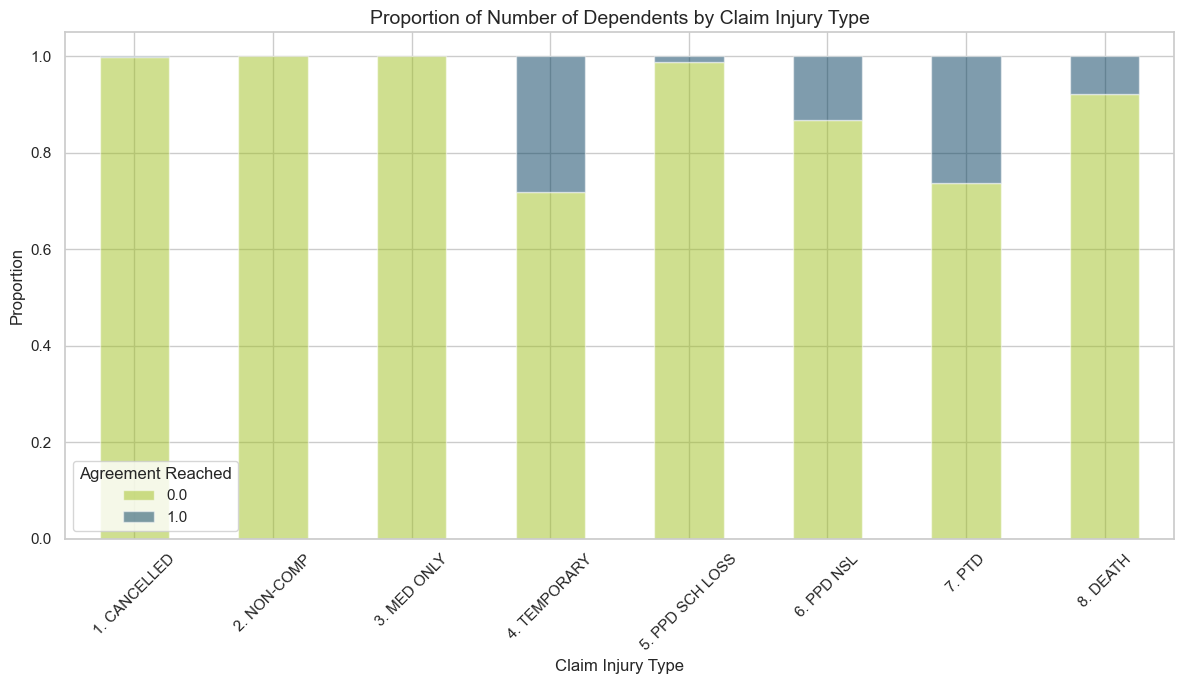

In [231]:
counts = train_EDA.groupby(['Claim Injury Type', 'Agreement Reached']).size().unstack()
counts_norm = counts.div(counts.sum(axis=1), axis=0 )

counts_norm.plot(kind='bar', stacked=True, figsize=(12, 7), color=pal_novaims[0:2], alpha = 0.5)
plt.title(f'Proportion of {col} by Claim Injury Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

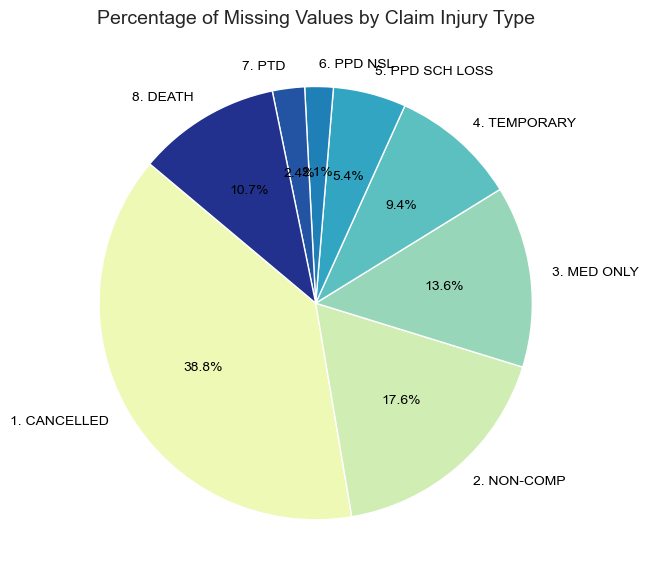

In [232]:
#  percentage of missing values for each 'Claim Injury Type' - pie chart
missing_percentage = train_EDA.groupby('Claim Injury Type').apply(lambda x: x.isnull().sum().sum() / (x.shape[0] * x.shape[1]) * 100)
missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(15, 6))
colors = sns.color_palette("YlGnBu", len(missing_percentage))
plt.pie(missing_percentage, labels=missing_percentage.index, autopct='%1.1f%%', startangle=140, 
        colors= colors, textprops={'fontsize': 10, 'color': 'black'})  
plt.title('Percentage of Missing Values by Claim Injury Type')
plt.show()

It seems that the 'Claim Injury Type' categories - 1. CANCELLED (31%) and 2. NON-COMP (16%) account for the highest percentages of missing values in the data. This suggests that the high proportion of missing values for certain injury claims could potentially influence the outcome. It may be relevant to create a new variable, `missing_info`, to capture this.

In [234]:
del train_EDA

<a id = "Data-Preparation"></a>
    
<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">Data Preparation</h1>
</div>

[2.1. Dataset Split](#Data-split)

[2.2. Data Types](#Data-Types)

[2.3. Duplicates](#Duplicates)

[2.4. Inconsistent data](#Inconsistent-data)

[2.5. Feature Engineering](#Feature-Engineering)

[2.6. Outliers](#Outliers)

[2.7. Missing values](#Missing-values) 

[2.8. Variable pre-selection](#Variable-selection)
 
[2.9. Encoding and Scalling](#Encoding) 
 
   
   
   
[Back to Index](#Index)

## In this section we will perform tests to see the best opptions to treat our data, in the ende the idea is to built a pipeline to perform all these steps in one call.

<a id = "Data-split"></a>
## 2.1. Dataset Slipt

[Back to Data Preparation](#Data-Preparation)

In [238]:
train_to_split = train_data.copy()

#We will preprocess the test data as well to ensure consistency in variable creation 
#and data types required for our models to function correctly, without removing any rows.
test_clean = test_data.copy()

Regarding the missing values we study in the EDA,there are 19445 empty rows corresponding to empty claims. Before doing the split we need to remove these missing values:

In [240]:
missing_values

Total Percentage
OIICS Nature of Injury Description  593471     100.0%
IME-4 Count                         460668     77.62%
First Hearing Date                  442673     74.59%
C-3 Date                            406226     68.45%
Birth Year                           48523      8.18%
Average Weekly Wage                  48096       8.1%
Zip Code                             48082       8.1%
WCIO Part Of Body Code               36527      6.15%
WCIO Part Of Body Description        36527      6.15%
WCIO Nature of Injury Description    35102      5.91%
WCIO Nature of Injury Code           35102      5.91%
WCIO Cause of Injury Description     35085      5.91%
WCIO Cause of Injury Code            35085      5.91%
C-2 Date                             34005      5.73%
Industry Code                        29403      4.95%
Industry Code Description            29403      4.95%
Accident Date                        23134       3.9%
Medical Fee Region                   19445      3.28%
Agreement Reached                    19445      3.28%
WCB Decision                         19445      3.28%
Gender                               19445      3.28%
Age at Injury                        19445      3.28%
District Name                        19445      3.28%
COVID-19 Indicator                   19445      3.28%
County of Injury                     19445      3.28%
Claim Injury Type                    19445      3.28%
Carrier Type                         19445      3.28%
Carrier Name                         19445      3.28%
Attorney/Representative              19445      3.28%
Alternative Dispute Resolution       19445      3.28%
Number of Dependents                 19445      3.28%
Assembly Date                            0       0.0%

In [241]:
train_to_split.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Nature of Injury Description    593471
WCIO Cause

In [242]:
# Remove rows where 'claim injury type' is NaN
train_to_split = train_to_split.dropna(subset=['Claim Injury Type'])


In [243]:
target_features = train_to_split.columns.difference(test_data.columns).tolist()

X = train_to_split.drop(columns=target_features)
y = train_to_split[target_features]


X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y, shuffle=True, random_state=42)

In [244]:
train_clean = X_train.copy()
val_clean = X_val.copy()
print(train_clean.shape, val_clean.shape)
print(y_train.shape, y_val.shape)

(459220, 29) (114806, 29)
(459220, 3) (114806, 3)


In [245]:
print(y_train['Claim Injury Type'].unique())

['2. NON-COMP' '4. TEMPORARY' '5. PPD SCH LOSS' '3. MED ONLY' '6. PPD NSL'
 '1. CANCELLED' '8. DEATH' '7. PTD']


In [246]:
y_train_multi = y_train["Claim Injury Type"].replace({
    '1. CANCELLED': 0,
    '2. NON-COMP': 1,
    '3. MED ONLY': 2,
    '4. TEMPORARY': 3,
    '5. PPD SCH LOSS': 4,
    '6. PPD NSL': 5,
    '7. PTD': 6,
    '8. DEATH': 7}).astype('int8', copy=False)

y_val_multi = y_val["Claim Injury Type"].replace({
    '1. CANCELLED': 0,
    '2. NON-COMP': 1,
    '3. MED ONLY': 2,
    '4. TEMPORARY': 3,
    '5. PPD SCH LOSS': 4,
    '6. PPD NSL': 5,
    '7. PTD': 6,
    '8. DEATH': 7}).astype('int8', copy=False)

In [247]:
del train_to_split

<a id = "Data-Types"></a>
## 2.2. Data Types

[Back to Data Preparation](#Data-Preparation)

In [249]:
print(train_clean.shape, val_clean.shape, test_clean.shape)

(459220, 29) (114806, 29) (387975, 29)


In [250]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 6099392 to 6077062
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       456245 non-null  object 
 1   Age at Injury                       459220 non-null  float64
 2   Alternative Dispute Resolution      459220 non-null  object 
 3   Assembly Date                       459220 non-null  object 
 4   Attorney/Representative             459220 non-null  object 
 5   Average Weekly Wage                 436250 non-null  float64
 6   Birth Year                          436032 non-null  float64
 7   C-2 Date                            447619 non-null  object 
 8   C-3 Date                            149685 non-null  object 
 9   Carrier Name                        459220 non-null  object 
 10  Carrier Type                        459220 non-null  object 
 11  County of Injury        

>Before the optimization of the data types, lets put the columns 'Attorney/Representative' and 'COVID-19 Indicator' as binary indicators

In [252]:
# 'Attorney/Representative' has values Y and N so we convert to binary 
#train_clean['Attorney/Representative'].unique().tolist()
# 'COVID-19 Indicator' has values Y and N so we convert to binary 
#train_clean['COVID-19 Indicator'].unique().tolist()
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator']
def convert_to_binary(df, columns):
        for col in columns:
            df[col] = (df[col] == 'Y').astype(int)
        return df
     
train_clean = convert_to_binary(train_clean,binary_columns)
val_clean = convert_to_binary(val_clean,binary_columns)
test_clean = convert_to_binary(test_clean,binary_columns)

In [253]:
#'Attorney/Representative' and 'COVID-19 Indicator' have U and X values, so we convert to Nan
def process_gender_and_alternative_dispute(df):
        if 'Gender' in df.columns:
            df['Gender'] = np.where(df['Gender'].isin(['U', 'X']), np.nan, df['Gender'])
        if 'Alternative Dispute Resolution' in df.columns:
            df['Alternative Dispute Resolution'] = np.where(df['Alternative Dispute Resolution'] == 'U', 
                                                            np.nan, 
                                                            df['Alternative Dispute Resolution'])
        return df
train_clean = process_gender_and_alternative_dispute(train_clean)
val_clean = process_gender_and_alternative_dispute(val_clean)
test_clean = process_gender_and_alternative_dispute(test_clean)

In [254]:
# Convert numeric columns to the most appropriate numeric type

def convert_numeric_columns(df):
        numeric_cols = df.select_dtypes(['int64', 'float64']).columns
        df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
        return df

train_clean = convert_numeric_columns(train_clean)
val_clean = convert_numeric_columns(val_clean)
test_clean = convert_numeric_columns(test_clean)

In [255]:
# Convert the collumns to Categorical Data and Dates

def convert_categorical_and_dates(df):
        for col in df.select_dtypes(['object', 'category']).columns:
            if 'Date' in col:
                df[col] = pd.to_datetime(df[col], errors='coerce')
            else:
                df[col] = df[col].astype('category')
        return df

convert_categorical_and_dates(train_clean)
convert_categorical_and_dates(val_clean)
convert_categorical_and_dates(test_clean)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
6165911             2022-12-24             19                              N   
6166141             2022-11-20             19                              N   
6165907             2022-12-26             59                              N   
6166047             2022-12-28             55                              N   
6166102             2022-12-20             25                              N   
...                        ...            ...                            ...   
6553137             2012-09-12             52                              N   
6553119             2024-05-22             59                              N   
6553542             2024-05-06             45                              N   
6553455             2024-02-24             42                              N   
6553594                    NaT              0                              N   

                 Assembly Date  Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                               
6165911             2023-01-02                        0                  NaN   
6166141             2023-01-02                        0                  NaN   
6165907             2023-01-02                        0                  0.0   
6166047             2023-01-02                        0                  0.0   
6166102             2023-01-02                        0                  0.0   
...                        ...                      ...                  ...   
6553137             2024-06-05                        0                  NaN   
6553119             2024-06-05                        1                  0.0   
6553542             2024-06-05                        1                  0.0   
6553455             2024-06-05                        1                  0.0   
6553594             2024-06-05                        1                  0.0   

                  Birth Year   C-2 Date   C-3 Date  \
Claim Identifier                                     
6165911               2003.0 2023-01-02        NaT   
6166141               2003.0 2023-01-02        NaT   
6165907               1963.0 2022-12-31        NaT   
6166047                  0.0 2023-01-02        NaT   
6166102               1997.0 2022-12-31        NaT   
...                      ...        ...        ...   
6553137               1960.0 2012-10-23        NaT   
6553119               1965.0        NaT 2024-05-28   
6553542               1979.0        NaT        NaT   
6553455               1981.0        NaT 2024-05-21   
6553594                  NaN        NaT 2024-05-28   

                                   Carrier Name      Carrier Type  \
Claim Identifier                                                    
6165911               INDEMNITY INSURANCE CO OF       1A. PRIVATE   
6166141                 A I U INSURANCE COMPANY       1A. PRIVATE   
6165907               AMGUARD INSURANCE COMPANY       1A. PRIVATE   
6166047             INDEMNITY INS. OF N AMERICA       1A. PRIVATE   
6166102              NEW HAMPSHIRE INSURANCE CO       1A. PRIVATE   
...                                         ...               ...   
6553137                    STATE INSURANCE FUND           2A. SIF   
6553119                   NYC TRANSIT AUTHORITY   3A. SELF PUBLIC   
6553542                    STATE INSURANCE FUND           2A. SIF   
6553455           NEW YORK BLACK CAR OPERATORS'  4A. SELF PRIVATE   
6553594            CNY OTHER THAN ED, HED WATER   3A. SELF PUBLIC   

                 County of Injury  COVID-19 Indicator District Name  \
Claim Identifier                                                      
6165911                     BRONX                   0           NYC   
6166141                    QUEENS                   0           NYC   
6165907               WESTCHESTER                 

In [256]:
# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage and adapted to be able to check if the column is actually a float
#or is an error like a code being a float column

def reduce_memory_usage(df):
    """Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
       Uses nullable integer types for columns that contain NaNs."""
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            
            elif str(col_type)[:5] == 'float':
                # Check if all non-NaN float values are integers
                if (df[col].dropna() % 1 == 0).all():
                    # Convert to nullable integer type if all non-NaN values are whole numbers
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype('Int8')
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype('Int16')
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype('Int32')
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype('Int64')
                else:
                    # Otherwise, optimize as a float type
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [257]:
train_clean = reduce_memory_usage(train_clean)
val_clean = reduce_memory_usage(val_clean)
test_clean = reduce_memory_usage(test_clean)

Memory usage of dataframe is 69.61 MB
Memory usage after optimization is: 41.14 MB
Decreased by 40.9%
Memory usage of dataframe is 17.55 MB
Memory usage after optimization is: 10.43 MB
Decreased by 40.5%
Memory usage of dataframe is 58.72 MB
Memory usage after optimization is: 33.93 MB
Decreased by 42.2%


In [258]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 6099392 to 6077062
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Accident Date                       456245 non-null  datetime64[ns]
 1   Age at Injury                       459220 non-null  Int8          
 2   Alternative Dispute Resolution      459215 non-null  category      
 3   Assembly Date                       459220 non-null  datetime64[ns]
 4   Attorney/Representative             459220 non-null  int8          
 5   Average Weekly Wage                 436250 non-null  float32       
 6   Birth Year                          436032 non-null  Int16         
 7   C-2 Date                            447619 non-null  datetime64[ns]
 8   C-3 Date                            149685 non-null  datetime64[ns]
 9   Carrier Name                        459220 non-null  category      
 10  Carrie

<a id = "Duplicates"></a>
## 2.3. Duplicates

[Back to Data Preparation](#Data-Preparation)

In [260]:
train_clean.duplicated().sum()

1

In [261]:
# Find total duplicates and duplicate rows excluding 'Assembly Date'
duplicate_rows = train_clean.loc[train_clean.loc[:, train_clean.columns != 'Assembly Date'].duplicated(keep=False)]
duplicate_rows_sorted = duplicate_rows.sort_values(by=train_clean.columns.tolist(), ascending=True)
duplicate_rows_sorted

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5759428             2021-06-15             60                              N   
5863407             2021-06-15             60                              N   
5686981                    NaT              0                              N   
5686771                    NaT              0                              N   

                 Assembly Date  Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                               
5759428             2021-07-06                        0                  0.0   
5863407             2021-11-23                        0                  0.0   
5686981             2021-03-25                        1                  0.0   
5686771             2021-03-25                        1                  0.0   

                  Birth Year C-2 Date   C-3 Date                 Carrier Name  \
Claim Identifier                                                                
5759428                 1960      NaT        NaT  INDEMNITY INS. OF N AMERICA   
5863407                 1960      NaT        NaT  INDEMNITY INS. OF N AMERICA   
5686981                 1968      NaT 2021-03-16    ACE AMERICAN INSURANCE CO   
5686771                 1968      NaT 2021-03-16    ACE AMERICAN INSURANCE CO   

                 Carrier Type County of Injury  COVID-19 Indicator  \
Claim Identifier                                                     
5759428           1A. PRIVATE          SUFFOLK                   0   
5863407           1A. PRIVATE          SUFFOLK                   0   
5686981           1A. PRIVATE          UNKNOWN                   0   
5686771           1A. PRIVATE          UNKNOWN                   0   

                 District Name First Hearing Date Gender  IME-4 Count  \
Claim Identifier                                                        
5759428              HAUPPAUGE                NaT      M         <NA>   
5863407              HAUPPAUGE                NaT      M         <NA>   
5686981                    NYC         2022-10-24      M         <NA>   
5686771                    NYC         2022-10-24      M         <NA>   

                  Industry Code       Industry Code Description  \
Claim Identifier                                                  
5759428                      48  TRANSPORTATION AND WAREHOUSING   
5863407                      48  TRANSPORTATION AND WAREHOUSING   
5686981                    <NA>                             NaN   
5686771                    <NA>                             NaN   

                 Medical Fee Region  OIICS Nature of Injury Description  \
Claim Identifier                                                          
5759428                         III                                 NaN   
5863407                         III                                 NaN   
5686981                          UK                                 NaN   
5686771                          UK                                 NaN   

                  WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                               
5759428                                <NA>                              NaN   
5863407                                <NA>                              NaN   
5686981                                <NA>                              NaN   
5686771                                <NA>                              NaN   

                  WCIO Nature of Injury Code  \
Claim Identifier                               
5759428                                 <NA>   
5863407                                 <NA>   
5686981                                 <NA>   
5686771                                 <NA>   

                 WCIO Nature of Injury Description  WCIO Part Of Body Code  \
Claim 

>- a Bit of a coincidence to have all this columns in common, specially beacause if (same birth year, exact same county, nuber of dependents, and the sates, its best to keep only one has it can be a duplicated record, open the same claim twice
>- id 5759428	 & 5863407: excluding the Assembly Date, as Date the claim was first assembled, can sometimes hide some duplicated entries. So same accident date, other dates, age, location, industry and dependents? suspicious.

In [263]:
val_clean.duplicated().sum()

0

In [264]:
# Find total duplicates and duplicate rows excluding 'Assembly Date'
duplicate_rows_val = val_clean.loc[val_clean.loc[:,val_clean.columns != 'Assembly Date'].duplicated(keep=False)]
duplicate_rows_sorted_val = duplicate_rows_val.sort_values(by=val_clean.columns.tolist(), ascending=True)
duplicate_rows_sorted_val

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, OIICS Nature of Injury Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Number of Dependents]
Index: []

In [265]:
print(f" Train: {train_clean.duplicated().sum()} \n Validation:{val_clean.duplicated().sum()}")

 Train: 1 
 Validation:0


Since the number of duplicates is relatively small, their presence is unlikely to distort the overall results, making it reasonable to keep them.

<a id = "Inconsistent-data"></a>
## 2.4. Inconsistent data

[Back to Data Preparation](#Data-Preparation)

In [268]:
train_clean_inc = train_clean.copy()
val_clean_inc = val_clean.copy()
test_clean_inc = test_clean.copy()

In [269]:
print(train_clean_inc.shape, val_clean_inc.shape, test_clean_inc.shape)

(459220, 29) (114806, 29) (387975, 29)


> <span style="background-color: darkblue; color: white;">1. Birth Year < 1934 </span>


If we have the the Birth Year and the accident date we can obtain the age where is 0 now, if we have the have ant the birth year we can calculate the accident date

In [272]:
# Modificação: Definir 'Birth Year' < 1934 como 0
train_clean_inc['Birth Year'] = train_clean_inc['Birth Year'].apply(lambda x: 0 if x < 1934 else x)
val_clean_inc['Birth Year'] = val_clean_inc['Birth Year'].apply(lambda x: 0 if x < 1934 else x)
test_clean_inc['Birth Year'] = test_clean_inc['Birth Year'].apply(lambda x: 0 if x < 1934 else x)

>when the Age is 0 we only have these years, and they not seem very realistic so the best choice is to assume that Age = 0 is a missing value.

In [274]:
AGE_na = train_clean_inc[train_clean_inc['Age at Injury'].isna()][['Accident Date', 'Birth Year', 'Age at Injury']]
AGE_na[~(AGE_na['Accident Date'].isna() | (AGE_na['Birth Year'] == 0) | AGE_na['Birth Year'].isna())]

Empty DataFrame
Columns: [Accident Date, Birth Year, Age at Injury]
Index: []

In [275]:
Accidentdt_na = train_clean_inc[train_clean_inc['Accident Date'].isna()][['Accident Date', 'Birth Year', 'Age at Injury']]
Accidentdt_na[~((Accidentdt_na['Age at Injury'] == 0) | (Accidentdt_na['Birth Year'] == 0) | (Accidentdt_na['Birth Year'].isna()))]

Empty DataFrame
Columns: [Accident Date, Birth Year, Age at Injury]
Index: []

>We have no way to retrive the Age and Accident Date missing values from other columns

> <span style="background-color: darkblue; color: white;">2. Accident Data After Assembly Date <br> C-2 or C-3 Date before Accident Date
> <br> C-2 or C-3 Date after Assembly Date </span>




In [278]:
# Identify rows where Accident Date is after Assembly Date
print(f" Accident Date after Assembly Date: \n   Train: {len(train_clean_inc[(train_clean_inc['Accident Date']) > 
                     (train_clean_inc['Assembly Date'])])} \n   Validation: {len(val_clean_inc[(val_clean_inc['Accident Date']) 
                          > (val_clean_inc['Assembly Date'])])} \n   Test: {len(test_clean[(test_clean['Accident Date'])
                                                                              > (test_clean['Assembly Date'])])}")
# Identify rows where Accident Date is after C-2 Date
print(f" Accident Date after C-2 Date Date: \n   Train: {len(train_clean_inc[(train_clean_inc['Accident Date']) > 
                     (train_clean_inc['C-2 Date'])])} \n   Validation: {len(val_clean_inc[(val_clean_inc['Accident Date']) 
                          > (val_clean_inc['C-2 Date'])])} \n   Test: {len(test_clean[(test_clean['Accident Date'])
                                                                              > (test_clean['C-2 Date'])])}")
# Identify rows where Accident Date is after C-3 Date
print(f" Accident Date after C-3 Date Date: \n   Train: {len(train_clean_inc[(train_clean_inc['Accident Date']) > 
                     (train_clean_inc['C-3 Date'])])} \n   Validation: {len(val_clean_inc[(val_clean_inc['Accident Date']) 
                          > (val_clean_inc['C-3 Date'])])} \n   Test: {len(test_clean[(test_clean['Accident Date'])
                                                                              > (test_clean['C-3 Date'])])}")
# Identify rows where C-2 Date is after Assembly Date 
print(f" C-2 Date is after Assembly Date : \n   Train: {len(train_clean_inc[(train_clean_inc['Assembly Date']) > 
                     (train_clean_inc['C-2 Date'])])} \n   Validation: {len(val_clean_inc[(val_clean_inc['Assembly Date']) 
                          > (val_clean_inc['C-2 Date'])])} \n   Test: {len(test_clean[(test_clean['Assembly Date'])
                                                                              > (test_clean['C-2 Date'])])}")

# Identify rows where C-3 Date is after Assembly Date 
print(f" C-3 Date is after Assembly Date : \n   Train: {len(train_clean_inc[(train_clean_inc['Assembly Date']) > 
                     (train_clean_inc['C-3 Date'])])} \n   Validation: {len(val_clean_inc[(val_clean_inc['Assembly Date']) 
                          > (val_clean_inc['C-3 Date'])])} \n   Test: {len(test_clean[(test_clean['Assembly Date'])
                                                                              > (test_clean['C-3 Date'])])}")

 Accident Date after Assembly Date: 
   Train: 1120 
   Validation: 287 
   Test: 222
 Accident Date after C-2 Date Date: 
   Train: 786 
   Validation: 196 
   Test: 181
 Accident Date after C-3 Date Date: 
   Train: 1030 
   Validation: 259 
   Test: 226
 C-2 Date is after Assembly Date : 
   Train: 66239 
   Validation: 16568 
   Test: 36273
 C-3 Date is after Assembly Date : 
   Train: 67276 
   Validation: 16867 
   Test: 40155


In [279]:
def check_missing_dates(row):
        missing_columns = [col for col in ["Accident Date", "C-3 Date", "C-2 Date", "Assembly Date", "First Hearing Date"] 
                           if pd.isna(row[col])]
        return ", ".join(missing_columns) if missing_columns else "OK"


def validate_dates(df):
        # Rule 1: Accident Date after Assembly Date 
        df["Assembly Date before Accident Date"] = df.apply(lambda row: 
            1 if pd.notna(row["Accident Date"]) and pd.notna(row["Assembly Date"]) and row["Assembly Date"] < row["Accident Date"] 
            else 0, axis=1)
        
        # Rule 2: Accident Date after C-2 or C-3 Date  
        df["C-2 or C-3 Date before Accident Date"] = df.apply(lambda row: 
            1 if pd.notna(row["Accident Date"]) and any([
                pd.notna(row["C-2 Date"]) and row["C-2 Date"] < row["Accident Date"],
                pd.notna(row["C-3 Date"]) and row["C-3 Date"] < row["Accident Date"]
            ]) 
            else 0, axis=1)
    
        # Rule 3: C-2 or C-3 Date after Assembly Date
        df["C-2 or C-3 Date after Assembly Date"] = df.apply(lambda row: 
            1 if pd.notna(row["Assembly Date"]) and any([
                pd.notna(row["C-2 Date"]) and row["C-2 Date"] > row["Assembly Date"],
                pd.notna(row["C-3 Date"]) and row["C-3 Date"] > row["Assembly Date"]
            ]) 
            else 0, axis=1)

        return df

In [280]:
train_clean_inc['Missing_Dates'] = train_clean_inc.apply(check_missing_dates, axis=1)
val_clean_inc['Missing_Dates'] = val_clean_inc.apply(check_missing_dates, axis=1)
test_clean_inc['Missing_Dates'] = test_clean_inc.apply(check_missing_dates, axis=1)

> <span style="background-color: darkblue; color: white;">3. ['Age at Injury', 'Average Weekly Wage', 'Birth Year'] are actually missing information - they cant be 0</span>

In [282]:
columns_to_replace = ['Age at Injury', 'Average Weekly Wage', 'Birth Year']
train_clean_inc[columns_to_replace] = train_clean_inc[columns_to_replace].replace(0, np.nan)
val_clean_inc[columns_to_replace] = val_clean_inc[columns_to_replace].replace(0, np.nan)
test_clean_inc[columns_to_replace] = test_clean_inc[columns_to_replace].replace(0, np.nan)

> <span style="background-color: darkblue; color: white;">5. Same Description, Multiple codes</span>

In [284]:
# List of columns to check
description_columns = [
    ('Industry Code', 'Industry Code Description'),
    ('WCIO Cause of Injury Code', 'WCIO Cause of Injury Description'),
    ('WCIO Nature of Injury Code', 'WCIO Nature of Injury Description'),
    ('WCIO Part Of Body Code', 'WCIO Part Of Body Description')
]

# Iterate through each column pair and check for multiple unique codes - grouping by description
for code_col, desc_col in description_columns:
    duplicate_check = train_clean_inc.groupby(desc_col)[code_col].agg(['nunique', lambda x: list(x.unique())]).reset_index()
    duplicate_check.columns = [desc_col, 'Unique Code Count', 'Code List']
    duplicate_check = duplicate_check[duplicate_check['Unique Code Count'] > 1]
    
    if not duplicate_check.empty:
        print(f"Descriptions with multiple unique codes for {desc_col}:")
        display(duplicate_check)

Descriptions with multiple unique codes for Industry Code Description:


Industry Code Description  Unique Code Count     Code List
10                   MANUFACTURING                  3  [32, 33, 31]
16                    RETAIL TRADE                  2      [44, 45]
17  TRANSPORTATION AND WAREHOUSING                  2      [49, 48]

Descriptions with multiple unique codes for WCIO Cause of Injury Description:


WCIO Cause of Injury Description  Unique Code Count     Code List
43   OBJECT BEING LIFTED OR HANDLED                  3  [79, 17, 66]
57                REPETITIVE MOTION                  2      [97, 94]

Descriptions with multiple unique codes for WCIO Part Of Body Description:


WCIO Part Of Body Description  Unique Code Count Code List
7                           DISC                  2  [22, 43]
41                   SOFT TISSUE                  2  [18, 25]
42                   SPINAL CORD                  2  [47, 23]

In [285]:
# Validation
for code_col, desc_col in description_columns:
    duplicate_check_val = val_clean_inc.groupby(desc_col)[code_col].agg(['nunique', lambda x: list(x.unique())]).reset_index()
    duplicate_check_val.columns = [desc_col, 'Unique Code Count', 'Code List']
    duplicate_check_val = duplicate_check_val[duplicate_check_val['Unique Code Count'] > 1]
    
    if not duplicate_check_val.empty:
        print(f"Descriptions with multiple unique codes for {desc_col}:")
        display(duplicate_check_val)

Descriptions with multiple unique codes for Industry Code Description:


Industry Code Description  Unique Code Count     Code List
10                   MANUFACTURING                  3  [31, 33, 32]
16                    RETAIL TRADE                  2      [44, 45]
17  TRANSPORTATION AND WAREHOUSING                  2      [49, 48]

Descriptions with multiple unique codes for WCIO Cause of Injury Description:


WCIO Cause of Injury Description  Unique Code Count     Code List
43   OBJECT BEING LIFTED OR HANDLED                  3  [79, 17, 66]
57                REPETITIVE MOTION                  2      [97, 94]

Descriptions with multiple unique codes for WCIO Part Of Body Description:


WCIO Part Of Body Description  Unique Code Count Code List
7                           DISC                  2  [22, 43]
41                   SOFT TISSUE                  2  [18, 25]
42                   SPINAL CORD                  2  [23, 47]

In [286]:
# Iterating over the list of column pairs in order to standardize the codes
for code_col, desc_col in description_columns:
    # Creating a mapping from each unique description to its most common code
    code_mapping = (train_clean_inc.groupby(desc_col)[code_col]
        .apply(lambda x: x.value_counts().idxmax()).to_dict())
    
    # Applying the mapping to standardize the codes
    train_clean_inc[code_col] = train_clean_inc[desc_col].map(code_mapping)
    print(f"Standardized {code_col} based on {desc_col}. Unique mappings created: {len(code_mapping)}")

# Verifying the process
for code_col, desc_col in description_columns:
    inconsistencies = train_clean_inc.groupby(desc_col)[code_col].nunique()
    inconsistent_descriptions = inconsistencies[inconsistencies > 1]
    if not inconsistent_descriptions.empty:
        print(f"Found inconsistencies in {desc_col}:\n", inconsistent_descriptions)
    else:
        print(f"No inconsistencies found for {desc_col}.")

Standardized Industry Code based on Industry Code Description. Unique mappings created: 20
Standardized WCIO Cause of Injury Code based on WCIO Cause of Injury Description. Unique mappings created: 74
Standardized WCIO Nature of Injury Code based on WCIO Nature of Injury Description. Unique mappings created: 56
Standardized WCIO Part Of Body Code based on WCIO Part Of Body Description. Unique mappings created: 54
No inconsistencies found for Industry Code Description.
No inconsistencies found for WCIO Cause of Injury Description.
No inconsistencies found for WCIO Nature of Injury Description.
No inconsistencies found for WCIO Part Of Body Description.


In [287]:
# Validation
for code_col, desc_col in description_columns:
    # Creating a mapping from each unique description to its most common code
    code_mapping_val = (val_clean_inc.groupby(desc_col)[code_col]
        .apply(lambda x: x.value_counts().idxmax()).to_dict())
    
    # Applying the mapping to standardize the codes
    val_clean_inc[code_col] = val_clean_inc[desc_col].map(code_mapping_val)
    print(f"Standardized {code_col} based on {desc_col}. Unique mappings created: {len(code_mapping_val)}")

# Verifying the process
for code_col, desc_col in description_columns:
    inconsistencies_val = val_clean_inc.groupby(desc_col)[code_col].nunique()
    inconsistent_descriptions_val = inconsistencies_val[inconsistencies_val > 1]
    if not inconsistent_descriptions_val.empty:
        print(f"Found inconsistencies in {desc_col}:\n", inconsistent_descriptions_val)
    else:
        print(f"No inconsistencies found for {desc_col}.")

Standardized Industry Code based on Industry Code Description. Unique mappings created: 20
Standardized WCIO Cause of Injury Code based on WCIO Cause of Injury Description. Unique mappings created: 74
Standardized WCIO Nature of Injury Code based on WCIO Nature of Injury Description. Unique mappings created: 55
Standardized WCIO Part Of Body Code based on WCIO Part Of Body Description. Unique mappings created: 54
No inconsistencies found for Industry Code Description.
No inconsistencies found for WCIO Cause of Injury Description.
No inconsistencies found for WCIO Nature of Injury Description.
No inconsistencies found for WCIO Part Of Body Description.


<a id = "Feature-Engineering"></a>
## 2.5. Feature Engineering

[Back to Data Preparation](#Data-Preparation)

In [289]:
train_clean_new = train_clean_inc.copy()
val_clean_new = val_clean_inc.copy()
test_clean_new = test_clean_inc.copy()

> <span style="background-color: darkblue; color: white;">1. Adding a Covid Flag</span>

Since the dataset includes data from 2020 and 2021, which were highly atypical years due to the COVID-19 pandemic, we decided to introduce a "COVID Flag" feature. This flag helps account for potential disruptions and anomalies caused by the pandemic, enabling the model to differentiate patterns influenced by COVID-19-related factors from typical trends.

In [292]:
covid_start = pd.Timestamp('2020-03-01')
covid_end = pd.Timestamp('2021-12-31')
def add_covid_flag(df, covid_start, covid_end):
        df['COVID Period'] = ((df['Accident Date'] >= covid_start) & 
                              (df['Accident Date'] <= covid_end)).astype(int)
        return df

In [293]:
train_clean_new = add_covid_flag(train_clean_new, covid_start, covid_end)
val_clean_new = add_covid_flag(val_clean_new, covid_start, covid_end)
test_clean_new = add_covid_flag(test_clean_new, covid_start, covid_end)

 > <span style="background-color: darkblue; color: white;">2. Delay in reporting</span>

In [295]:
def categorize_delay_days(x):
        if pd.isna(x) or x < 0:
            return 'Invalid'
        elif x <= 30:
            return "Short delays (0-30 days)"
        elif x <= 180:
            return "Medium delays (31-180 days)"
        elif x <= 365:
            return "Long delays (181-365 days)"
        else:
            return "Very long delays (>365 days)"


In [296]:
# reporting delay in days
train_clean_new['delay_days_category'] = (train_clean_new['Assembly Date'] - train_clean_new['Accident Date']).dt.days.apply(categorize_delay_days)

val_clean_new['delay_days_category'] = (val_clean_new['Assembly Date'] - val_clean_new['Accident Date']).dt.days.apply(categorize_delay_days)

test_clean_new['delay_days_category'] = (test_clean_new['Assembly Date'] - test_clean_new['Accident Date']).dt.days.apply(categorize_delay_days)


In [297]:
train_clean_new[['Accident Date', 'Assembly Date', 'delay_days_category']].sort_values(by='delay_days_category', ascending=False).head()

Accident Date Assembly Date           delay_days_category
Claim Identifier                                                          
5648731             2019-08-28    2021-02-02  Very long delays (>365 days)
5823526             2019-08-12    2021-09-30  Very long delays (>365 days)
5651385             2004-08-01    2021-02-04  Very long delays (>365 days)
5917673             2021-02-02    2022-02-09  Very long delays (>365 days)
5901570             2020-07-27    2022-01-20  Very long delays (>365 days)

In [298]:
val_clean_new[['Accident Date', 'Assembly Date', 'delay_days_category']].sort_values(by='delay_days_category', ascending=False).head()

Accident Date Assembly Date           delay_days_category
Claim Identifier                                                          
5635575             2002-04-15    2021-01-13  Very long delays (>365 days)
5830436             2020-09-18    2021-10-08  Very long delays (>365 days)
5830794             2020-03-31    2021-10-12  Very long delays (>365 days)
5521515             2017-05-07    2020-07-22  Very long delays (>365 days)
6087697             2021-05-06    2022-09-19  Very long delays (>365 days)

We turn this into a category to avoid outliers and missing values. 

 > <span style="background-color: darkblue; color: white;">3. Number of Missing components (information)</span> :
The missing info as we saw above can impact the outcome, like the claim can be cancel just bc it does not have the necessary info. since we cannot measure this with the actual missing data, we will capture this with a categorical variable

In [301]:
def categorize_missing_info(df):
        def categorize(x):
            if x == 0:
                return "No missing information"
            elif x <= 2:
                return "Low missing information"
            elif x <= 4:
                return "Moderate missing information"
            elif x <= 8:
                return "High missing information"
            else:
                return "Very high missing information"
        
        df['missing_info_category'] = df.isna().sum(axis=1).apply(categorize)
       
        return df

In [302]:
train_clean_new = categorize_missing_info(train_clean_new)
val_clean_new = categorize_missing_info(val_clean_new)
test_clean_new = categorize_missing_info(test_clean_new)

 > <span style="background-color: darkblue; color: white;">4. Wage categories:</span>
 Since we have a lot of missing values on the wage column but its an important info to keep we will create categories for this variable

In [304]:
q1 = train_clean_new['Average Weekly Wage'].quantile(0.25)
q2 = train_clean_new['Average Weekly Wage'].quantile(0.5)  # Median
q3 = train_clean_new['Average Weekly Wage'].quantile(0.75)
upper_fence = q3 + 1.5 * (q3 - q1)

In [305]:
# Categorize Average Weekly Wage 
def categorize_wage(x):
    # Handle invalid or missing data
    if pd.isna(x) or x <= 0:
        return 'Invalid'
    elif x <= 702:
        return 'Very Low Income'
    elif x <= 1100:
        return 'Low Income'
    elif x <= 1600:
        return 'Middle Income'
    elif x <= 3000:
        return 'Upper Middle Income (Q3 to Upper Fence)'
    else:
        return 'High Income (> Upper Fence)'

In [306]:
# Example usage with a DataFrame column
train_clean_new['Wage Category'] = train_clean_new['Average Weekly Wage'].apply(categorize_wage)

val_clean_new['Wage Category'] = val_clean_new['Average Weekly Wage'].apply(categorize_wage)

test_clean_new['Wage Category'] = test_clean_new['Average Weekly Wage'].apply(categorize_wage)

In [307]:
train_clean_new[['Average Weekly Wage', 'Wage Category']].tail()

Average Weekly Wage                            Wage Category
Claim Identifier                                                              
5731524                   1765.000000  Upper Middle Income (Q3 to Upper Fence)
5707136                    698.859985                          Very Low Income
5737351                   2437.719971  Upper Middle Income (Q3 to Upper Fence)
5941880                           NaN                                  Invalid
6077062                    722.630005                               Low Income

In [308]:
val_clean_new[['Average Weekly Wage', 'Wage Category']].head()

Average Weekly Wage    Wage Category
Claim Identifier                                      
5919060                           NaN          Invalid
5941268                           NaN          Invalid
5832848                           NaN          Invalid
5640435                         236.0  Very Low Income
5664255                           NaN          Invalid

As observed in the table above, the "IME-4 Count" feature, despite having a significant amount of missing values, proves useful in predicting  "7. PTD" and "8. Death." in the target variable. This is particularly beneficial, as these target categories have the fewest data points, making any predictive contribution from "IME-4 Count" valuable for enhancing model performance.

In [310]:
train_clean_new = reduce_memory_usage(train_clean_new)
val_clean_new = reduce_memory_usage(val_clean_new)
test_clean_new = reduce_memory_usage(test_clean_new)

Memory usage of dataframe is 59.10 MB
Memory usage after optimization is: 41.59 MB
Decreased by 29.6%
Memory usage of dataframe is 14.93 MB
Memory usage after optimization is: 10.55 MB
Decreased by 29.3%
Memory usage of dataframe is 53.17 MB
Memory usage after optimization is: 36.15 MB
Decreased by 32.0%


<a id = "Outliers"></a>
## 2.6. Outliers

[Back to Data Preparation](#Data-Preparation)

In [312]:
train_clean_out = train_clean_new.copy()
val_clean_out = val_clean_new.copy()
test_clean_out = test_clean_new.copy()

In [313]:
excluded_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'C-2 or C-3 Date before Accident Date', 'Assembly Date before Accident Date']
numeric_variables = [col for col in (train_clean_out.select_dtypes(include=['number']).columns.tolist()) if col not in excluded_columns]

In [314]:
#https://github.com/DeepSparkChaker/GiveMeCredit_Top5_Solution_Kaggle/blob/main/credit-part2-data-preparation-5-features_engineer.ipynb
def get_outlier_counts(numeric_df, outlier_threshold=1.5):

    # Calculate Q1, Q3, and IQR for numeric columns
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outlier_counts = ((numeric_df < (Q1 - outlier_threshold * IQR)) | (numeric_df > (Q3 + outlier_threshold * IQR))).sum()

    # Return the counts of outliers for each column, sorted in descending order
    return outlier_counts[outlier_counts > 0].sort_values(ascending=False)

# Test the function with a threshold of 3
get_outlier_counts(train_clean_out[numeric_variables])

IME-4 Count            5734
Average Weekly Wage    4794
Age at Injury           163
dtype: Int64

In [315]:
variables_to_treat = ['IME-4 Count','Average Weekly Wage', 'Birth Year', 'Age at Injury']

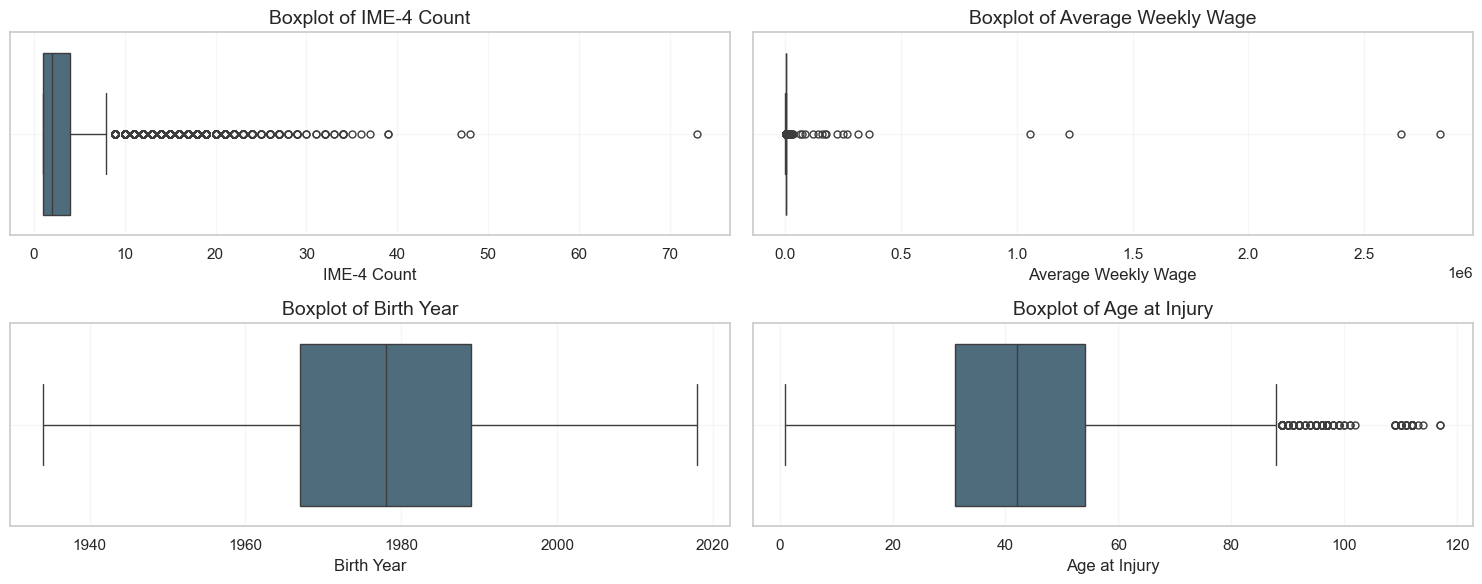

Variable      Min  Lower Fence           Q1      Median  \
0          IME-4 Count     1.00    -3.500000     1.000000     2.00000   
1  Average Weekly Wage    13.94  -618.746277   700.087524  1070.13501   
2           Birth Year  1934.00  1934.000000  1967.000000  1978.00000   
3        Age at Injury     1.00    -3.500000    31.000000    42.00000   

            Q3  Upper Fence        Max  
0     4.000000      8.50000       73.0  
1  1579.310059   2898.14386  2828079.0  
2  1989.000000   2022.00000     2018.0  
3    54.000000     88.50000      117.0

In [316]:
#Blox plot & stats for the variables_to_treat
stats_variables_to_treat = plot_boxplots(train_clean_out, variables_to_treat, num_rows=2 , num_cols=2)
stats_variables_to_treat

#### Birth Year

>- len(train_clean_out[(train_clean_out['Birth Year'] < 1934) & (train_clean_out['Age at Injury'].isna())]) == 61
>
>- this values have the birth Years [1901, 1902, 1900, 1903] -> train_clean_out[(train_clean_out['Birth Year'] < 1934) & (train_clean_out['Age at Injury'].isna())]['Birth Year'].unique() - its a bit strange to have records from people from these years ith accidents in 2020 so only these are going to be removed Since they have Age Nan as Well 

for these records:

In [320]:
print(f" Train:{len(train_clean_out[(train_clean_out['Birth Year'] < 1934) 
                   & (~train_clean_out['Age at Injury'].isna())])} \n Validation:{len(val_clean_out[(val_clean_out['Birth Year'] < 1934) 
                   & (~val_clean_out['Age at Injury'].isna())])}")

 Train:0 
 Validation:0


>this values are from older Accident Dates, since we will analyze based on the age at the accident and not the age now (and remove birth year) we will keep these.
>
>Why? Because we will have a temporal range feature to capture the time passed since the accident and the assembly date

#### Average Weekly Wage
We will not treat outliers for this column instead we turn it into a categorical column, bc want to capture the impact of big delays in the assembly, due to disputes, problems, bureaucracy. The range for this variable until the upper fence is very low (55 days), this does not capture what we want. - Done in the Feature Engineering Section

#### IME-4 Count
Same for this variable

In [324]:
def categorize_ime4_count(count):
        if pd.isna(count) or count < 0:
            return 'Invalid'
        elif count < 1:
            return "Low IME-4 Count"
        elif 1 <= count <= 2:
            return "Low IME-4 Count"
        elif 2 < count <= 4:
            return "Medium IME-4 Count"
        elif 4 < count <= 8.5:
            return "High IME-4 Count"
        else:
            return "Very High IME-4 Count"

In [325]:
train_clean_new['IME-4 Count Category'] = train_clean_new['IME-4 Count'].apply(categorize_ime4_count)

val_clean_new['IME-4 Count Category'] = val_clean_new['IME-4 Count'].apply(categorize_ime4_count)

test_clean_new['IME-4 Count Category'] = test_clean_new['IME-4 Count'].apply(categorize_ime4_count)

In [326]:
train_with_y = pd.concat([train_clean_new, y_train], axis=1)
columns = train_clean_new.columns.tolist()
proportion_by_column = {}
for column in columns:
    counts = train_with_y.groupby([column, 'Claim Injury Type']).size()
    total_counts = train_with_y[column].value_counts()
    proportions = (counts.div(total_counts, level=column).unstack(fill_value=0)) 
    proportion_by_column[column] = proportions * 100

columns_to_view = ['IME-4 Count Category']

for column in columns_to_view:
    print(f"Proportions to the Column: {column}")
    display(proportion_by_column[column])
    print("\n") 

Proportions to the Column: IME-4 Count Category


Claim Injury Type      1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
IME-4 Count Category                                                          
High IME-4 Count           0.029735     0.844484     5.144216     71.650312   
Invalid                    2.747317    64.718314    12.493520     17.420729   
Low IME-4 Count            0.399445     6.103655    13.144920     44.226430   
Medium IME-4 Count         0.159403     2.516884     9.044004     58.639205   
Very High IME-4 Count      0.017440     0.226718     2.389257     84.094873   

Claim Injury Type      5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH  
IME-4 Count Category                                                    
High IME-4 Count             16.176033    5.970859  0.136783  0.047577  
Invalid                       2.490942    0.045609  0.001133  0.082436  
Low IME-4 Count              34.419133    1.586081  0.030084  0.090251  
Medium IME-4 Count           25.571542    3.917950  0.058727  0.092286  
Very High IME-4 Count         7.324730    5.598186  0.331357  0.017440

As observed in the table above, the "IME-4 Count" feature, despite having a significant amount of missing values, proves useful in predicting  "7. PTD" and "8. Death." in the target variable. This is particularly beneficial, as these target categories have the fewest data points, making any predictive contribution from "IME-4 Count" valuable for enhancing model performance.

In [328]:
variables_to_treat = ['Age at Injury']

In [329]:
train_IQR = train_clean_out.copy()
train_Winsorize = train_clean_out.copy()
train_Manual = train_clean_out.copy()

val_IQR = val_clean_out.copy()
val_Winsorize = val_clean_out.copy()
val_Manual = val_clean_out.copy()

>To compare the data loss (the ideal is not to lose above 3% of the data): 

### 1. IQR Method
The IQR (Interquartile Range) is a method to identify outliers - it calculates the Q1 (25th percentile), Q3 (75th percentile), and IQR (Q3 - Q1) for each numeric column. Outliers are then defined bellow the lower and above the upper fence. 

In [332]:
def remove_outliers_with_iqr(df, columns, outlier_threshold=1.5):
    # Calculate Q1, Q3, and IQR for specified columns
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    # Identify rows that are not outliers in any of the specified columns
    mask = ~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)

    # Return a new DataFrame without the outliers
    return df[mask]

In [333]:
# Apply the function to remove outliers and the percentage of data loss
df_IQR = remove_outliers_with_iqr(train_IQR, variables_to_treat)
data_loss_IQR = (1 - df_IQR.shape[0] / train_clean_out.shape[0]) * 100

In [334]:
print(f"Data loss after removing outliers With IQR: \n Train: {data_loss_IQR:.2f}%")

Data loss after removing outliers With IQR: 
 Train: 0.04%


If we choose this method we need to be carefull with data leakage, we need to use the same bound in the train, val and test. BUt, since we dont want to remove any rows from the test and we still want the model to have some predictive power for extreme cases when concerning the age (like typos) we will try Winsorization.

### 2. Winsorization
Winsorization caps extreme values in a dataset, replacing outliers with the maximum or minimum acceptable value within a defined threshold (such as IQR or Z-score). Rather than discarding the data, Winsorization transforms outliers to fall closer to the threshold, preserving the dataset size but reducing the influence of extreme values.

In [337]:
def winsorize_with_iqr(df, columns, iqr_threshold=1.5, lower_bound=None, upper_bound=None):
    # Calculate Q1, Q3, and IQR for specified columns if bounds are not provided
    if lower_bound is None or upper_bound is None:
        Q1 = df[columns].quantile(0.25)
        Q3 = df[columns].quantile(0.75)
        IQR = Q3 - Q1

        # Define acceptable lower and upper bounds
        lower_bound = Q1 - iqr_threshold * IQR
        upper_bound = Q3 + iqr_threshold * IQR

    # Apply Winsorization: cap values below/above the threshold
    df_winsorized = df.copy()
    for column in columns:
        df_winsorized[column] = df_winsorized[column].clip(lower=lower_bound[column], upper=upper_bound[column])

    return df_winsorized, lower_bound, upper_bound

In [338]:
for col in variables_to_treat:
    train_Winsorize[col] = train_Winsorize[col].astype('float32')
    val_Winsorize[col] = val_Winsorize[col].astype('float32')
    test_clean[col] = test_clean[col].astype('float32')

# Winsorization bounds using the training set only
df_Winsorize, lower_bound, upper_bound = winsorize_with_iqr(train_Winsorize, variables_to_treat, iqr_threshold=1.5)

# Applying the same bounds to the training, validation, and test sets
df_Winsorize_train, _, _ = winsorize_with_iqr(train_Winsorize, variables_to_treat, lower_bound=lower_bound, upper_bound=upper_bound)
df_Winsorize_val, _, _ = winsorize_with_iqr(val_Winsorize, variables_to_treat, lower_bound=lower_bound, upper_bound=upper_bound)
df_Winsorize_test, _, _ = winsorize_with_iqr(test_clean, variables_to_treat, lower_bound=lower_bound, upper_bound=upper_bound)

# data loss after Winsorization
data_loss_Winsorize_train = (1 - df_Winsorize_train.shape[0] / train_Winsorize.shape[0]) * 100
data_loss_Winsorize_val = (1 - df_Winsorize_val.shape[0] / val_Winsorize.shape[0]) * 100
data_loss_Winsorize_test = (1 - df_Winsorize_test.shape[0] / test_clean.shape[0]) * 100

In [339]:
print(f"Training set data loss: {data_loss_Winsorize_train:.2f}% \n Validation set data loss: {data_loss_Winsorize_val:.2f}% \n Test set data loss: {data_loss_Winsorize_test:.2f}%")

Training set data loss: 0.00% 
 Validation set data loss: 0.00% 
 Test set data loss: 0.00%


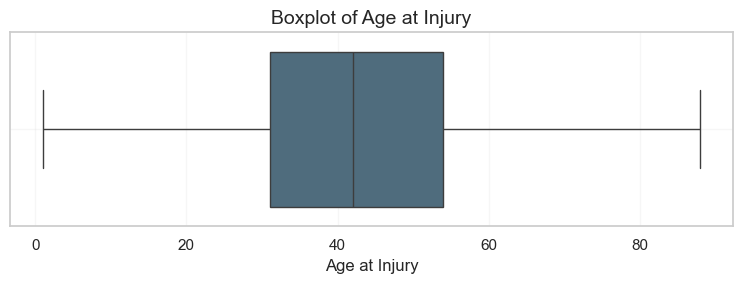

Variable  Min  Lower Fence  Q1  Median  Q3  Upper Fence  Max
0  Age at Injury    1         -3.5  31    42.0  54         88.5   88

In [340]:
#Blox plot & stats for the variables_to_treat - IQR
stats_IQR = plot_boxplots(df_IQR, variables_to_treat, num_rows=1, num_cols=2)
stats_IQR

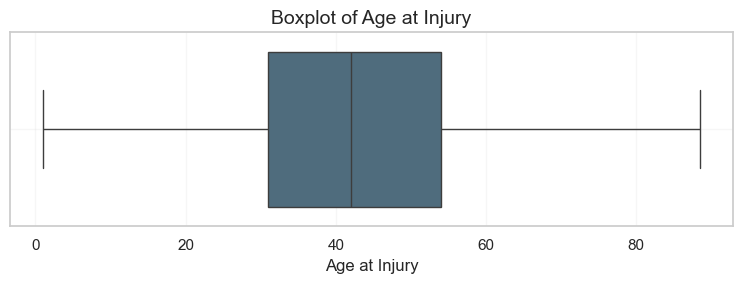

Variable  Min  Lower Fence    Q1  Median    Q3  Upper Fence   Max
0  Age at Injury  1.0         -3.5  31.0    42.0  54.0         88.5  88.5

In [341]:
#Blox plot & stats for the variables_to_treat - Winsorization
stats_Winsorize = plot_boxplots(df_Winsorize_train, variables_to_treat, num_rows=1, num_cols=2)
stats_Winsorize

### Chosen Solution 

We’re going to use **Winsorization** to handle outliers because it doesn’t remove any data—instead, it simply "caps" extreme values, bringing them within a set limit. This way, we keep all our data points, but the outliers have less impact.

After capping the outliers, we’ll **scale the data** (using something like Robust Scaling or Standard Scaling) to bring all features onto a similar range. Winsorization will already have reduced the effect of extreme values, and scaling will further reduce the influence of any remaining outliers, making them less of a factor.

This approach lets us keep all our data, softens the impact of outliers, and makes sure everything is on the same scale—an ideal setup.

In [344]:
train_clean_missing = df_Winsorize_train.copy()

val_clean_missing = df_Winsorize_val.copy()

test_clean_missing = df_Winsorize_test.copy()

In [345]:
train_clean_missing = train_clean_missing.drop(columns=['IME-4 Count', 'Average Weekly Wage'])

val_clean_missing = val_clean_missing.drop(columns=['IME-4 Count', 'Average Weekly Wage'])

test_clean = test_clean.drop(columns=['IME-4 Count', 'Average Weekly Wage'])

#removed bc we now have the category columns

In [346]:
train_clean_missing = reduce_memory_usage(train_clean_missing)

val_clean_missing = reduce_memory_usage(val_clean_missing)

test_clean_missing = reduce_memory_usage(test_clean_missing)

Memory usage of dataframe is 39.84 MB
Memory usage after optimization is: 38.96 MB
Decreased by 2.2%
Memory usage of dataframe is 10.12 MB
Memory usage after optimization is: 9.90 MB
Decreased by 2.2%
Memory usage of dataframe is 35.04 MB
Memory usage after optimization is: 34.30 MB
Decreased by 2.1%


In [347]:
del train_IQR
del train_Winsorize 
del df_IQR
del val_IQR
del val_Winsorize 

`Warning`: in these operations the Nan values were never consider to not be removed, we will treat the missing values in a bit

<a id = "Missing-values"></a>
## 2.7.  Missing values

[Back to Data Preparation](#Data-Preparation)

source: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python

In [351]:
# Checking missing values - Code adapted from prev notebook
missing_values = train_clean_missing.isnull().sum().to_frame(name='Total')
missing_values['Percentage'] = (missing_values['Total'] / len(train_clean_missing) * 100).round(2).astype(str) + '%'
missing_values.sort_values(by='Total', ascending=False, inplace=True)
missing_values

Total Percentage
OIICS Nature of Injury Description  459220     100.0%
First Hearing Date                  338680     73.75%
C-3 Date                            309535      67.4%
Birth Year                           43562      9.49%
Zip Code                             22936      4.99%
WCIO Part Of Body Description        13590      2.96%
WCIO Part Of Body Code               13590      2.96%
WCIO Nature of Injury Description    12471      2.72%
WCIO Nature of Injury Code           12471      2.72%
WCIO Cause of Injury Description     12455      2.71%
WCIO Cause of Injury Code            12455      2.71%
C-2 Date                             11601      2.53%
Industry Code Description             7950      1.73%
Industry Code                         7950      1.73%
Age at Injury                         4379      0.95%
Gender                                3776      0.82%
Accident Date                         2975      0.65%
Alternative Dispute Resolution           5       0.0%
Medical Fee Region                       0       0.0%
District Name                            0       0.0%
COVID-19 Indicator                       0       0.0%
County of Injury                         0       0.0%
Carrier Type                             0       0.0%
Carrier Name                             0       0.0%
Attorney/Representative                  0       0.0%
Assembly Date                            0       0.0%
Number of Dependents                     0       0.0%
Missing_Dates                            0       0.0%
COVID Period                             0       0.0%
delay_days_category                      0       0.0%
missing_info_category                    0       0.0%
Wage Category                            0       0.0%

### 1. Missing Values Treatment: Dropping entire columns
Thereshold -> more than 30% of missing data

In [353]:
train_clean_missing = train_clean_missing.drop(columns=['Accident Date', 'Birth Year', 
                                                        'First Hearing Date', 'C-3 Date', 'C-2 Date',
                                                        'OIICS Nature of Injury Description', 'Zip Code'])

val_clean_missing = val_clean_missing.drop(columns=['Accident Date', 'Birth Year', 
                                                        'First Hearing Date', 'C-3 Date', 'C-2 Date',
                                                        'OIICS Nature of Injury Description','Zip Code'])

test_clean = test_clean.drop(columns=['Accident Date', 'Birth Year', 'First Hearing Date',
                                      'C-3 Date', 'C-2 Date','OIICS Nature of Injury Description', 'Zip Code'])

### 2. Missing Values Treatment: SimpleImputer or Most Frequent Imputation
We saw that these columns are proplably not crucial, gender has very little variation, mostly men in all Injury Claim Types, and Zip Code has to many different values so we will prbably use the other region indicators

In [355]:
mode_imputer = SimpleImputer(strategy='most_frequent') #Imputer that fills missing values with the most frequent category

In [356]:
# Fill 'Gender' and 'Zip Code' with the most frequent value 
train_clean_missing[['Gender', 'Alternative Dispute Resolution']] = mode_imputer.fit_transform(train_clean_missing[['Gender', 'Alternative Dispute Resolution']])
#only fit to use the train values
val_clean_missing[['Gender', 'Alternative Dispute Resolution']] = mode_imputer.transform(val_clean_missing[['Gender', 'Alternative Dispute Resolution']])
test_clean[['Gender', 'Alternative Dispute Resolution']] = mode_imputer.transform(test_clean[['Gender', 'Alternative Dispute Resolution']])

In [357]:
# Imputação do conjunto de treino, calculando a moda
train_clean_missing[['Industry Code Description', 'WCIO Nature of Injury Description', 
                     'WCIO Cause of Injury Description', 'WCIO Part Of Body Description']] = mode_imputer.fit_transform(
    train_clean_missing[['Industry Code Description', 'WCIO Nature of Injury Description', 
                         'WCIO Cause of Injury Description', 'WCIO Part Of Body Description']])

val_clean_missing[['Industry Code Description', 'WCIO Nature of Injury Description', 
                   'WCIO Cause of Injury Description', 'WCIO Part Of Body Description']] = mode_imputer.transform(
    val_clean_missing[['Industry Code Description', 'WCIO Nature of Injury Description', 
                       'WCIO Cause of Injury Description', 'WCIO Part Of Body Description']])

test_clean[['Industry Code Description', 'WCIO Nature of Injury Description', 
            'WCIO Cause of Injury Description', 'WCIO Part Of Body Description']] = mode_imputer.transform(
    test_clean[['Industry Code Description', 'WCIO Nature of Injury Description', 
                'WCIO Cause of Injury Description', 'WCIO Part Of Body Description']])

Now we need to map the codes:

In [359]:
industry_code_map = train_clean_missing.dropna(subset=['Industry Code', 'Industry Code Description']) \
                                       .set_index('Industry Code Description')['Industry Code'].to_dict()

nature_of_injury_code_map = train_clean_missing.dropna(subset=['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']) \
                                               .set_index('WCIO Nature of Injury Description')['WCIO Nature of Injury Code'].to_dict()

cause_of_injury_code_map = train_clean_missing.dropna(subset=['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']) \
                                              .set_index('WCIO Cause of Injury Description')['WCIO Cause of Injury Code'].to_dict()

part_of_body_code_map = train_clean_missing.dropna(subset=['WCIO Part Of Body Code', 'WCIO Part Of Body Description']) \
                                           .set_index('WCIO Part Of Body Description')['WCIO Part Of Body Code'].to_dict()


## Validation
industry_code_map_val = val_clean_missing.dropna(subset=['Industry Code', 'Industry Code Description']) \
                                       .set_index('Industry Code Description')['Industry Code'].to_dict()

nature_of_injury_code_map_val = val_clean_missing.dropna(subset=['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']) \
                                               .set_index('WCIO Nature of Injury Description')['WCIO Nature of Injury Code'].to_dict()

cause_of_injury_code_map_val = val_clean_missing.dropna(subset=['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']) \
                                              .set_index('WCIO Cause of Injury Description')['WCIO Cause of Injury Code'].to_dict()

part_of_body_code_map_val = val_clean_missing.dropna(subset=['WCIO Part Of Body Code', 'WCIO Part Of Body Description']) \
                                           .set_index('WCIO Part Of Body Description')['WCIO Part Of Body Code'].to_dict()

#test
industry_code_map_test = test_clean.dropna(subset=['Industry Code', 'Industry Code Description']) \
                                              .set_index('Industry Code Description')['Industry Code'].to_dict()

nature_of_injury_code_map_test = test_clean.dropna(subset=['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']) \
                                                        .set_index('WCIO Nature of Injury Description')['WCIO Nature of Injury Code'].to_dict()

cause_of_injury_code_map_test = test_clean.dropna(subset=['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']) \
                                              .set_index('WCIO Cause of Injury Description')['WCIO Cause of Injury Code'].to_dict()

part_of_body_code_map_test = test_clean.dropna(subset=['WCIO Part Of Body Code', 'WCIO Part Of Body Description']) \
                                           .set_index('WCIO Part Of Body Description')['WCIO Part Of Body Code'].to_dict()

In [360]:
# Fill missing values in code columns based on the completed description columns
train_clean_missing['Industry Code'] = train_clean_missing['Industry Code'].fillna(
    train_clean_missing['Industry Code Description'].map(industry_code_map))

train_clean_missing['WCIO Nature of Injury Code'] = train_clean_missing['WCIO Nature of Injury Code'].fillna(
    train_clean_missing['WCIO Nature of Injury Description'].map(nature_of_injury_code_map))

train_clean_missing['WCIO Cause of Injury Code'] = train_clean_missing['WCIO Cause of Injury Code'].fillna(
    train_clean_missing['WCIO Cause of Injury Description'].map(cause_of_injury_code_map))

train_clean_missing['WCIO Part Of Body Code'] = train_clean_missing['WCIO Part Of Body Code'].fillna(
    train_clean_missing['WCIO Part Of Body Description'].map(part_of_body_code_map))

## Validation 
val_clean_missing['Industry Code'] = val_clean_missing['Industry Code'].fillna(
    val_clean_missing['Industry Code Description'].map(industry_code_map_val))

val_clean_missing['WCIO Nature of Injury Code'] = val_clean_missing['WCIO Nature of Injury Code'].fillna(
    val_clean_missing['WCIO Nature of Injury Description'].map(nature_of_injury_code_map_val))

val_clean_missing['WCIO Cause of Injury Code'] = val_clean_missing['WCIO Cause of Injury Code'].fillna(
    val_clean_missing['WCIO Cause of Injury Description'].map(cause_of_injury_code_map_val))

val_clean_missing['WCIO Part Of Body Code'] = val_clean_missing['WCIO Part Of Body Code'].fillna(
    val_clean_missing['WCIO Part Of Body Description'].map(part_of_body_code_map_val))

## Test
test_clean['Industry Code'] = test_clean['Industry Code'].fillna(
    test_clean['Industry Code Description'].map(industry_code_map_test))

test_clean['WCIO Nature of Injury Code'] = test_clean['WCIO Nature of Injury Code'].fillna(
    test_clean['WCIO Nature of Injury Description'].map(nature_of_injury_code_map_test))

test_clean['WCIO Cause of Injury Code'] = test_clean['WCIO Cause of Injury Code'].fillna(
    test_clean['WCIO Cause of Injury Description'].map(cause_of_injury_code_map_test))

test_clean['WCIO Part Of Body Code'] = test_clean['WCIO Part Of Body Code'].fillna(
    test_clean['WCIO Part Of Body Description'].map(part_of_body_code_map_test))

### 4. Missing Values Treatment: K-Nearest Neighbor Imputation'
The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor'.

In [362]:
# 'Age at Injury' before
train_clean_missing['Age at Injury'].describe().T

count    454841.0
mean          NaN
std           0.0
min           1.0
25%          31.0
50%          42.0
75%          54.0
max          88.5
Name: Age at Injury, dtype: float64

In [363]:
# Step 1: Fit the scaler on the training set and transform it
scaler = StandardScaler()
train_clean_missing['Age at Injury'] = scaler.fit_transform(train_clean_missing[['Age at Injury']])

# Step 2: Apply KNN Imputation on the scaled training set
knn_imputer = KNNImputer(n_neighbors=5)
train_clean_missing['Age at Injury'] = knn_imputer.fit_transform(train_clean_missing[['Age at Injury']])
train_clean_missing['Age at Injury'] = train_clean_missing['Age at Injury'].round().astype('int8')

# Step 3: Transform the validation and test sets using the same scaler and imputer
val_clean_missing['Age at Injury'] = scaler.transform(val_clean_missing[['Age at Injury']])
val_clean_missing['Age at Injury'] = knn_imputer.transform(val_clean_missing[['Age at Injury']])
val_clean_missing['Age at Injury'] = val_clean_missing['Age at Injury'].round().astype('int8')

test_clean['Age at Injury'] = scaler.transform(test_clean[['Age at Injury']])
test_clean['Age at Injury'] = knn_imputer.transform(test_clean[['Age at Injury']])
test_clean['Age at Injury'] = test_clean['Age at Injury'].round().astype('int8')

# Step 4: Reverse the scaling to get the original age range
train_clean_missing['Age at Injury'] = scaler.inverse_transform(train_clean_missing[['Age at Injury']])
val_clean_missing['Age at Injury'] = scaler.inverse_transform(val_clean_missing[['Age at Injury']])
test_clean['Age at Injury'] = scaler.inverse_transform(test_clean[['Age at Injury']])

In [364]:
# 'Age at Injury' after
train_clean_missing['Age at Injury'].describe().T

count    459220.000000
mean         42.525560
std          13.881447
min           1.390675
25%          28.800144
50%          42.504879
75%          56.209613
max          83.619082
Name: Age at Injury, dtype: float64

The Age at Injury column statistics before and after applying KNN imputation show that the overall distribution has remained stable.

In [366]:
train_clean_missing.isna().sum()

Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Carrier Name                         0
Carrier Type                         0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Description        0
Number of Dependents                 0
Missing_Dates                        0
COVID Period                         0
delay_days_category                  0
missing_info_category                0
Wage Category                        0
dtype: int64

all good now

In [368]:
train_clean_missing = reduce_memory_usage(train_clean_missing)
val_clean_missing = reduce_memory_usage(val_clean_missing)
test_clean = reduce_memory_usage(test_clean)

Memory usage of dataframe is 39.94 MB
Memory usage after optimization is: 18.93 MB
Decreased by 52.6%
Memory usage of dataframe is 10.05 MB
Memory usage after optimization is: 4.80 MB
Decreased by 52.2%
Memory usage of dataframe is 33.01 MB
Memory usage after optimization is: 15.26 MB
Decreased by 53.8%


<a id = "Variable-selection"></a>
## 2.8. Variable pre-selection & Dimensionality reduction

[Back to Data Preparation](#Data-Preparation)

In [370]:
train_clean_encoding = train_clean_missing.copy()

val_clean_encoding = val_clean_missing.copy()

test_clean_encoding = test_clean.copy()

In [371]:
print(train_clean_encoding.shape, val_clean_encoding.shape, test_clean_encoding.shape)

(459220, 25) (114806, 25) (387975, 20)


In [372]:
# Função para verificar a distribuição por var target 
def check_category_distribution(df, col_name, mapping):
    categories = [item for sublist in mapping.values() for item in sublist]
    filtered_df = df[df[col_name].isin(categories)]
    print(f"\nDistribuição original da coluna '{col_name}':")
    print(filtered_df[col_name].value_counts())

# So precisamos destas colunas 
selected_columns = [
    #'Industry Code Description', already done
    #'WCIO Cause of Injury Description', already done
    'WCIO Nature of Injury Description', # keep as example
    #'WCIO Part Of Body Description',  #already done
    #'Carrier Type' already done 
    #'COVID-19 Indicator'
]
X_train_filtered = train_clean_encoding[selected_columns]
train_with_y = pd.concat([X_train_filtered, y_train_multi], axis=1)

proportion_by_column = {}
for column in X_train_filtered.columns:
    counts = train_with_y.groupby([column, 'Claim Injury Type']).size()
    total_counts = train_with_y[column].value_counts()
    proportions = (counts.div(total_counts, level=column).unstack(fill_value=0))
    proportion_by_column[column] = proportions * 100

for col, proportions in proportion_by_column.items():
    print(f"\nProporções na coluna '{col}':")
    # sort by  Claim Injury Type: (rare targets)
    sorted_proportions = proportions.sort_values(by=[6, 7, 5], ascending=[False, False, False])
    display(sorted_proportions)


Proporções na coluna 'WCIO Nature of Injury Description':


Claim Injury Type                                           0          1  \
WCIO Nature of Injury Description                                          
CANCER                                               4.516129  50.322581   
VASCULAR                                             3.174603  66.666667   
MENTAL DISORDER                                      0.826446  46.556474   
CONCUSSION                                           0.412560  43.158377   
ALL OTHER CUMULATIVE INJURY, NOC                     5.481874  50.574713   
DISLOCATION                                          0.706941  15.702656   
FRACTURE                                             0.527646  21.952292   
COVID-19                                             0.994229  67.103157   
HERNIA                                               1.058932  32.228361   
NO PHYSICAL INJURY                                   1.714405  83.065022   
MULTIPLE PHYSICAL INJURIES ONLY                      2.020102  43.328735   
CRUSHING                                             0.601106  44.217360   
FOREIGN BODY                                         0.320892  79.918933   
BURN                                                 0.416736  68.128021   
ALL OTHER SPECIFIC INJURIES, NOC                     1.913975  53.708758   
STRAIN OR TEAR                                       5.011561  43.440425   
CONTUSION                                            0.758039  53.880705   
SPRAIN OR TEAR                                       0.803096  37.090063   
LACERATION                                           0.382724  70.219269   
ASBESTOSIS                                           8.235294  55.294118   
ASPHYXIATION                                         1.315789  64.473684   
SILICOSIS                                           21.428571   7.142857   
MYOCARDIAL INFARCTION                                1.089918  79.564033   
MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND P...   2.950820  43.934426   
RESPIRATORY DISORDERS                                2.144250  76.705653   
ELECTRIC SHOCK                                       0.201207  65.593561   
ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC           8.509277  45.681382   
POISONING - GENERAL (NOT OD OR CUMULATIVE            0.611621  81.345566   
HEAT PROSTRATION                                     0.597015  76.119403   
INFECTION                                            1.084011  70.731707   
SYNCOPE                                              0.175439  87.456140   
MENTAL STRESS                                        1.943320  57.246964   
CARPAL TUNNEL SYNDROME                               5.083221  26.945569   
PUNCTURE                                             0.150905  85.858005   
DUST DISEASE, NOC                                    5.633803  67.605634   
RUPTURE                                              0.298805  18.127490   
INFLAMMATION                                         0.794769  57.062374   
SEVERANCE                                            1.785714  33.571429   
AMPUTATION                                           1.697793  11.884550   
HEARING LOSS OR IMPAIRMENT                           4.951768  32.411576   
ADVERSE REACTION TO A VACCINATION OR INOCULATION     0.000000  79.220779   
AIDS                                                 0.000000  67.857143   
ANGINA PECTORIS                                      0.000000  72.789116   
BLACK LUNG                                           0.000000  25.000000   
BYSSINOSIS                                           0.000000   0.000000   
CONTAGIOUS DISEASE                                   1.050788  86.164623   
DERMATITIS                                           0.481348  83.874850   
ENUCLEATION                                          0.000000   0.000000   
FREEZING                                             3.571429  55.357143   
HEPATITIS C                                          0.000000  66.666667   
LOSS OF HEARING                                 

#### since 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description' have to much categorie to be done by looking only, we define cluester that can group the categories and still maintain a way to have predictive power to less commo targets

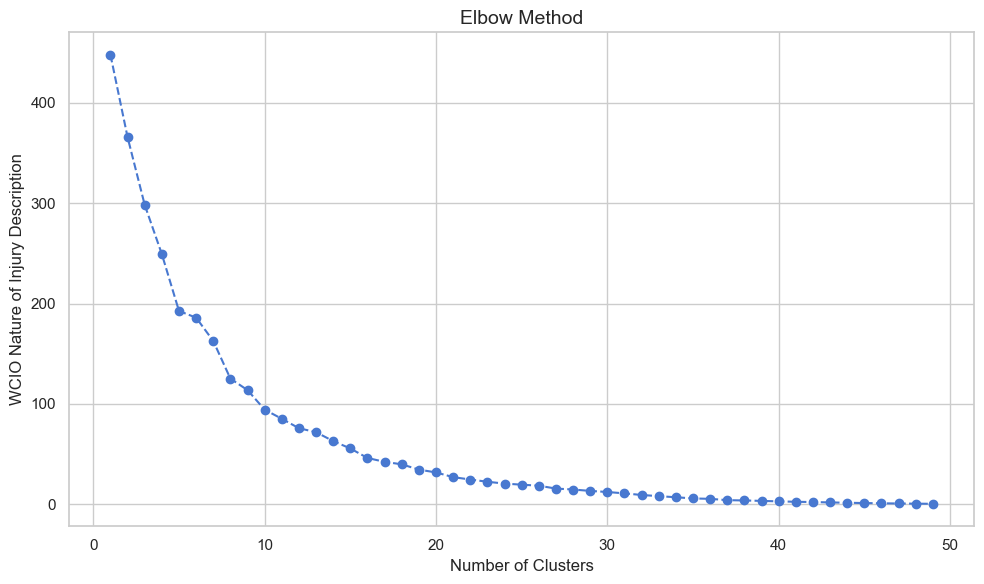

In [374]:
df = sorted_proportions.copy()

# Extracting features for clustering
features = df.iloc[:, 0:].values

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using the Elbow Method to determine optimal number of clusters
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCIO Nature of Injury Description')
plt.show()

In [375]:
# Applying KMeans with optimal number of clusters (based on elbow method)
kmeans = KMeans(n_clusters=18, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyzing the clusters
cluster_summary = df.groupby('Cluster').mean()
display(cluster_summary)

Claim Injury Type          0          1          2          3          4  \
Cluster                                                                    
0                   1.315789  64.473684   3.947368  22.368421   0.000000   
1                   1.428820  70.107111   4.521666  23.058564   0.304819   
2                   0.298805  18.127490  10.358566  44.721116  25.099602   
3                   4.516129  50.322581  14.193548  20.000000   0.000000   
4                   3.120141  48.087245  12.249514  27.955197   7.325001   
5                  21.428571   7.142857   7.142857  35.714286  21.428571   
6                   6.366374  32.416162   4.243678  10.056896  46.884735   
7                   0.000000  12.500000   0.000000  87.500000   0.000000   
8                   3.174603  66.666667   7.936508  18.253968   0.793651   
9                   0.000000  66.666667  33.333333   0.000000   0.000000   
10                  0.840117  66.657432  12.668904  17.049876   2.581921   
11                  8.235294  55.294118   1.176471  23.529412   0.000000   
12                  0.738850  82.623286   7.731245   8.046635   0.630379   
13                  0.000000   0.000000  20.000000  80.000000   0.000000   
14                 12.500000  62.500000   0.000000   0.000000  25.000000   
15                  0.706941  15.702656  10.861183  56.383890  13.474722   
16                  1.697793  11.884550   8.319185  46.179966  31.748727   
17                  1.811324  31.783002  12.308581  37.840512  15.701892   

Claim Injury Type         5         6         7  
Cluster                                          
0                  0.000000  0.000000  7.894737  
1                  0.144168  0.008891  0.425961  
2                  1.394422  0.000000  0.000000  
3                  1.935484  3.225806  5.806452  
4                  0.965258  0.072396  0.225249  
5                  0.000000  0.000000  7.142857  
6                  0.032154  0.000000  0.000000  
7                  0.000000  0.000000  0.000000  
8                  0.000000  1.587302  1.587302  
9                  0.000000  0.000000  0.000000  
10                 0.100161  0.002199  0.099391  
11                 2.352941  0.000000  9.411765  
12                 0.080414  0.006523  0.142668  
13                 0.000000  0.000000  0.000000  
14                 0.000000  0.000000  0.000000  
15                 2.784919  0.064267  0.021422  
16                 0.169779  0.000000  0.000000  
17                 0.352916  0.026109  0.175664

In [376]:
#this codes are from NAICS - https://www.bls.gov/iag/tgs/iag_index_naics.htm

industry_mapping = {
    'Industry_high_0': ['MANAGEMENT OF COMPANIES AND ENTERPRISES'],
    'Industry_high_1': [
        'HEALTH CARE AND SOCIAL ASSISTANCE', 'MANUFACTURING', 'FINANCE AND INSURANCE',
        'REAL ESTATE AND RENTAL AND LEASING', 'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)',
        'RETAIL TRADE', 'ACCOMMODATION AND FOOD SERVICES', 'MINING',
        'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES', 'ARTS, ENTERTAINMENT, AND RECREATION'],
    'Industry_high_2': ['EDUCATIONAL SERVICES'],
    'Industry_high_3_mid_5': [
        'CONSTRUCTION', 'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT',
        'TRANSPORTATION AND WAREHOUSING', 'WHOLESALE TRADE'],
    'Industry_high_4': ['UTILITIES', 'PUBLIC ADMINISTRATION'],
    'Industry_high_5': ['INFORMATION'],
    'Industry_high_3_2': ['AGRICULTURE, FORESTRY, FISHING AND HUNTING']}



nature_of_injury_mapping = {
    'Nature of Injury Cluster 10': ['BYSSINOSIS', 'BLACK LUNG', 'VDT - RELATED DISEASES'],
    'Nature of Injury Cluster 4': ['ENUCLEATION', 'HERNIA', 'MENTAL DISORDER'],
    'Nature of Injury Cluster 17': ['DISLOCATION'],
    'Nature of Injury Cluster 15': ['FRACTURE', 'SEVERANCE', 'CRUSHING', 'CARPAL TUNNEL SYNDROME'],
    'Nature of Injury Cluster 1': ['AMPUTATION'],
    'Nature of Injury Cluster 9': ['RUPTURE'],
    'Nature of Injury Cluster 6': ['SILICOSIS'],
    'Nature of Injury Cluster 16': ['MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL', 'MENTAL STRESS',
                                'ALL OTHER SPECIFIC INJURIES, NOC', 'INFLAMMATION', 'ALL OTHER CUMULATIVE INJURY, NOC', 'CONTUSION'],
    'Nature of Injury Cluster 12': ['SPRAIN OR TEAR', 'CONCUSSION', 'MULTIPLE PHYSICAL INJURIES ONLY', 'STRAIN OR TEAR', 'DUST DISEASE, NOC'],
    'Nature of Injury Cluster 0': ['ASBESTOSIS'],
    'Nature of Injury Cluster 2': ['COVID-19', 'VISION LOSS', 'FREEZING', 'BURN', 'AIDS', 'ELECTRIC SHOCK', 'INFECTION', 'LACERATION',
                               'POISONING - CHEMICAL, (OTHER THAN METALS)', 'RESPIRATORY DISORDERS', 'FOREIGN BODY', 'HEAT PROSTRATION',
                               'POISONING - GENERAL (NOT OD OR CUMULATIVE'],
    'Nature of Injury Cluster 14': ['ASPHYXIATION'],
    'Nature of Injury Cluster 8': ['VASCULAR'],
    'Nature of Injury Cluster 5': ['ANGINA PECTORIS', 'POISONING - METAL', 'MYOCARDIAL INFARCTION',
                               'ADVERSE REACTION TO A VACCINATION OR INOCULATION', 'DERMATITIS', 'NO PHYSICAL INJURY',
                               'CONTAGIOUS DISEASE', 'SYNCOPE', 'PUNCTURE', 'RADIATION'],
    'Nature of Injury Cluster 3': ['CANCER'],
    'Nature of Injury Cluster 13': ['ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC'],
    'Nature of Injury Cluster 7': ['LOSS OF HEARING', 'HEARING LOSS OR IMPAIRMENT'],
    'Nature of Injury Cluster 11': ['HEPATITIS C']}


#https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf & https://www.mwcia.org/Media/Default/PDF/NewsFeed/Circulars/21-1787.pdf

WCIO_Cause_map = {
    'Cause of Injury Cluster 11': ['CRASH OF RAIL VEHICLE'],
    'Cause of Injury Cluster 15': ['FROM LADDER OR SCAFFOLDING', 'MOTOR VEHICLE', 'VEHICLE UPSET',
                               'COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE', 'MOTOR VEHICLE, NOC'],
    'Cause of Injury Cluster 10': ['GUNSHOT'],
    'Cause of Injury Cluster 0': ['COLLAPSING MATERIALS (SLIDES OF EARTH)', 'MOVING PARTS OF MACHINE',
                              'JUMPING OR LEAPING', 'MACHINE OR MACHINERY', 'SLIP, OR TRIP, DID NOT FALL',
                              'STRAIN OR INJURY BY, NOC', 'MOVING PART OF MACHINE', 'WIELDING OR THROWING'],
    'Cause of Injury Cluster 14': ['INTO OPENINGS', 'LIFTING', 'ON STAIRS', 'CRASH OF AIRPLANE', 'HOLDING OR CARRYING',
                               'TWISTING', 'FALL, SLIP OR TRIP, NOC', 'FROM LIQUID OR GREASE SPILLS', 'ON SAME LEVEL',
                               'COLLISION WITH A FIXED OBJECT', 'ON ICE OR SNOW'],
    'Cause of Injury Cluster 4': ['FROM DIFFERENT LEVEL (ELEVATION)', 'REACHING', 'USING TOOL OR MACHINERY'],
    'Cause of Injury Cluster 8': ['EXPLOSION OR FLARE BACK', 'CRASH OF WATER VEHICLE', 'FIRE OR FLAME', 
                              'POWERED HAND TOOL, APPLIANCE', 'SANDING, SCRAPING, CLEANING OPERATION',
                              'FALLING OR FLYING OBJECT', 'CAUGHT IN, UNDER OR BETWEEN, NOC', 'HAND TOOL OR MACHINE IN USE',
                              'OBJECT HANDLED', 'STRIKING AGAINST OR STEPPING ON, NOC', 'FELLOW WORKER, PATIENT OR OTHER PERSON',
                              'OBJECT HANDLED BY OTHERS', 'ELECTRICAL CURRENT', 'STRUCK OR INJURED, NOC', 'STATIONARY OBJECT',
                              'STEAM OR HOT FLUIDS', 'WELDING OPERATION', 'OBJECT BEING LIFTED OR HANDLED'],
    'Cause of Injury Cluster 12': ['PUSHING OR PULLING', 'PERSON IN ACT OF A CRIME'],
    'Cause of Injury Cluster 6': ['REPETITIVE MOTION', 'CUMULATIVE, NOC'],
    'Cause of Injury Cluster 13': ['PANDEMIC', 'OTHER - MISCELLANEOUS, NOC', 'OTHER THAN PHYSICAL CAUSE OF INJURY',
                               'ABSORPTION, INGESTION OR INHALATION, NOC'],
    'Cause of Injury Cluster 3': ['BROKEN GLASS', 'HOT OBJECTS OR SUBSTANCES', 'TEMPERATURE EXTREMES', 'STEPPING ON SHARP OBJECT',
                              'CHEMICALS', 'COLD OBJECTS OR SUBSTANCES', 'RUBBED OR ABRADED, NOC', 'CONTACT WITH, NOC',
                              'ANIMAL OR INSECT', 'CUT, PUNCTURE, SCRAPE, NOC', 'HAND TOOL, UTENSIL; NOT POWERED',
                              'RADIATION', 'FOREIGN MATTER (BODY) IN EYE(S)', 'MOLD'],
    'Cause of Injury Cluster 5': ['TERRORISM'],
    'Cause of Injury Cluster 9': ['CONTINUAL NOISE'],
    'Cause of Injury Cluster 7': ['DUST, GASES, FUMES OR VAPORS'],
    'Cause of Injury Cluster 2': ['ABNORMAL AIR PRESSURE'],
    'Cause of Injury Cluster 1': ['NATURAL DISASTERS']}

part_of_body_mapping = {
    'Part Of Body Cluster 3': ['WHOLE BODY', 'HEART'],
    'Part Of Body Cluster 10': ['INTERNAL ORGANS'],
    'Part Of Body Cluster 9': ['LUNGS', 'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS', 'NO PHYSICAL INJURY'],
    'Part Of Body Cluster 6': ['BRAIN', 'SPINAL CORD'],
    'Part Of Body Cluster 7': ['INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED', 'WRIST (S) & HAND(S)'],
    'Part Of Body Cluster 4': ['CHEST', 'SKULL', 'BUTTOCKS', 'SOFT TISSUE', 'MULTIPLE HEAD INJURY',
                           'ABDOMEN INCLUDING GROIN', 'LOWER LEG', 'LOWER ARM', 'HAND', 'FACIAL BONES',
                           'FOOT', 'GREAT TOE', 'MULTIPLE LOWER EXTREMITIES', 'NOSE', 'SACRUM AND COCCYX', 'TOES', 'UPPER LEG'],
    'Part Of Body Cluster 2': ['MULTIPLE BODY PARTS (INCLUDING BODY', 'MULTIPLE NECK INJURY', 'LOWER BACK AREA',
                           'LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA', 'UPPER BACK AREA', 'DISC', 'MULTIPLE TRUNK',
                           'PELVIS', 'VERTEBRAE'],
    'Part Of Body Cluster 1': ['MOUTH', 'EYE(S)', 'FINGER(S)', 'LARYNX', 'TEETH', 'THUMB'],
    'Part Of Body Cluster 12': ['MULTIPLE', 'KNEE', 'ELBOW', 'ANKLE', 'SHOULDER(S)', 'MULTIPLE UPPER EXTREMITIES', 'WRIST'],
    'Part Of Body Cluster 0': ['UPPER ARM', 'HIP'],
    'Part Of Body Cluster 5': ['ARTIFICIAL APPLIANCE'],
    'Part Of Body Cluster 8': ['EAR(S)'],
    'Part Of Body Cluster 11': ['TRACHEA']}

# Dictionary to map 'Carrier Type' 

carrier_type_mapping = {
    "Private Carriers": ["1A. PRIVATE", "4A. SELF PRIVATE"],
    "Public Carriers": ["3A. SELF PUBLIC", "2A. SIF"],
    "SF_0_3": ["5C. SPECIAL FUND - POI CARRIER WCB MENANDS"],
    "SF_0_2": ["5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)"],
    "SF_2_1": ["5D. SPECIAL FUND - UNKNOWN"],
    "Unknown": ["UNKNOWN"]}

### Now that we have a good understanding of the preprocessing steps we need to take, we will procede to build a preprocessing pipeline in the next nootbook.

## Then, the scalling and the encoding will also have a separated function:

<a id = "Encoding"></a>
## 2.9. Encoding and Scalling

[Back to Data Preparation](#Data-Preparation)

### **Label Encoding** or **One-Hot Encoding**?

1. **Gender**:  This is a binary feature with no inherent ordering, so **Label Encoding** works well here.
- **Encoding**: Label Encoding (i.e., M -> 0, F -> 1).

2. **Medical Fee Region**: 5 categories: "IV", "I", "II", "III", "UK". This feature has multiple categories but no inherent order. **One-Hot Encoding** is more appropriate for non-ordinal categories with few distinct values.
- **Encoding**: One-Hot Encoding.

3. **Wage Category**: 6 categories with a mixture of ordinal categories ("Invalid", "Low Income", "Very Low Income", "Middle Income", "Upper Middle Income", "High Income"). This has an inherent ordering (low to high income). **Label Encoding** is appropriate, where higher income categories can be represented with higher values.
- **Encoding**: Label Encoding.

4. **Age Category**: 5 categories: "Middle-Aged Adults", "Older Adults", "Young Adults", "Seniors", "Adolescents". Age categories have a natural ordering from younger to older groups. **Label Encoding** works well here.
- **Encoding**: Label Encoding.

5. **Industry Category**: 6 categories, some more general than others (e.g., "Services & Finance", "Manufacturing & Industry", "Agriculture", "Government & Education"). These are categorical values with no natural ordering, but with a reasonable number of distinct categories. **One-Hot Encoding** is preferred.
- **Encoding**: One-Hot Encoding.

6. **delay_days_category**: 4 categories with a natural ordering: "Short delays (0-30 days)", "Medium delays (31-180 days)", "Long delays (181-365 days)", "Very long delays (>365 days)". This feature has an inherent order in the categories, so **Label Encoding** would work well.
- **Encoding**: Label Encoding.

7. **missing_info_category**: 5 categories with no inherent order ("Moderate", "Low", "No", "High", "Very high").
- **Encoding**: Label Encoding.

8. **Mapped WCIO Part Of Body Description**: 8 categories with varying levels of specificity (e.g., "Upper Body", "Lower Body", "Head and Facial Areas"). These are distinct body parts or descriptions, and there’s no inherent order. **One-Hot Encoding** is ideal for these nominal categories.
- **Encoding**: One-Hot Encoding.

9. **Mapped WCIO Cause of Injury Description**:  14 categories, with more complex and specific causes of injury (e.g., "Strain and Overexertion Injuries", "Falls and Lifting Injuries"). These are nominal categories with no inherent order. **One-Hot Encoding** works well here.
- **Encoding**: One-Hot Encoding.

10. **Mapped WCIO Nature of Injury Description**:  10 categories
- **Encoding**: **One-Hot Encoding**

11. **Mapped Industry Code Description**: 3 categories: "Public Sector & Services", "Commerce, Production, and Logistics", "Finance and Corporate".
- **Encoding**: One-Hot Encoding.

12. **Mapped Carrier Type**: 4 categories: "Private Carriers", "Public Carriers", "Unknown", "Special Funds".
- **Encoding**: One-Hot Encoding.


- **Label Encoding**: Gender, Wage Category, Age Category, delay_days_category (ordinal features)
- **One-Hot Encoding**: Medical Fee Region, Industry Category, missing_info_category, Mapped WCIO Part Of Body Description, Mapped WCIO Cause of Injury Description, Mapped WCIO Nature of Injury Description, Mapped Industry Code Description, Mapped Carrier Type (nominal features)


### **Normalization**

**Scalers and Algorithms**:

| **Scaler**            | **Best Models**                                                |
|-----------------------|---------------------------------------------------------------|
| **StandardScaler**     | Logistic Regression, SVM, k-NN, Neural Networks, ElasticNet   |
| **MinMaxScaler**       | k-NN, Neural Networks, Logistic Regression                    |
| **RobustScaler**       | SVM, k-NN, Random Forest, Neural Networks (with outliers)     |